# Test Models

This is a notebook for testing and comparing various models

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../src'

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/current/src


In [3]:
import os
import sys
import pandas as pd
import random
import warnings
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pickle
from glob import glob
import matplotlib.pyplot as plt
import random
import multiprocessing
from tqdm.auto import tqdm
import seaborn as sns
from IPython.display import display

#####LOCAL SCRIPTS FROM src#####
import utility
import load_data as load_data
import models.lstm as lstm
import models.linear as linear
import models.physics as physics
from ArgoverseDataset import ArgoverseDataset
import run_model as run_model



# Setting Parameters for all models

Parameters like data paths, number of workders, and device are to be used for all models

In [10]:
device='cuda:0'
train_path='../data/train-data'
val_path='../data/validation-data'
test_path='../data/test-data'
out_path='../data/out-data'
fig_path='../latex/figures/train-loss'
model_path='../data/trained-models/final-models'
os.makedirs(out_path, exist_ok=True)
os.makedirs(fig_path, exist_ok=True)

# num_workers=multiprocessing.cpu_count() #4

## Set up datasets

## Linear Models

### Simple Linear Model

First try a simple linear regression model with 1 epoch and an `ema_weight` of 0.5 as a baseline.

Epoch 1/1:   0%|          | 0/3171 [00:00<?, ?it/s]

Epoch: 1, Train Loss: 118.39701843261719, Train EMA Loss: 88.42242431640625 Test Loss: 59.285301208496094, Test EMA Loss: 54.07888412475586
Completed training in 0 hours,3 minutes, 32 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      636.951599  636.951599     572.737122  572.737122
1       1.0        1.0      597.976685  559.001831     518.892883  465.048645
2       1.0        2.0      581.319336  564.661926     458.431000  397.969116
3       1.0        3.0      494.922241  408.525177     426.766235  395.101471
4       1.0        4.0      451.254333  407.586395     391.611786  356.457336
...     ...        ...             ...         ...            ...         ...
3166    1.0     3166.0       60.798523   68.066673      53.184708   59.603470
3167    1.0     3167.0       58.771126   56.743725      52.764648   52.344593
3168    1.0     3168.0       55.340733   51.910339      54.893131   57.021614
3169    1.0     3169.0      148.371613  241.402496      64.491714   74.090302
3170    1.0     3170.0      118.397018   88.422424      59.285301   54.078884

[3171 rows x 6 columns]

simple_model(
  (linear): Linear(in_features=4560, out_features=7200, bias=True)
)

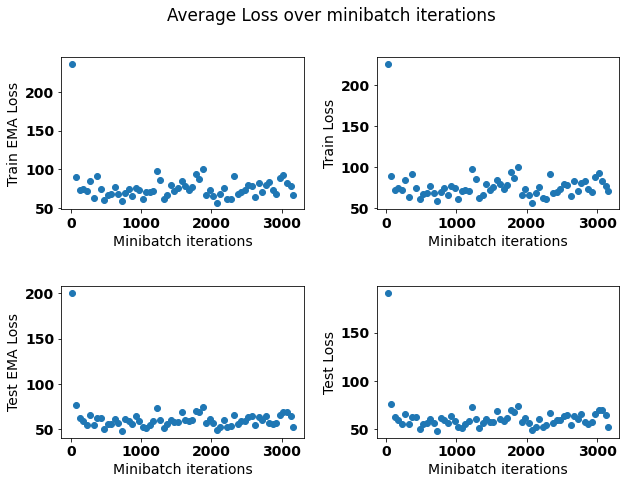

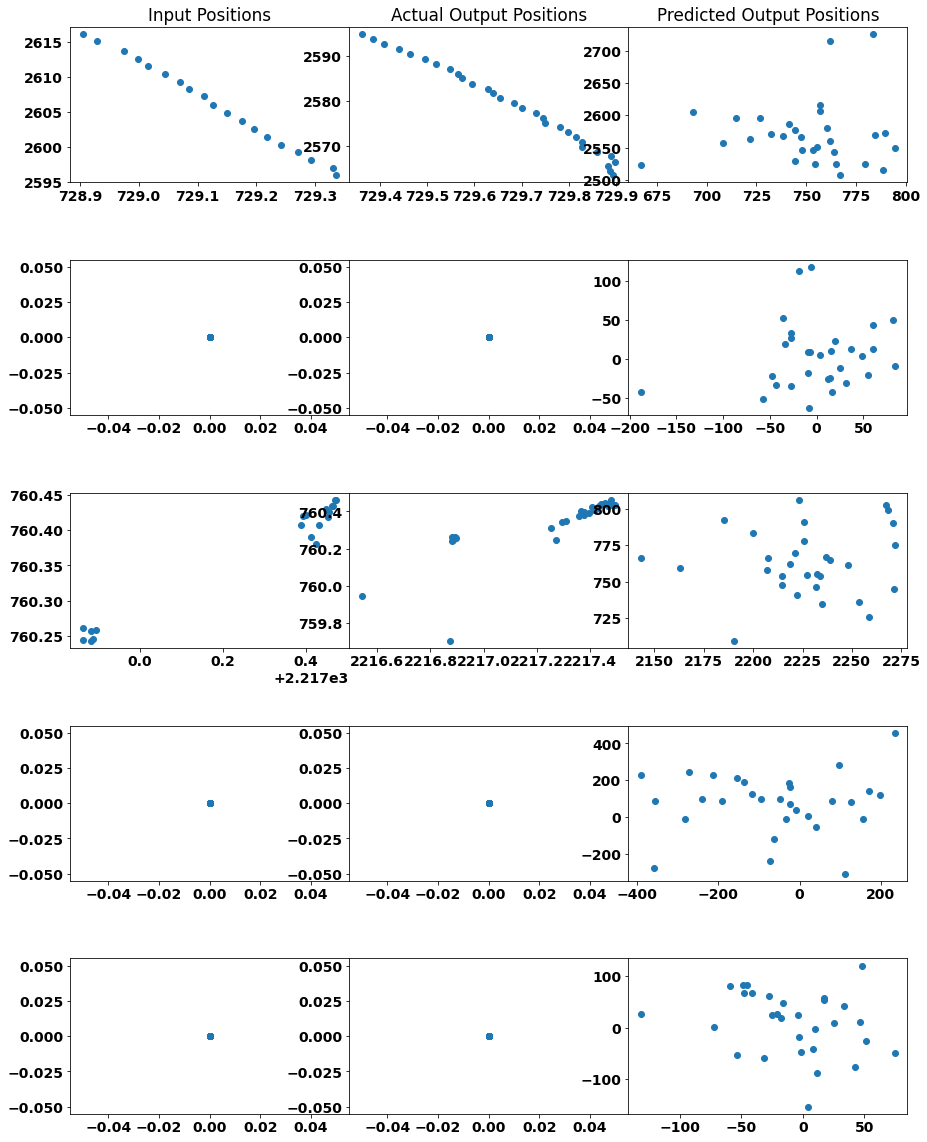

In [4]:
num_epochs=1
ema_weight=0.5
batch_size=64

model_str='simple-linear-ema50-epoch01-batchsz64'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.simple_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    save_model_path=model_fp
)

It appears as though the loss levels out at about 250 iterations through the minibatches.

# Trying a larger batch size

Epoch 1/1:   0%|          | 0/1586 [00:00<?, ?it/s]

Epoch: 1, Train Loss: 45.31836700439453, Train EMA Loss: 37.62582778930664 Test Loss: 39.750885009765625, Test EMA Loss: 38.04966354370117
Completed training in 0 hours,3 minutes, 12 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      684.317566  684.317566     596.995605  596.995605
1       1.0        1.0      658.750549  633.183533     526.140198  455.284760
2       1.0        2.0      564.807983  470.865356     467.745361  409.350494
3       1.0        3.0      500.744385  436.680786     435.864197  403.983002
4       1.0        4.0      478.382751  456.021118     390.509705  345.155212
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0       47.634476   37.810535      36.021301   34.045120
1582    1.0     1582.0       67.804955   87.975433      38.771088   41.520870
1583    1.0     1583.0       55.853622   43.902290      38.274864   37.778641
1584    1.0     1584.0       53.010902   50.168179      41.452110   44.629356
1585    1.0     1585.0       45.318367   37.625828      39.750885   38.049664

[1586 rows x 6 columns]

simple_model(
  (linear): Linear(in_features=4560, out_features=7200, bias=True)
)

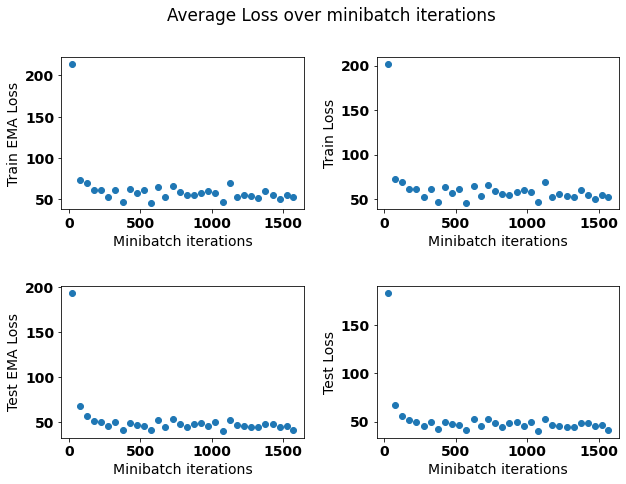

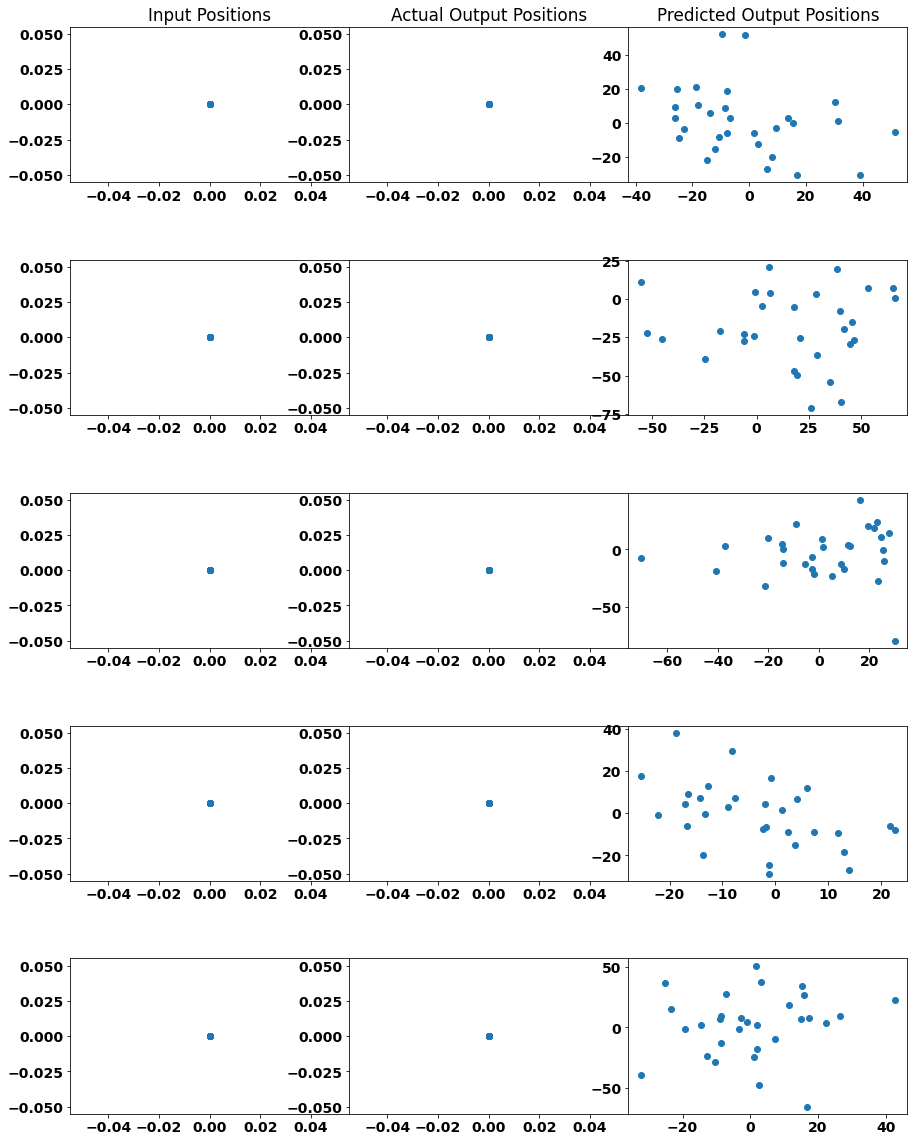

In [5]:
num_epochs=1
ema_weight=0.5
batch_size=128

model_str='simple-linear-ema50-epoch01-batchsz128'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.simple_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    save_model_path=model_fp
)

It would appear as though a larger batch size helped the model lower its loss more quickly

## Next lets try adjusting ema_weight

Epoch 1/1:   0%|          | 0/1586 [00:00<?, ?it/s]

Epoch: 1, Train Loss: 76.5797119140625, Train EMA Loss: 75.01154327392578 Test Loss: 52.64686965942383, Test EMA Loss: 62.0976448059082
Completed training in 0 hours,3 minutes, 12 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      668.019043  668.019043     611.681702  611.681702
1       1.0        1.0      651.015381  600.004395     575.129822  465.474030
2       1.0        2.0      604.801758  466.161011     536.778076  421.723022
3       1.0        3.0      564.478027  443.506714     509.452240  427.474762
4       1.0        4.0      523.680969  401.289886     479.675903  390.346863
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0       83.075363  159.187759      49.230759   73.425293
1582    1.0     1582.0       81.075424   75.075623      50.219780   53.186840
1583    1.0     1583.0       87.659813  107.412979      51.501694   55.347450
1584    1.0     1584.0       77.102440   45.430332      49.496613   43.481365
1585    1.0     1585.0       76.579712   75.011543      52.646870   62.097645

[1586 rows x 6 columns]

simple_model(
  (linear): Linear(in_features=4560, out_features=7200, bias=True)
)

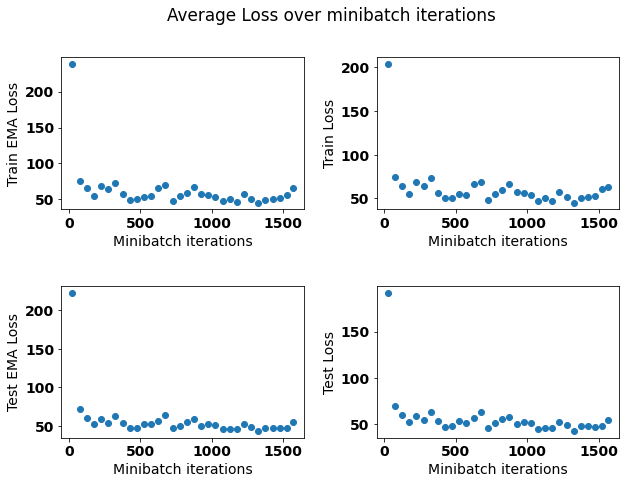

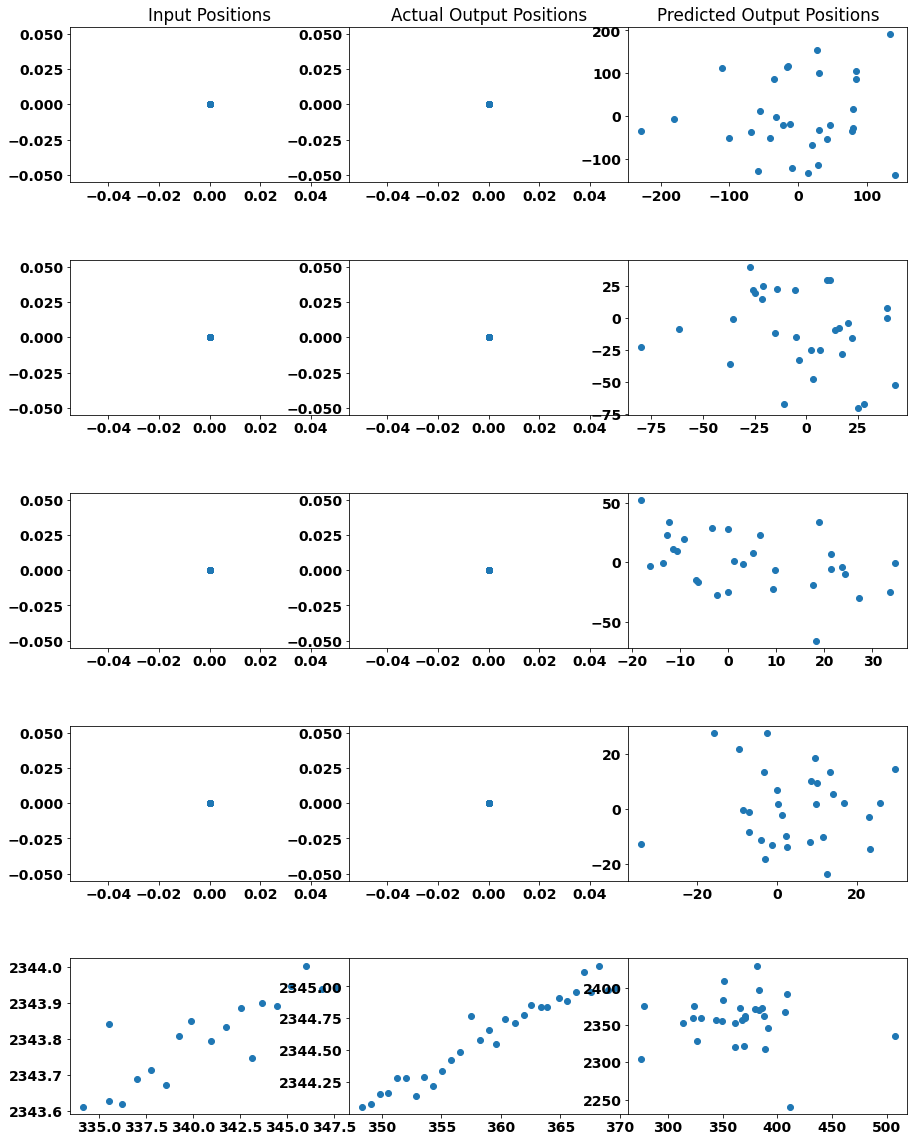

In [6]:
num_epochs=1
ema_weight=0.75
batch_size=128

model_str='simple-linear-ema75-epoch01-batchsz128'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.simple_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    save_model_path=model_fp
)

## Lets try training for more epochs

Epoch 2/10:   0%|          | 0/1586 [00:00<?, ?it/s]           

Epoch: 1, Train Loss: 45.09770965576172, Train EMA Loss: 38.16269302368164 Test Loss: 55.383201599121094, Test EMA Loss: 59.88823699951172


Epoch 3/10:   0%|          | 0/1586 [00:00<?, ?it/s]           

Epoch: 2, Train Loss: 48.22024154663086, Train EMA Loss: 45.66225814819336 Test Loss: 58.21526336669922, Test EMA Loss: 55.03303527832031


Epoch 4/10:   0%|          | 0/1586 [00:00<?, ?it/s]           

Epoch: 3, Train Loss: 49.39677429199219, Train EMA Loss: 43.36499786376953 Test Loss: 52.87688446044922, Test EMA Loss: 48.164398193359375


Epoch 5/10:   0%|          | 0/1586 [00:00<?, ?it/s]           

Epoch: 4, Train Loss: 44.429317474365234, Train EMA Loss: 43.77293395996094 Test Loss: 50.033416748046875, Test EMA Loss: 54.920833587646484


Epoch 6/10:   0%|          | 0/1586 [00:00<?, ?it/s]           

Epoch: 5, Train Loss: 42.719947814941406, Train EMA Loss: 31.11127281188965 Test Loss: 48.66438674926758, Test EMA Loss: 50.66633987426758


Epoch 7/10:   0%|          | 0/1586 [00:00<?, ?it/s]           

Epoch: 6, Train Loss: 45.54139709472656, Train EMA Loss: 45.00031280517578 Test Loss: 54.13496398925781, Test EMA Loss: 56.499229431152344


Epoch 8/10:   0%|          | 0/1586 [00:00<?, ?it/s]           

Epoch: 7, Train Loss: 52.9931640625, Train EMA Loss: 48.80729675292969 Test Loss: 53.560359954833984, Test EMA Loss: 49.1961669921875


Epoch 9/10:   0%|          | 0/1586 [00:00<?, ?it/s]           

Epoch: 8, Train Loss: 45.81753158569336, Train EMA Loss: 42.633636474609375 Test Loss: 70.12298583984375, Test EMA Loss: 69.75238037109375


Epoch 10/10:   0%|          | 0/1586 [00:00<?, ?it/s]          

Epoch: 9, Train Loss: 63.34004211425781, Train EMA Loss: 40.903770446777344 Test Loss: 76.31050872802734, Test EMA Loss: 69.16564178466797


Epoch: 10, Train Loss: 73.8571548461914, Train EMA Loss: 85.29553985595703 Test Loss: 83.96684265136719, Test EMA Loss: 89.52198028564453
Completed training in 0 hours,32 minutes, 47 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      696.224548  696.224548     627.706543  627.706543
1        1.0        1.0      672.145386  599.908020     594.715576  495.742645
2        1.0        2.0      626.272461  488.653809     554.045532  432.035400
3        1.0        3.0      569.313599  398.436890     524.085266  434.204498
4        1.0        4.0      543.915649  467.721863     486.003876  371.759613
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0       72.341278   56.355026      94.293121   75.968491
15856   10.0     1582.0       73.654739   77.595123      90.446419   78.906311
15857   10.0     1583.0       74.888268   78.588860      82.877815   60.171997
15858   10.0     1584.0       70.044357   55.512630      82.115135   79.827087
15859   10.0     1585.0       73.857155   85.295540      83.966843   89.521980

[15860 rows x 6 columns]

simple_model(
  (linear): Linear(in_features=4560, out_features=7200, bias=True)
)

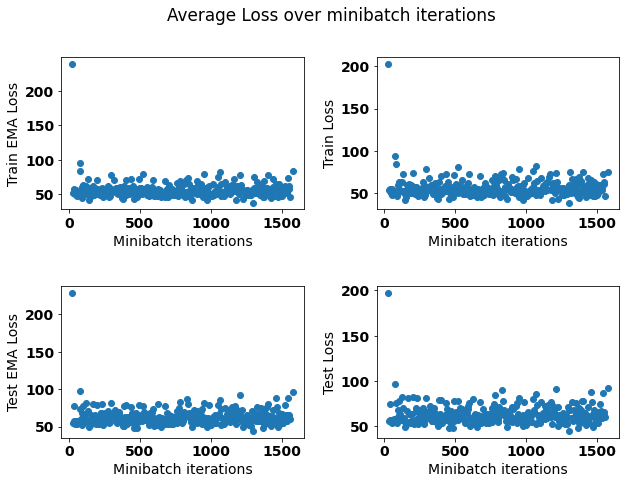

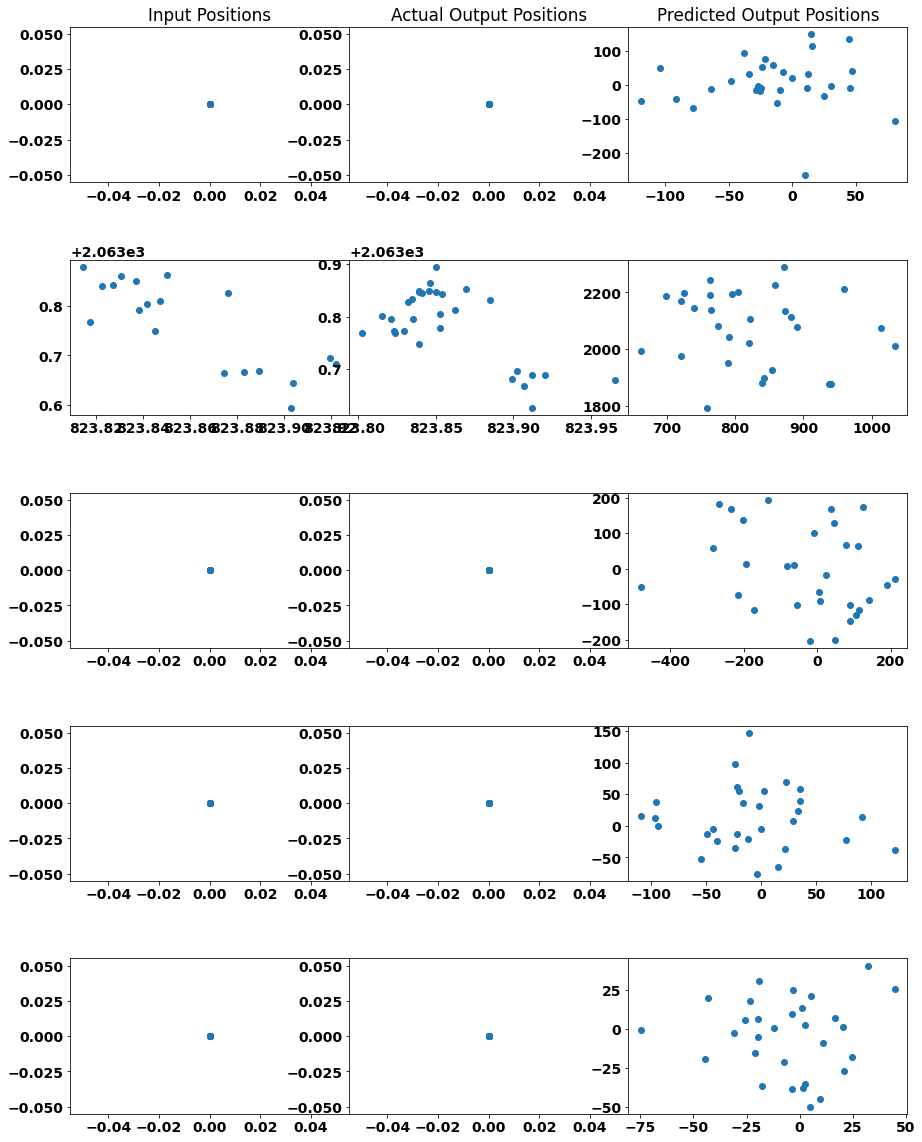

In [13]:
num_epochs=10
ema_weight=0.75
batch_size=128

model_str='simple-linear-ema75-epoch10-batchsz128'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.simple_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    save_model_path=model_fp
)

### With Dropout

In [14]:
help(tqdm.write)

Help on method write in module tqdm.std:

write(s, file=None, end='\n', nolock=False) method of builtins.type instance
    Print a message via tqdm (without overlap with bars).



Epoch 1/1:   0%|          | 0/1586 [00:00<?, ?it/s]

Epoch: 1, Train Loss: 138.62689208984375, Train EMA Loss: 159.17201232910156 Test Loss: 135.42384338378906, Test EMA Loss: 135.7437744140625
Completed training in 0 hours,3 minutes, 11 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      801.872192  801.872192     697.863220  697.863220
1       1.0        1.0      779.939148  714.139893     671.137817  590.961792
2       1.0        2.0      729.206909  577.010193     640.739868  549.545959
3       1.0        3.0      670.937195  496.128265     619.240601  554.742737
4       1.0        4.0      629.942932  506.960297     599.095825  538.661560
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      132.370880  126.251518     136.651001  133.255753
1582    1.0     1582.0      130.084320  123.224640     136.088089  134.399338
1583    1.0     1583.0      127.435669  119.489716     134.634003  130.271713
1584    1.0     1584.0      131.778519  144.807083     135.317200  137.366776
1585    1.0     1585.0      138.626892  159.172012     135.423843  135.743774

[1586 rows x 6 columns]

simple_model(
  (linear): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=4560, out_features=7200, bias=True)
  )
)

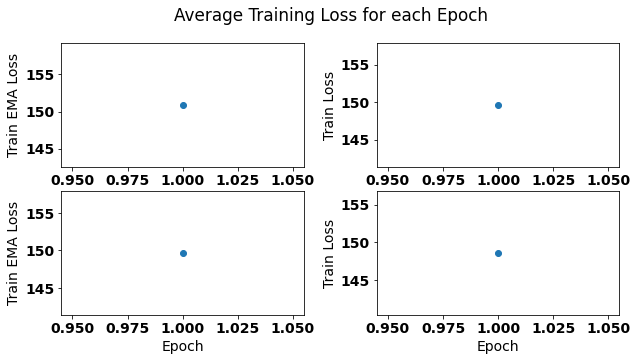

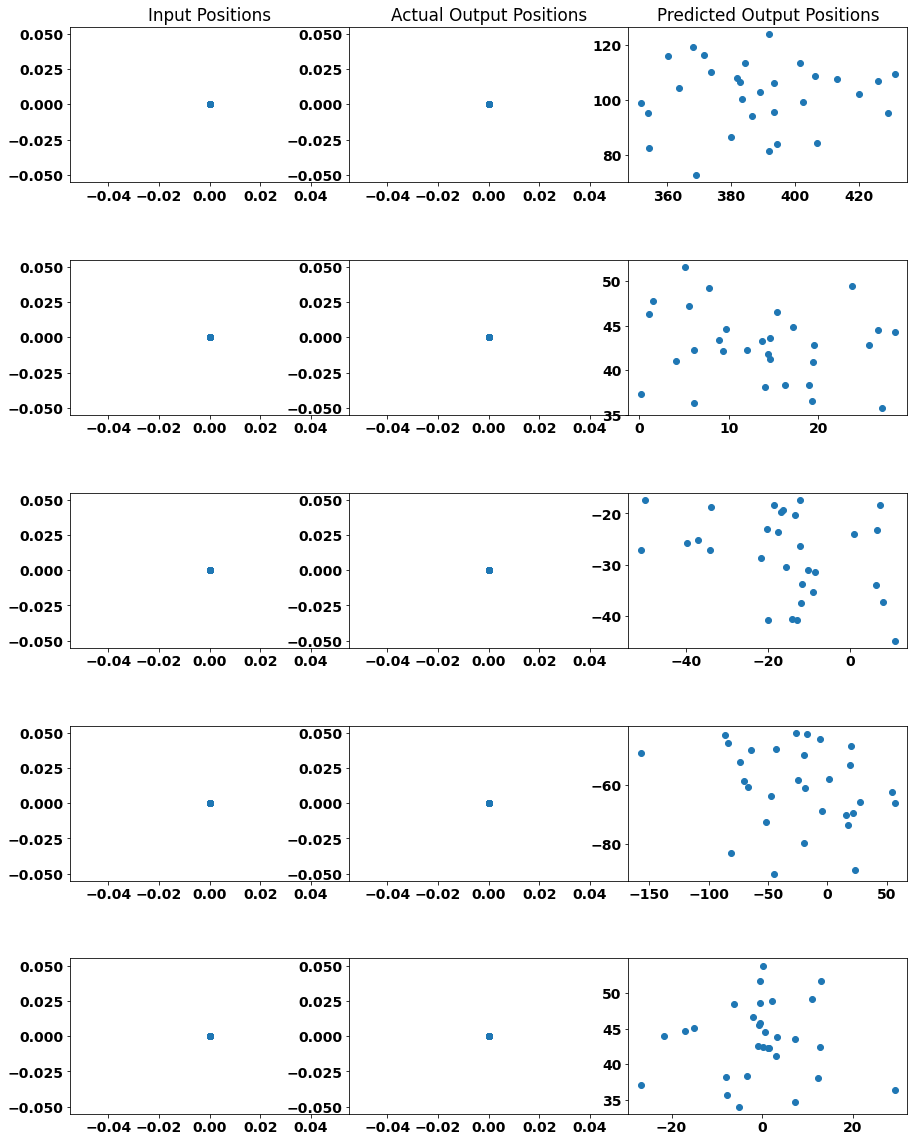

In [8]:
num_epochs=1
ema_weight=0.75
batch_size=128
dropout=0.5

model_str='simple-linear-ema75-epoch01-batchsz128-dropout50'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.simple_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    epoch_loss=True,
    dropout=dropout,
    save_model_path=model_fp
)

Epoch 1/1:   0%|          | 0/1586 [00:00<?, ?it/s]

Epoch: 1, Train Loss: 113.94329833984375, Train EMA Loss: 135.70355224609375 Test Loss: 148.46102905273438, Test EMA Loss: 152.933349609375
Completed training in 0 hours,3 minutes, 28 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      723.855530  723.855530     647.124817  647.124817
1       1.0        1.0      702.880981  639.957336     616.246887  523.613037
2       1.0        2.0      652.548767  501.552032     583.576477  485.565155
3       1.0        3.0      603.701904  457.161499     558.427673  482.981201
4       1.0        4.0      568.631470  463.420135     529.904663  444.335815
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      113.591705  108.291916     150.270569  141.251587
1582    1.0     1582.0      108.958588   95.059219     157.030914  177.311935
1583    1.0     1583.0      109.736816  112.071495     150.411209  130.552078
1584    1.0     1584.0      106.689880   97.549057     146.970245  136.647369
1585    1.0     1585.0      113.943298  135.703552     148.461029  152.933350

[1586 rows x 6 columns]

simple_model(
  (linear): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=4560, out_features=7200, bias=True)
  )
)

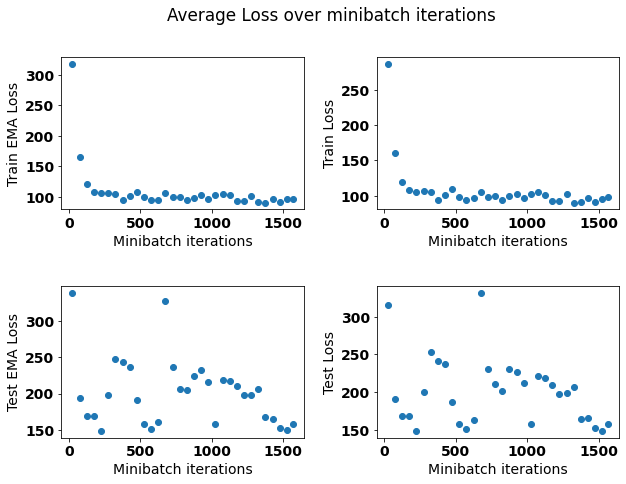

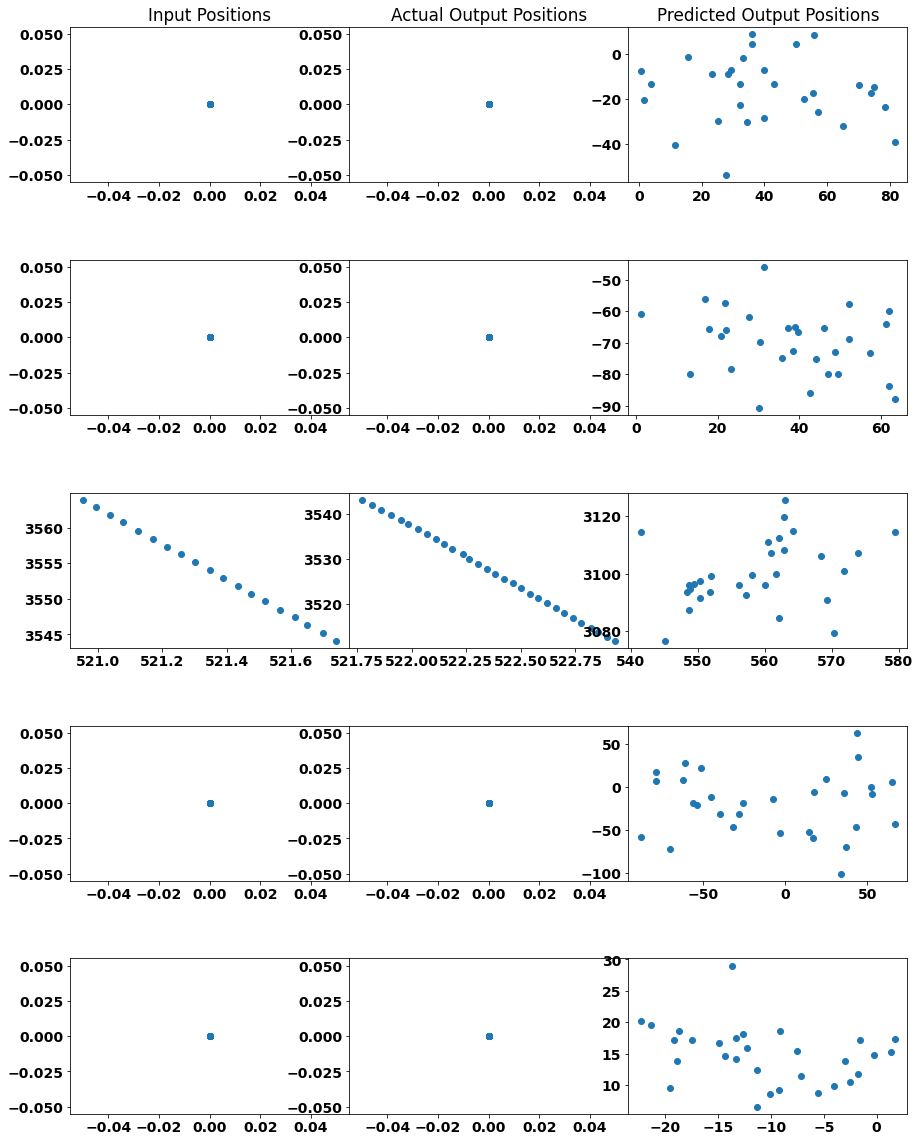

In [9]:
num_epochs=1
ema_weight=0.75
batch_size=128
dropout=0.25

model_str='simple-linear-ema75-epoch01-batchsz128-dropout25'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.simple_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    save_model_path=model_fp
)

Epoch 1/1:   0%|          | 0/1586 [00:00<?, ?it/s]

Epoch: 1, Train Loss: 205.87298583984375, Train EMA Loss: 215.83192443847656 Test Loss: 200.22573852539062, Test EMA Loss: 197.56175231933594
Completed training in 0 hours,3 minutes, 29 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      902.632996  902.632996     799.274536  799.274536
1       1.0        1.0      873.800293  787.302307     784.267212  739.245117
2       1.0        2.0      837.437134  728.347717     763.265198  700.259094
3       1.0        3.0      809.859253  727.125366     744.195190  686.985107
4       1.0        4.0      769.488037  648.374451     725.077271  667.723511
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      206.268265  223.610580     199.829819  200.365555
1582    1.0     1582.0      207.726730  212.102112     198.932739  196.241501
1583    1.0     1583.0      207.789474  207.977737     199.457520  201.031845
1584    1.0     1584.0      202.553345  186.844940     201.113724  206.082321
1585    1.0     1585.0      205.872986  215.831924     200.225739  197.561752

[1586 rows x 6 columns]

simple_model(
  (linear): Sequential(
    (0): Dropout(p=0.75, inplace=False)
    (1): Linear(in_features=4560, out_features=7200, bias=True)
  )
)

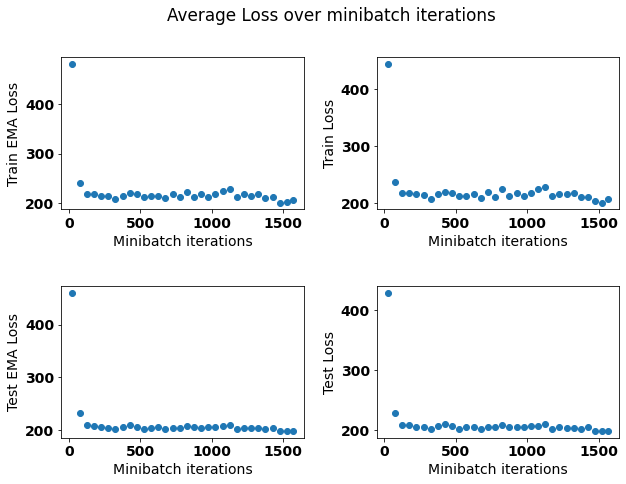

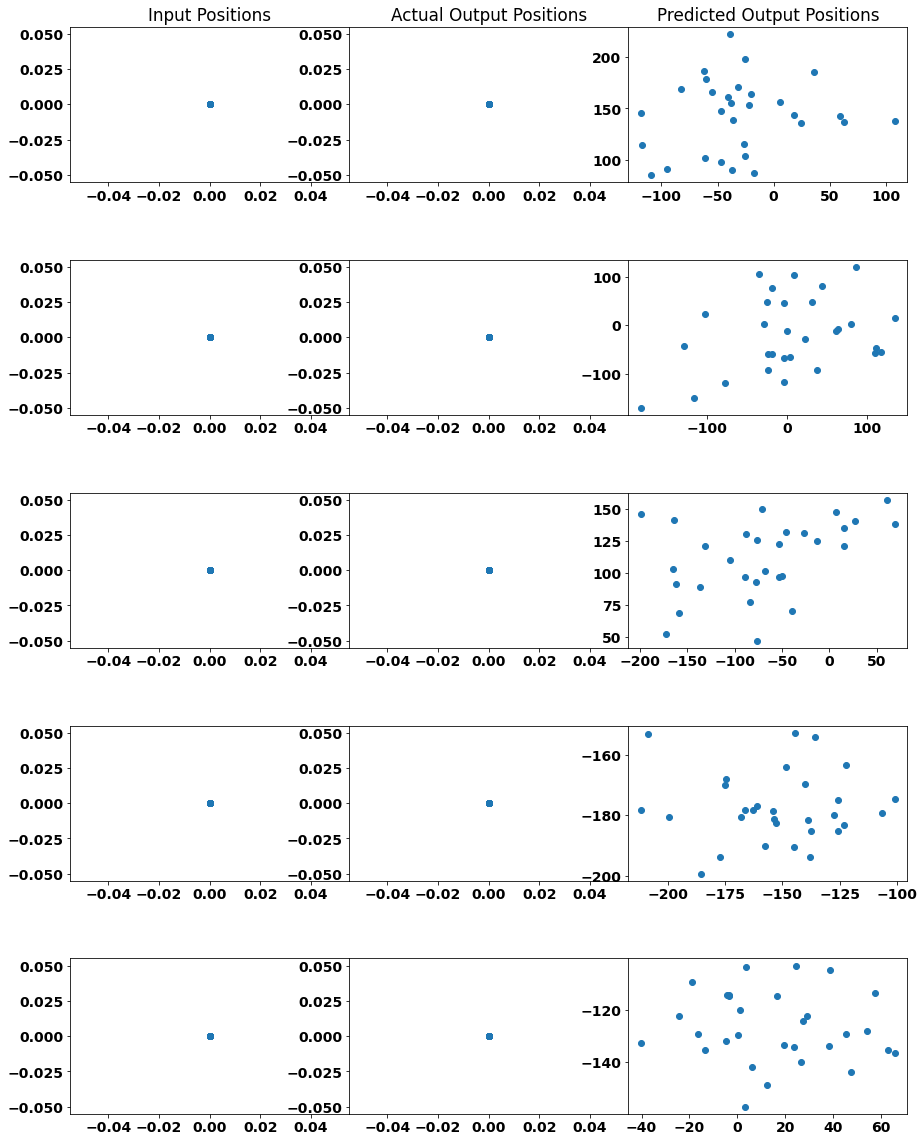

In [10]:
num_epochs=1
ema_weight=0.75
batch_size=128
dropout=0.75

model_str='simple-linear-ema75-epoch01-batchsz128-dropout75'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.simple_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    save_model_path=model_fp
)

Epoch: 1, Train Loss: 54.29585266113281, Train EMA Loss: 47.869747161865234 Test Loss: 60.151859283447266, Test EMA Loss: 59.04744338989258
Completed training in 0 hours,3 minutes, 22 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      726.333069  726.333069     655.243835  655.243835
1       1.0        1.0      705.905457  644.622498     617.162537  502.918610
2       1.0        2.0      646.893494  469.857758     577.395081  458.092865
3       1.0        3.0      595.523071  441.411957     547.780518  458.936890
4       1.0        4.0      564.703979  472.246582     512.497681  406.649200
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0       58.774586   57.452221      61.918251   58.827126
1582    1.0     1582.0       58.278816   56.791504      61.012005   58.293259
1583    1.0     1583.0       56.567596   51.433933      60.933746   60.698967
1584    1.0     1584.0       56.437889   56.048771      60.519997   59.278755
1585    1.0     1585.0       54.295853   47.869747      60.151859   59.047443

[1586 rows x 6 columns]

simple_model(
  (linear): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=4560, out_features=7200, bias=True)
  )
)

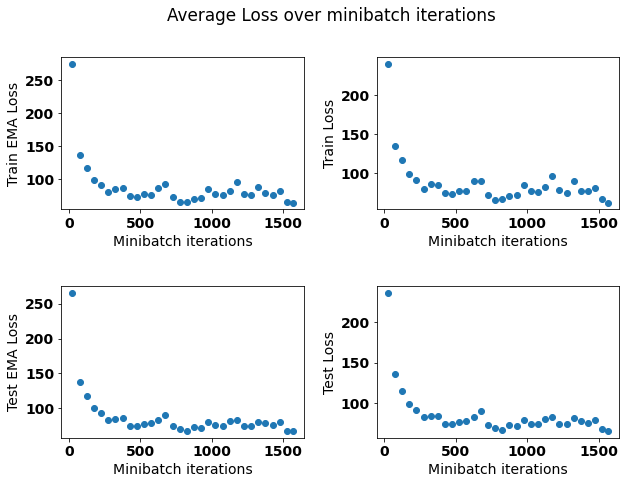

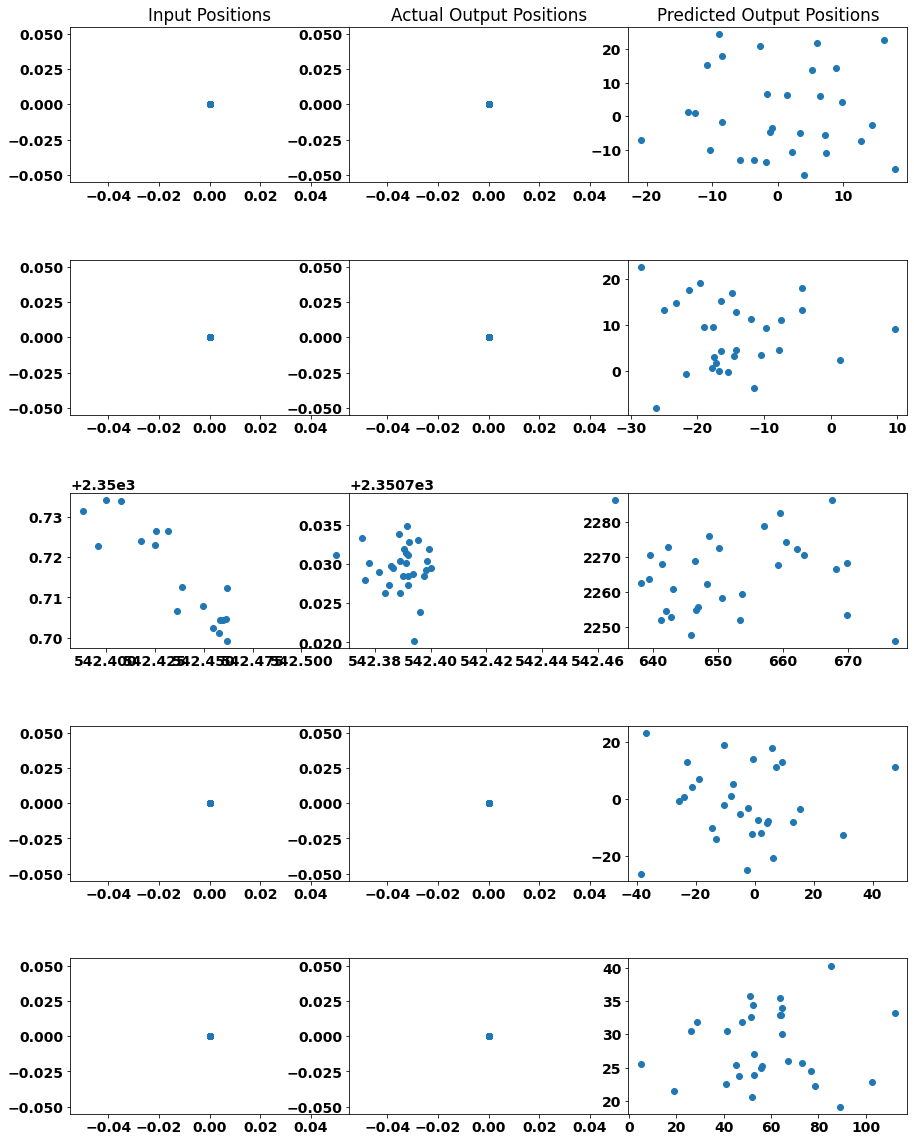

In [16]:
num_epochs=1
ema_weight=0.75
batch_size=128
dropout=0.1

model_str='simple-linear-ema75-epoch01-batchsz128-dropout10'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.simple_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    save_model_path=model_fp
)

## Run `simple_model` with 10 epochs and `dropout=0.1,0.25`

Epoch 1/10:   0%|          | 0/1586 [00:00<?, ?it/s]

Epoch: 1, Train Loss: 86.45071411132812, Train EMA Loss: 76.39804077148438 Test Loss: 68.99885559082031, Test EMA Loss: 68.76714324951172


Epoch 2/10:   0%|          | 0/1586 [00:00<?, ?it/s]

Epoch: 2, Train Loss: 68.45262145996094, Train EMA Loss: 67.88179016113281 Test Loss: 60.17383575439453, Test EMA Loss: 58.81792449951172


Epoch 3/10:   0%|          | 0/1586 [00:00<?, ?it/s]

Epoch: 3, Train Loss: 76.76731872558594, Train EMA Loss: 87.90975189208984 Test Loss: 63.61949920654297, Test EMA Loss: 63.317344665527344


Epoch 4/10:   0%|          | 0/1586 [00:00<?, ?it/s]

Epoch: 4, Train Loss: 61.45615005493164, Train EMA Loss: 62.251033782958984 Test Loss: 59.64021301269531, Test EMA Loss: 61.68754196166992


Epoch 5/10:   0%|          | 0/1586 [00:00<?, ?it/s]

Epoch: 5, Train Loss: 71.87847900390625, Train EMA Loss: 68.99974060058594 Test Loss: 63.10845184326172, Test EMA Loss: 58.747032165527344


Epoch 6/10:   0%|          | 0/1586 [00:00<?, ?it/s]

Epoch: 6, Train Loss: 105.41461944580078, Train EMA Loss: 75.47903442382812 Test Loss: 78.38063049316406, Test EMA Loss: 77.09740447998047


Epoch 7/10:   0%|          | 0/1586 [00:00<?, ?it/s]

Epoch: 7, Train Loss: 64.56278991699219, Train EMA Loss: 68.86576843261719 Test Loss: 61.863555908203125, Test EMA Loss: 65.49530792236328


Epoch 8/10:   0%|          | 0/1586 [00:00<?, ?it/s]

Epoch: 8, Train Loss: 59.38778305053711, Train EMA Loss: 51.57280349731445 Test Loss: 56.436790466308594, Test EMA Loss: 55.726158142089844


Epoch 9/10:   0%|          | 0/1586 [00:00<?, ?it/s]

Epoch: 9, Train Loss: 81.93596649169922, Train EMA Loss: 94.15352630615234 Test Loss: 68.22697448730469, Test EMA Loss: 67.87657165527344


Epoch 10/10:   0%|          | 0/1586 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f8846c44a60>
Traceback (most recent call last):
  File "/home/apfriend/anaconda3/envs/cse151b/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/home/apfriend/anaconda3/envs/cse151b/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/home/apfriend/anaconda3/envs/cse151b/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f8846c44a60>Traceback (most recent call last):
  File "/home/apfriend/anaconda3/envs/cse151b/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/home/apfriend/anaconda3/envs/cse

Epoch: 10, Train Loss: 64.55281066894531, Train EMA Loss: 64.65322875976562 Test Loss: 62.050941467285156, Test EMA Loss: 59.280818939208984
Completed training in 0 hours,39 minutes, 16 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      701.971069  701.971069     578.966431  578.966431
1        1.0        1.0      684.976074  633.991333     546.896729  450.687744
2        1.0        2.0      628.781067  460.196045     514.278015  416.421844
3        1.0        3.0      590.591858  476.024200     488.268188  410.238708
4        1.0        4.0      546.724060  415.120636     458.888275  370.748566
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0       66.489395   74.609467      61.066647   58.219910
15856   10.0     1582.0       65.268608   61.606247      62.900806   68.403290
15857   10.0     1583.0       66.184273   68.931267      62.437111   61.046028
15858   10.0     1584.0       64.519333   59.524490      62.974312   64.585915
15859   10.0     1585.0       64.552811   64.653229      62.050941   59.280819

[15860 rows x 6 columns]

simple_model(
  (linear): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=4560, out_features=7200, bias=True)
  )
)

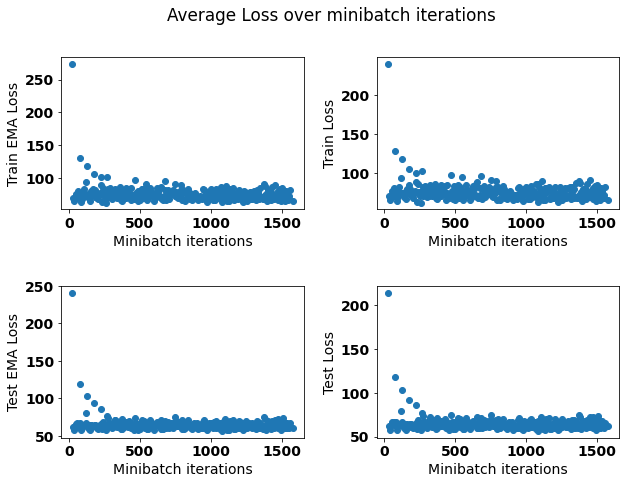

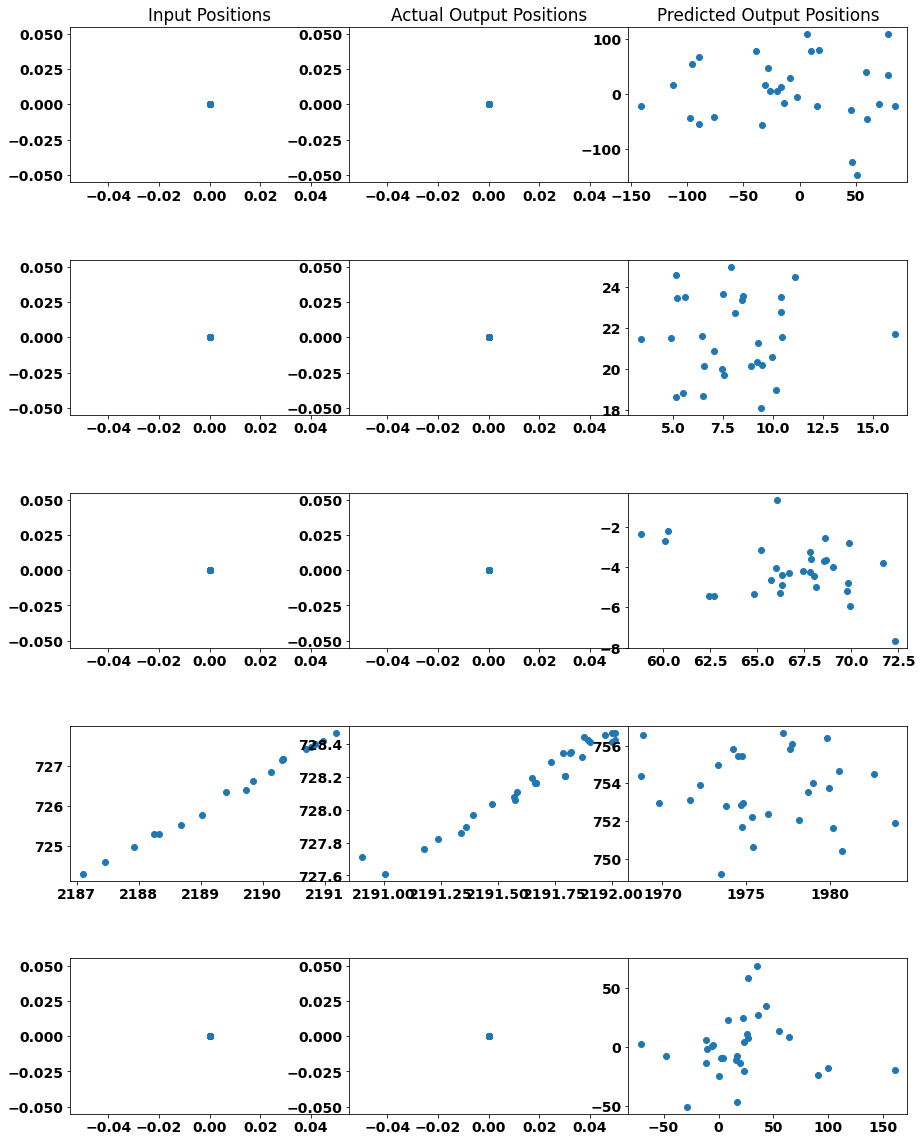

In [17]:
num_epochs=10
ema_weight=0.75
batch_size=128
dropout=0.1

model_str='simple-linear-ema75-epoch10-batchsz128-dropout10'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.simple_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    epoch_loss=True,
    save_model_path=model_fp
)

Epoch: 1, Train Loss: 99.15383911132812, Train EMA Loss: 87.71578979492188 Test Loss: 95.80889892578125, Test EMA Loss: 97.48542785644531


Epoch: 2, Train Loss: 93.22700500488281, Train EMA Loss: 86.38987731933594 Test Loss: 87.39508056640625, Test EMA Loss: 85.51360321044922


Epoch: 3, Train Loss: 91.643798828125, Train EMA Loss: 93.56342315673828 Test Loss: 89.4990234375, Test EMA Loss: 88.33290100097656


Epoch: 4, Train Loss: 113.05992126464844, Train EMA Loss: 138.62417602539062 Test Loss: 95.44987487792969, Test EMA Loss: 94.81033325195312


Epoch: 5, Train Loss: 92.50041198730469, Train EMA Loss: 89.79597473144531 Test Loss: 89.12640380859375, Test EMA Loss: 90.72730255126953


Epoch: 6, Train Loss: 92.58134460449219, Train EMA Loss: 93.00559997558594 Test Loss: 88.35641479492188, Test EMA Loss: 88.49339294433594


Epoch: 7, Train Loss: 95.92227172851562, Train EMA Loss: 99.95587158203125 Test Loss: 93.84396362304688, Test EMA Loss: 96.03748321533203


Epoch: 8, Train Loss: 110.82547760009766, Train EMA Loss: 94.25110626220703 Test Loss: 98.58151245117188, Test EMA Loss: 100.83277130126953


Epoch: 9, Train Loss: 93.06661987304688, Train EMA Loss: 81.98656463623047 Test Loss: 88.29739379882812, Test EMA Loss: 85.59612274169922


Epoch: 10, Train Loss: 87.4693832397461, Train EMA Loss: 88.86270904541016 Test Loss: 84.95149230957031, Test EMA Loss: 89.80552673339844


Completed training in 0 hours,33 minutes, 54 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      695.333374  695.333374     623.114197  623.114197
1        1.0        1.0      679.809387  633.237549     590.611694  493.104187
2        1.0        2.0      631.629883  487.091339     556.101501  452.570892
3        1.0        3.0      579.945557  424.892639     531.288391  456.849030
4        1.0        4.0      549.199402  456.961029     505.507874  428.166229
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0       88.184013   91.035805      81.880844   81.199745
15856   10.0     1582.0       90.625641   97.950531      82.679031   85.073593
15857   10.0     1583.0       87.906067   79.747345      83.394119   85.539368
15858   10.0     1584.0       87.004944   84.301559      83.333473   83.151527
15859   10.0     1585.0       87.469383   88.862709      84.951492   89.805527

[15860 rows x 6 columns]

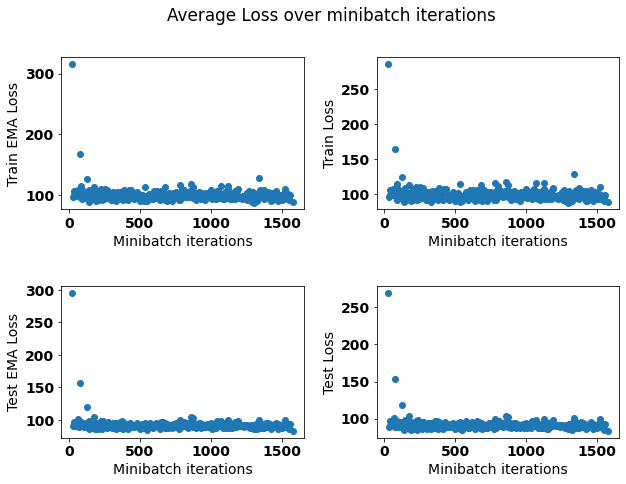

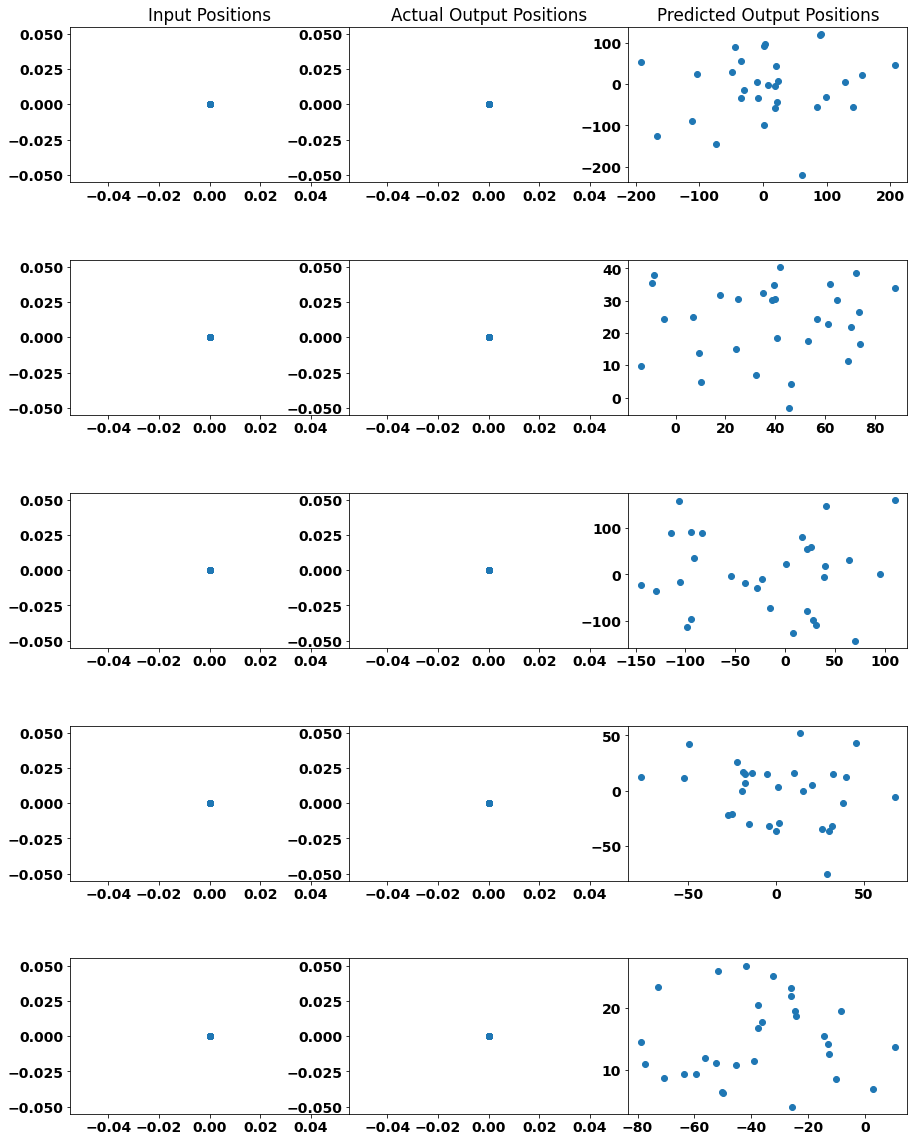

In [19]:
num_epochs=10
ema_weight=0.75
batch_size=128
dropout=0.25

model_str='simple-linear-ema75-epoch10-batchsz128-dropout10'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

lm06=run_model.train_evaluate(
    model=linear.simple_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    epoch_loss=True,
    save_model_path=model_fp
)

# Multi linear model

Epoch: 1, Train Loss: 50.9906120300293, Train EMA Loss: 46.3990364074707 Test Loss: 57.101585388183594, Test EMA Loss: 60.25783920288086
Completed training in 0 hours,3 minutes, 22 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      629.091858  629.091858     551.590332  551.590332
1       1.0        1.0      619.556580  590.950623     540.334534  506.567230
2       1.0        2.0      589.739075  500.286560     518.528625  453.110931
3       1.0        3.0      560.380981  472.306732     493.689148  419.170624
4       1.0        4.0      525.999390  422.854523     469.265228  395.993561
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0       54.279728   54.458027      55.536884   57.144161
1582    1.0     1582.0       53.232639   50.091366      56.021561   57.475586
1583    1.0     1583.0       53.713074   55.154366      56.104256   56.352345
1584    1.0     1584.0       52.521137   48.945328      56.049500   55.885227
1585    1.0     1585.0       50.990612   46.399036      57.101585   60.257839

[1586 rows x 6 columns]

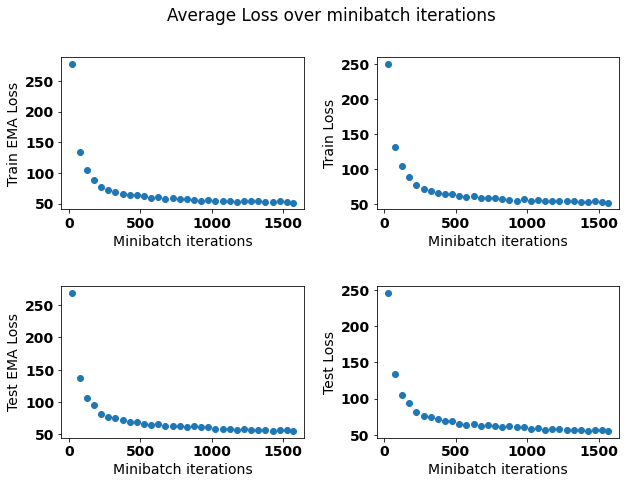

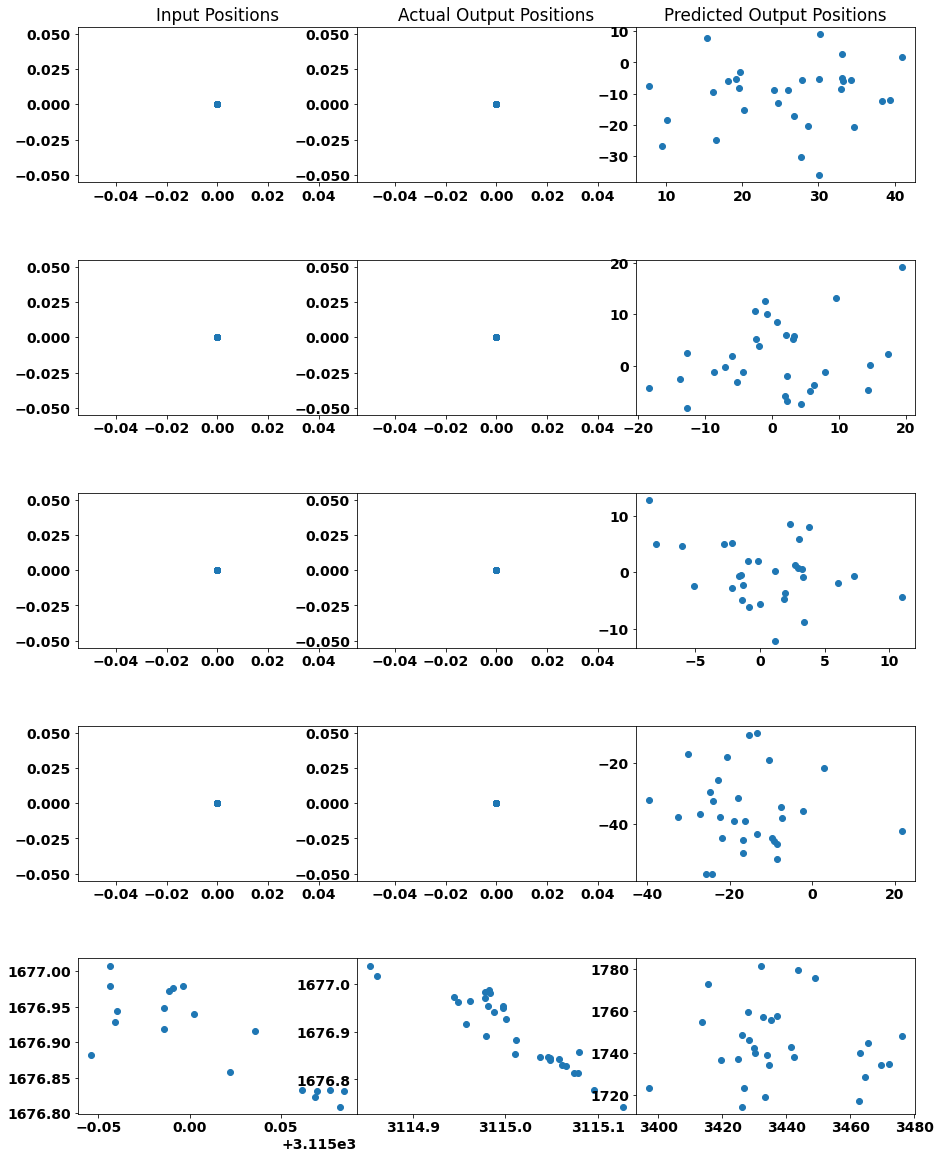

In [21]:
num_epochs=1
ema_weight=0.75
batch_size=128
dropout=0.5

model_str='multilayer-linear-ema75-epoch01-batchsz128-dropout50'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

lm08=run_model.train_evaluate(
    model=linear.multilayer_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    save_model_path=model_fp
)

### Bilinear model

Epoch: 1, Train Loss: 587.7385864257812, Train EMA Loss: 605.2996215820312 Test Loss: 607.3968505859375, Test EMA Loss: 607.396240234375
Completed training in 0 hours,3 minutes, 22 seconds


epoch  iteration  train_loss_ema     train_loss  test_loss_ema  \
0       1.0        0.0   165545.531250  165545.531250   94115.804688   
1       1.0        1.0   146387.250000   88912.421875   73457.562500   
2       1.0        2.0   112601.820312   11245.536133   55884.359375   
3       1.0        3.0    85240.671875    3157.219727   42096.910156   
4       1.0        4.0    64121.410156     763.625061   31733.720703   
...     ...        ...             ...            ...            ...   
1581    1.0     1581.0      595.624329     593.144836     607.397827   
1582    1.0     1582.0      591.890991     580.690979     607.397583   
1583    1.0     1583.0      590.668945     587.002808     607.397339   
1584    1.0     1584.0      581.884888     555.532593     607.397095   
1585    1.0     1585.0      587.738586     605.299622     607.396851   

         test_loss  
0     94115.804688  
1     11482.857422  
2      3164.743896  
3       734.560181  
4       644.152222  
...            ...  
1581    607.397156  
1582    607.396912  
1583    607.396667  
1584    607.396484  
1585    607.396240  

[1586 rows x 6 columns]

linear_model2(
  (linear1): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=4560, out_features=2048, bias=True)
  )
  (linear2): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=2048, out_features=7200, bias=True)
  )
  (relu): ReLU()
)

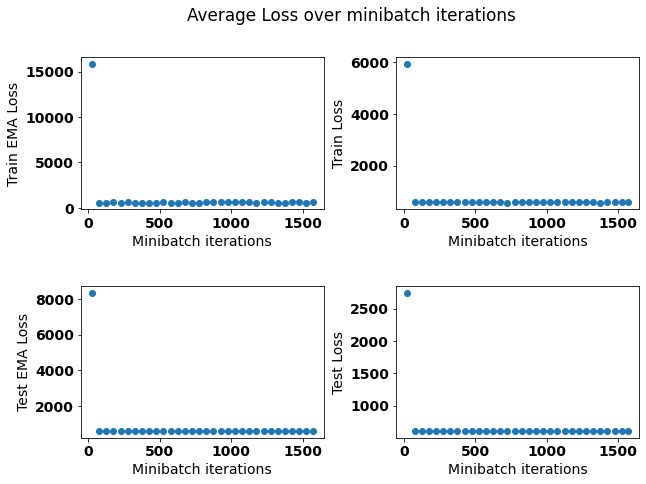

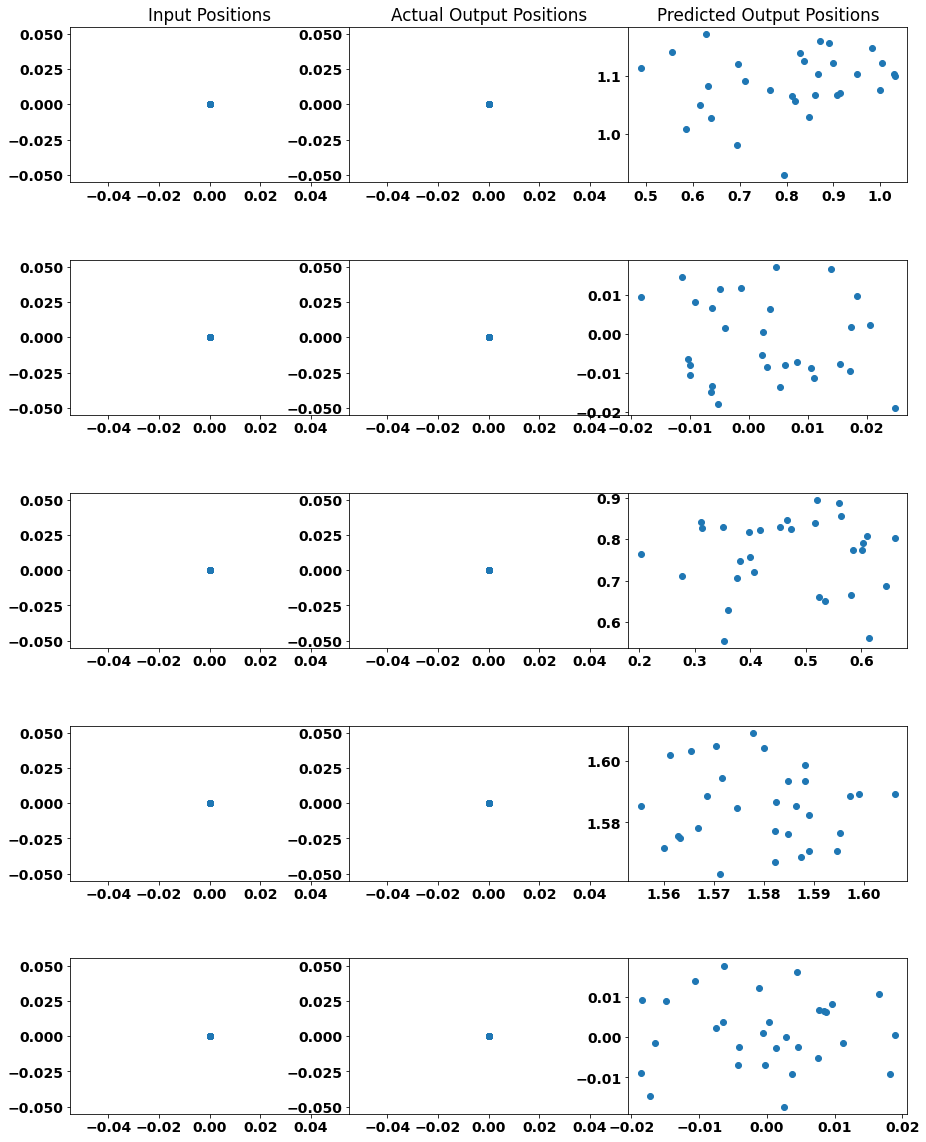

In [22]:
num_epochs=1
ema_weight=0.75
batch_size=128
dropout=0.25

model_str='linear_model2-ema75-epoch01-batchsz128-dropout25'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.linear_model2,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    save_model_path=model_fp
)

In [23]:
num_epochs=1
ema_weight=0.75
batch_size=128
dropout=0.5

model_str='linear_model2-ema75-epoch01-batchsz128-dropout50'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.linear_model2,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    save_model_path=model_fp
)

KeyboardInterrupt: 

In [ ]:
num_epochs=1
ema_weight=0.75
batch_size=128
dropout=0.75

model_str='linear_model2-ema75-epoch01-batchsz128-dropout75'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.linear_model2,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    save_model_path=model_fp
)

## Add Batch Normalization

Models to use:
1. `simple_model` with parameters:
    - num_epochs=1
    - ema_weight=0.75
    - batch_size=128
    - dropout=0.1
2. `simple_model` with parameters:
    - num_epochs=1
    - ema_weight=0.75
    - batch_size=128
    - dropout=0.25
3. `linear_model2` with parameters:
    - num_epochs=1
    - ema_weight=0.75
    - batch_size=128
    - dropout=0.25
4. `linear_model2` with parameters:
    - num_epochs=1
    - ema_weight=0.75
    - batch_size=128
    - dropout=0.75

Epoch: 1, Train Loss: 367.7834777832031, Train EMA Loss: 369.7095031738281 Test Loss: 378.8799743652344, Test EMA Loss: 378.587646484375
Completed training in 0 hours,3 minutes, 32 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      624.497925  624.497925     633.496582  633.496582
1       1.0        1.0      613.422363  580.195618     633.434326  633.247559
2       1.0        2.0      599.599854  558.132385     633.327026  633.005249
3       1.0        3.0      592.274109  570.296936     633.185974  632.762878
4       1.0        4.0      582.479980  553.097717     633.019043  632.518250
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      360.936859  381.832489     379.256836  378.606171
1582    1.0     1582.0      361.388306  362.742645     379.293915  379.405182
1583    1.0     1583.0      358.888336  351.388428     379.187256  378.867279
1584    1.0     1584.0      367.141479  391.900818     378.977417  378.347900
1585    1.0     1585.0      367.783478  369.709503     378.879974  378.587646

[1586 rows x 6 columns]

simple_model(
  (linear): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=4560, out_features=7200, bias=True)
  )
)

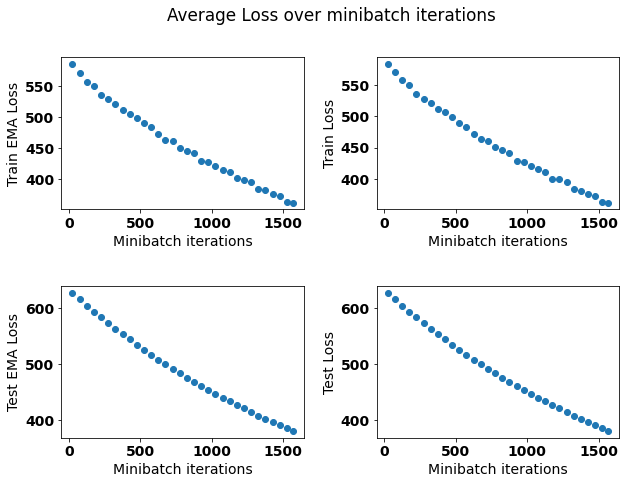

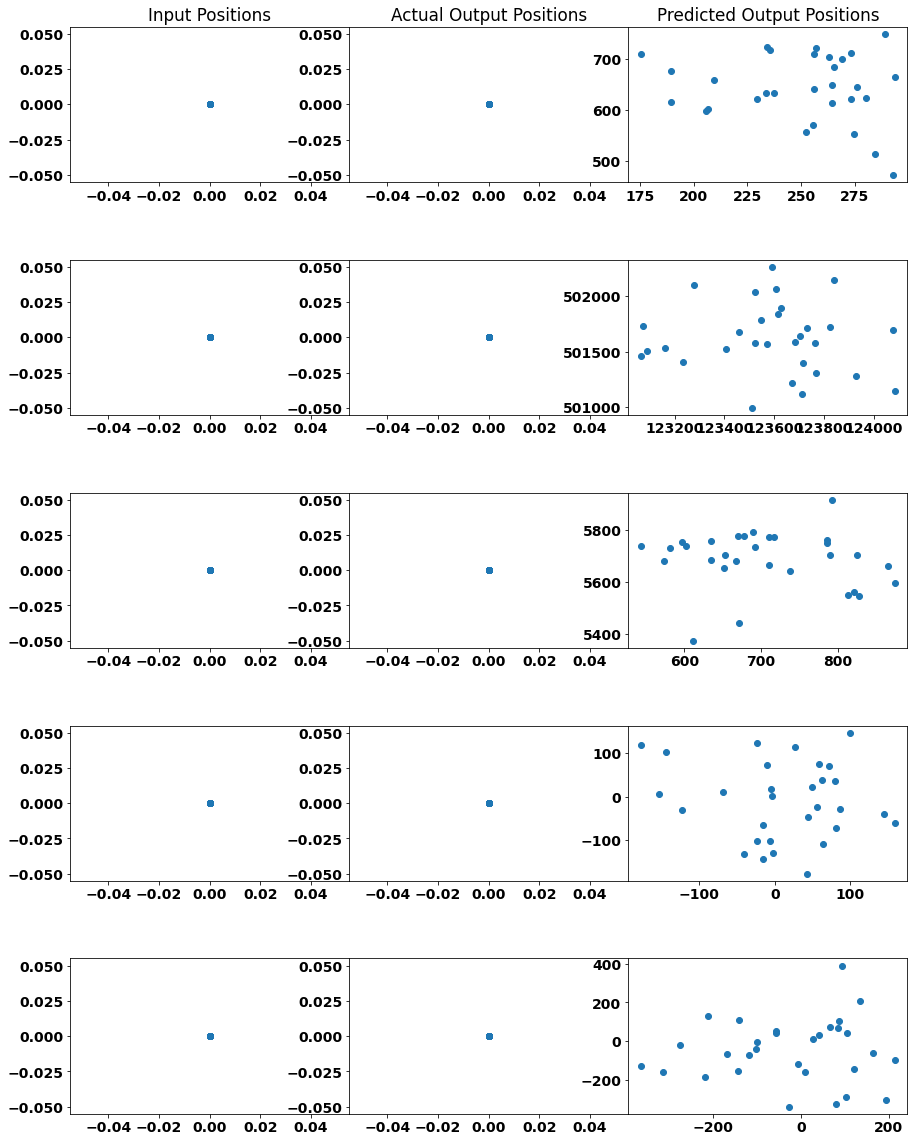

In [4]:
num_epochs=1
ema_weight=0.75
batch_size=128
dropout=0.1

model_str='simple-linear-ema75-epoch01-batchsz128-dropout10-batchnorm'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.simple_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    normalize=True,
    save_model_path=model_fp
)

Epoch: 1, Train Loss: 356.7613830566406, Train EMA Loss: 344.7862243652344 Test Loss: 359.5470275878906, Test EMA Loss: 359.1327209472656


Epoch: 2, Train Loss: 257.4850769042969, Train EMA Loss: 273.8858337402344 Test Loss: 250.81857299804688, Test EMA Loss: 250.57119750976562


Epoch: 3, Train Loss: 196.49746704101562, Train EMA Loss: 202.69833374023438 Test Loss: 198.02865600585938, Test EMA Loss: 198.08702087402344


Epoch: 4, Train Loss: 167.7131805419922, Train EMA Loss: 173.78994750976562 Test Loss: 171.00656127929688, Test EMA Loss: 170.67559814453125


Epoch: 5, Train Loss: 153.455078125, Train EMA Loss: 160.91748046875 Test Loss: 153.58053588867188, Test EMA Loss: 153.87619018554688


Epoch: 6, Train Loss: 133.0135955810547, Train EMA Loss: 133.9694366455078 Test Loss: 139.20042419433594, Test EMA Loss: 139.06117248535156


Epoch: 7, Train Loss: 125.46172332763672, Train EMA Loss: 118.87613677978516 Test Loss: 127.99317169189453, Test EMA Loss: 127.51300811767578


Epoch: 8, Train Loss: 118.09387969970703, Train EMA Loss: 119.09844207763672 Test Loss: 118.6363525390625, Test EMA Loss: 118.52247619628906


Epoch: 9, Train Loss: 112.01979064941406, Train EMA Loss: 112.11759948730469 Test Loss: 112.02171325683594, Test EMA Loss: 112.00730895996094


Epoch: 10, Train Loss: 103.58538818359375, Train EMA Loss: 100.25865173339844 Test Loss: 105.83838653564453, Test EMA Loss: 105.87039184570312


Completed training in 0 hours,34 minutes, 12 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      554.959106  554.959106     584.277649  584.277649
1        1.0        1.0      555.876587  558.628967     584.217102  584.035461
2        1.0        2.0      559.756592  571.396545     584.111267  583.793701
3        1.0        3.0      564.694885  579.509827     583.974731  583.565247
4        1.0        4.0      567.963745  577.770203     583.813843  583.331299
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0      106.610367  109.747459     106.109177  106.521713
15856   10.0     1582.0      107.446960  109.956726     106.075363  105.973930
15857   10.0     1583.0      104.456566   95.485390     105.965874  105.637428
15858   10.0     1584.0      104.694290  105.407471     105.827713  105.413223
15859   10.0     1585.0      103.585388  100.258652     105.838387  105.870392

[15860 rows x 6 columns]

simple_model(
  (linear): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=4560, out_features=7200, bias=True)
  )
)

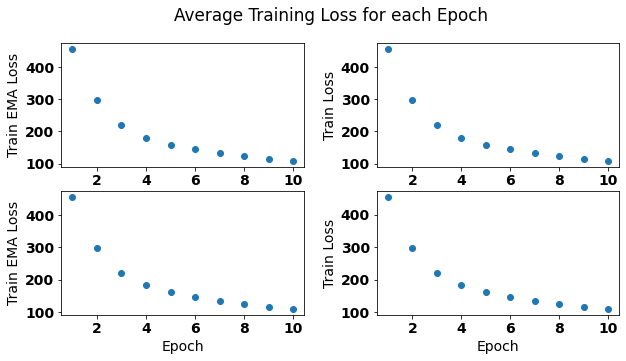

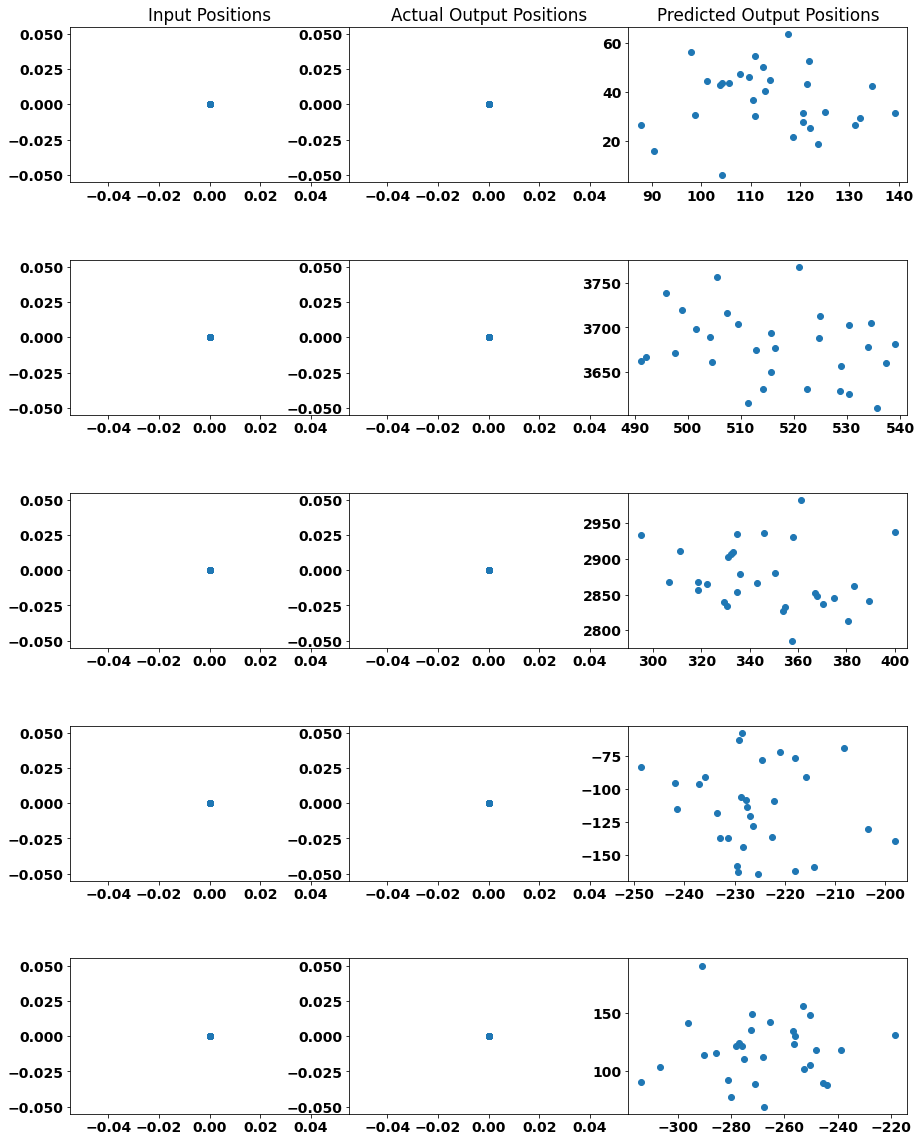

In [5]:
num_epochs=10
ema_weight=0.75
batch_size=128
dropout=0.1

model_str='simple-linear-ema75-epoch10-batchsz128-dropout10-batchnorm'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.simple_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    normalize=True,
    epoch_loss=True,
    save_model_path=model_fp
)

Epoch: 1, Train Loss: 364.919189453125, Train EMA Loss: 371.64453125 Test Loss: 364.67041015625, Test EMA Loss: 364.1611328125


Epoch: 2, Train Loss: 242.95225524902344, Train EMA Loss: 237.7354278564453 Test Loss: 257.77838134765625, Test EMA Loss: 257.31243896484375


Epoch: 3, Train Loss: 194.89625549316406, Train EMA Loss: 197.08306884765625 Test Loss: 203.23910522460938, Test EMA Loss: 202.79335021972656


Epoch: 4, Train Loss: 172.0660400390625, Train EMA Loss: 177.0743408203125 Test Loss: 174.49705505371094, Test EMA Loss: 174.57293701171875


Epoch: 5, Train Loss: 150.90048217773438, Train EMA Loss: 144.60202026367188 Test Loss: 156.94601440429688, Test EMA Loss: 156.99310302734375


Epoch: 6, Train Loss: 139.66339111328125, Train EMA Loss: 148.98971557617188 Test Loss: 143.07809448242188, Test EMA Loss: 143.1036834716797


Epoch: 7, Train Loss: 124.50078582763672, Train EMA Loss: 126.92200469970703 Test Loss: 132.1396484375, Test EMA Loss: 131.94235229492188


Epoch: 8, Train Loss: 119.0696792602539, Train EMA Loss: 120.3413314819336 Test Loss: 124.63750457763672, Test EMA Loss: 124.32568359375


Epoch: 9, Train Loss: 108.4921875, Train EMA Loss: 106.83316040039062 Test Loss: 116.69729614257812, Test EMA Loss: 118.10392761230469


Epoch: 10, Train Loss: 108.060791015625, Train EMA Loss: 104.49457550048828 Test Loss: 111.17695617675781, Test EMA Loss: 111.50183868408203


Epoch: 11, Train Loss: 97.87777709960938, Train EMA Loss: 93.99431610107422 Test Loss: 105.66695404052734, Test EMA Loss: 105.32107543945312


Epoch: 12, Train Loss: 99.63909912109375, Train EMA Loss: 109.69825744628906 Test Loss: 100.72972106933594, Test EMA Loss: 99.36821746826172


Epoch: 13, Train Loss: 94.32351684570312, Train EMA Loss: 107.32856750488281 Test Loss: 98.36546325683594, Test EMA Loss: 97.22932434082031


Epoch: 14, Train Loss: 89.74600982666016, Train EMA Loss: 88.19161224365234 Test Loss: 95.05687713623047, Test EMA Loss: 95.35796356201172


Epoch: 15, Train Loss: 84.19108581542969, Train EMA Loss: 88.0393295288086 Test Loss: 91.15367126464844, Test EMA Loss: 92.04069519042969


Epoch: 16, Train Loss: 85.00955200195312, Train EMA Loss: 85.91619873046875 Test Loss: 88.945556640625, Test EMA Loss: 90.00523376464844


Epoch: 17, Train Loss: 80.61026000976562, Train EMA Loss: 70.5464096069336 Test Loss: 86.27032470703125, Test EMA Loss: 84.57524108886719


Epoch: 18, Train Loss: 76.80703735351562, Train EMA Loss: 82.40125274658203 Test Loss: 84.30548095703125, Test EMA Loss: 84.49555969238281


Epoch: 19, Train Loss: 88.36981201171875, Train EMA Loss: 111.29082489013672 Test Loss: 81.12476348876953, Test EMA Loss: 81.59111785888672


Epoch: 20, Train Loss: 73.04890441894531, Train EMA Loss: 69.2076416015625 Test Loss: 80.09200286865234, Test EMA Loss: 79.77374267578125


Completed training in 1 hours,2 minutes, 57 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      616.196594  616.196594     567.131470  567.131470
1        1.0        1.0      604.392151  568.978821     567.079102  566.922119
2        1.0        2.0      595.662109  569.471985     566.988586  566.717041
3        1.0        3.0      601.457275  618.842773     566.868958  566.510071
4        1.0        4.0      599.923157  595.320801     566.726196  566.297852
...      ...        ...             ...         ...            ...         ...
31715   20.0     1581.0       73.573097   73.083549      80.535713   80.375679
31716   20.0     1582.0       72.333626   68.615204      80.472267   80.281921
31717   20.0     1583.0       75.184975   83.739006      80.702835   81.394539
31718   20.0     1584.0       74.329330   71.762398      80.198090   78.683868
31719   20.0     1585.0       73.048904   69.207642      80.092003   79.773743

[31720 rows x 6 columns]

simple_model(
  (linear): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=4560, out_features=7200, bias=True)
  )
)

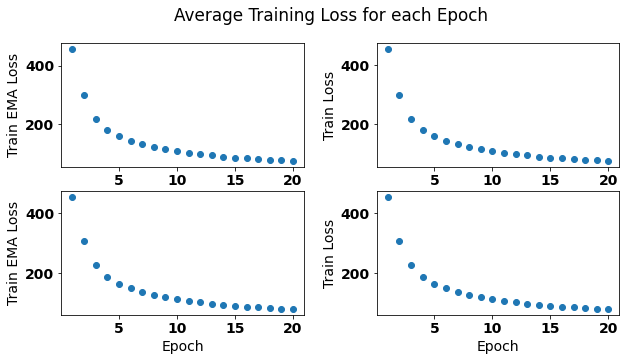

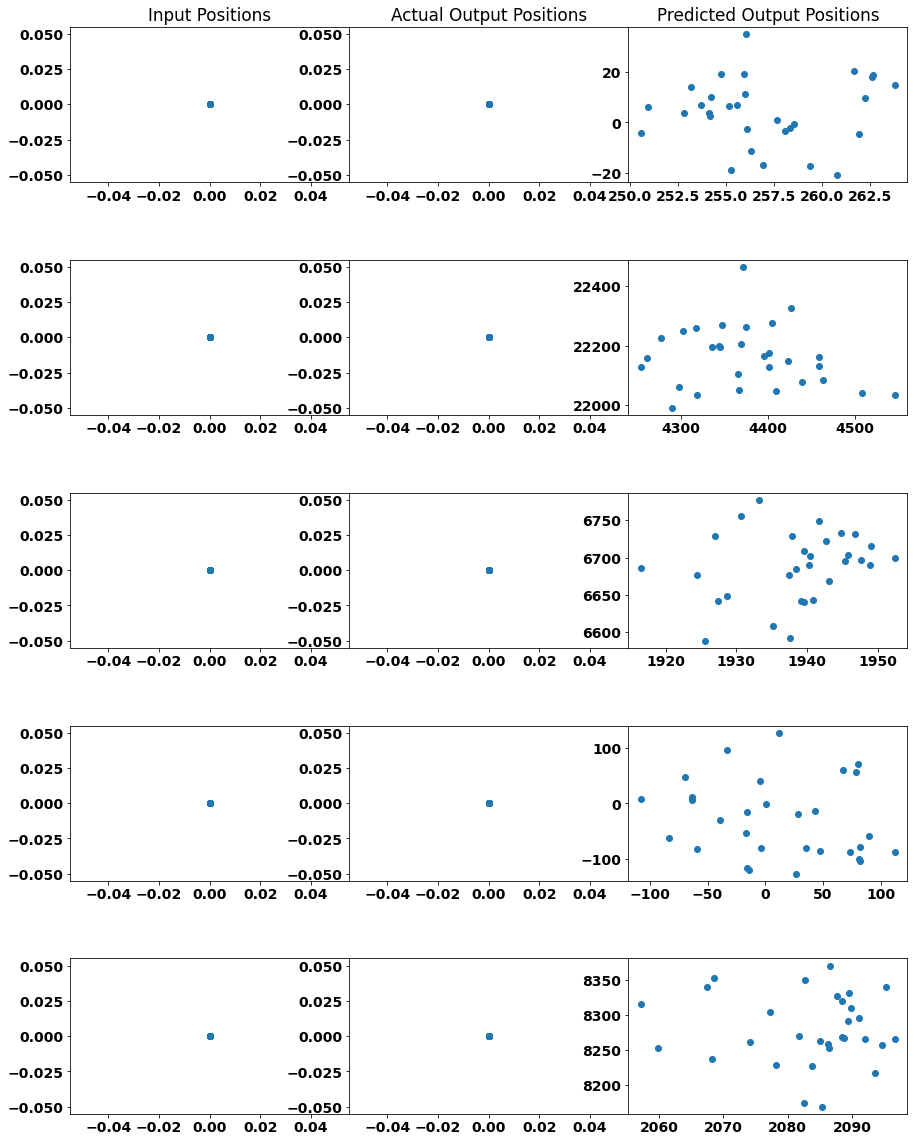

In [24]:
num_epochs=20
ema_weight=0.75
batch_size=128
dropout=0.1

model_str='simple-linear-ema75-epoch20-batchsz128-dropout10-batchnorm'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.simple_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    normalize=True,
    epoch_loss=True,
    save_model_path=model_fp
)

Epoch: 1, Train Loss: 360.12158203125, Train EMA Loss: 349.5069885253906 Test Loss: 369.6932067871094, Test EMA Loss: 369.9189147949219
Completed training in 0 hours,3 minutes, 30 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      575.958435  575.958435     584.135925  584.135925
1       1.0        1.0      569.725830  551.027954     584.084534  583.930359
2       1.0        2.0      563.855408  546.244202     583.994141  583.722900
3       1.0        3.0      567.237488  577.383789     583.873413  583.511292
4       1.0        4.0      575.041138  598.452209     583.734009  583.315918
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      356.079407  367.250671     369.704681  369.099213
1582    1.0     1582.0      360.893646  375.336334     369.515381  368.947571
1583    1.0     1583.0      362.048187  365.511841     369.279816  368.573090
1584    1.0     1584.0      363.659790  368.494690     369.617950  370.632355
1585    1.0     1585.0      360.121582  349.506989     369.693207  369.918915

[1586 rows x 6 columns]

simple_model(
  (linear): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=4560, out_features=7200, bias=True)
  )
)

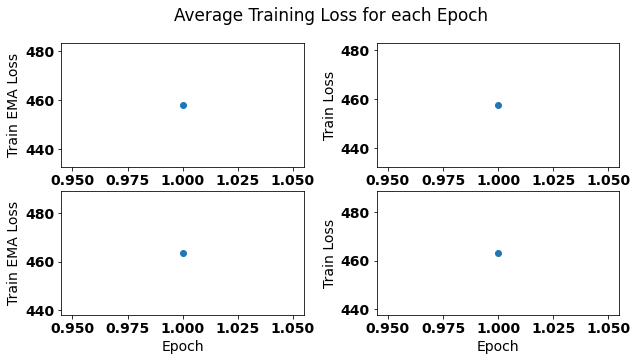

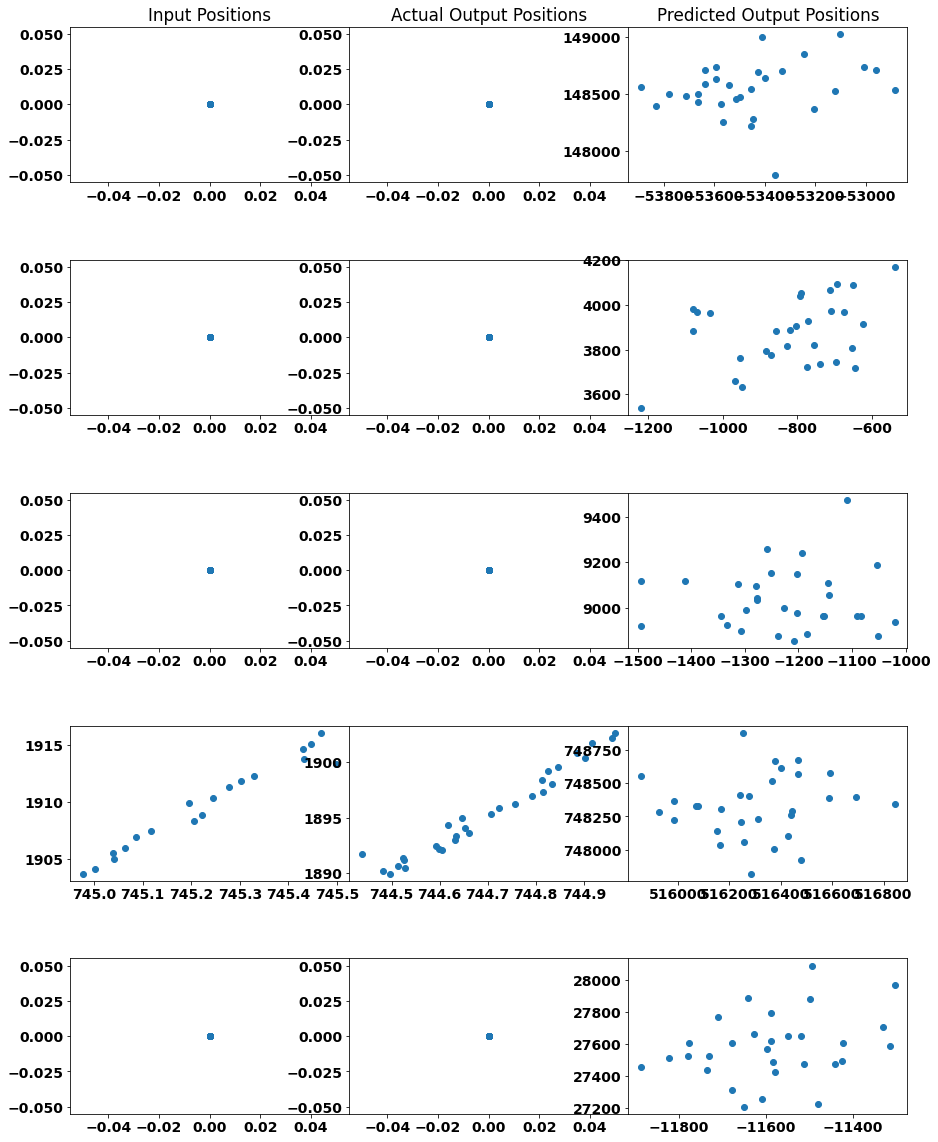

In [6]:
num_epochs=1
ema_weight=0.75
batch_size=128
dropout=0.25

model_str='simple-linear-ema75-epoch01-batchsz128-dropout25-batchnorm'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.simple_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    normalize=True,
    save_model_path=model_fp
)

Epoch: 1, Train Loss: 359.8194274902344, Train EMA Loss: 376.7911376953125 Test Loss: 370.2296142578125, Test EMA Loss: 369.4568176269531


Epoch: 2, Train Loss: 258.93426513671875, Train EMA Loss: 278.1471252441406 Test Loss: 259.25787353515625, Test EMA Loss: 258.8594055175781


Epoch: 3, Train Loss: 198.11260986328125, Train EMA Loss: 202.87100219726562 Test Loss: 207.00901794433594, Test EMA Loss: 206.83119201660156


Epoch: 4, Train Loss: 177.30535888671875, Train EMA Loss: 189.91744995117188 Test Loss: 181.28829956054688, Test EMA Loss: 181.31448364257812


Epoch: 5, Train Loss: 154.6829376220703, Train EMA Loss: 165.6352996826172 Test Loss: 165.38226318359375, Test EMA Loss: 166.5996551513672


Epoch: 6, Train Loss: 140.04156494140625, Train EMA Loss: 128.28094482421875 Test Loss: 153.03561401367188, Test EMA Loss: 153.00315856933594


Epoch: 7, Train Loss: 129.63177490234375, Train EMA Loss: 137.82113647460938 Test Loss: 143.67352294921875, Test EMA Loss: 143.76080322265625


Epoch: 8, Train Loss: 125.07357025146484, Train EMA Loss: 131.88882446289062 Test Loss: 134.97068786621094, Test EMA Loss: 134.63037109375


Epoch: 9, Train Loss: 115.91690063476562, Train EMA Loss: 113.56409454345703 Test Loss: 128.90176391601562, Test EMA Loss: 129.17640686035156


Epoch: 10, Train Loss: 109.53801727294922, Train EMA Loss: 118.0316390991211 Test Loss: 123.87384033203125, Test EMA Loss: 122.68128967285156


Completed training in 0 hours,34 minutes, 8 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      565.673523  565.673523     617.889648  617.889648
1        1.0        1.0      566.834045  570.315674     617.831177  617.655884
2        1.0        2.0      569.151489  576.103760     617.723694  617.401245
3        1.0        3.0      564.080505  548.867615     617.579834  617.148254
4        1.0        4.0      576.679260  614.475647     617.410645  616.903015
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0      107.865456  104.029564     123.784569  123.625275
15856   10.0     1582.0      108.511093  110.448013     124.397339  126.235664
15857   10.0     1583.0      107.325279  103.767845     124.247742  123.798935
15858   10.0     1584.0      106.706810  104.851410     124.271362  124.342224
15859   10.0     1585.0      109.538017  118.031639     123.873840  122.681290

[15860 rows x 6 columns]

simple_model(
  (linear): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=4560, out_features=7200, bias=True)
  )
)

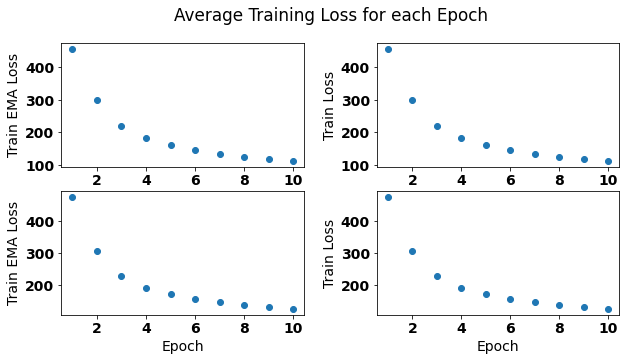

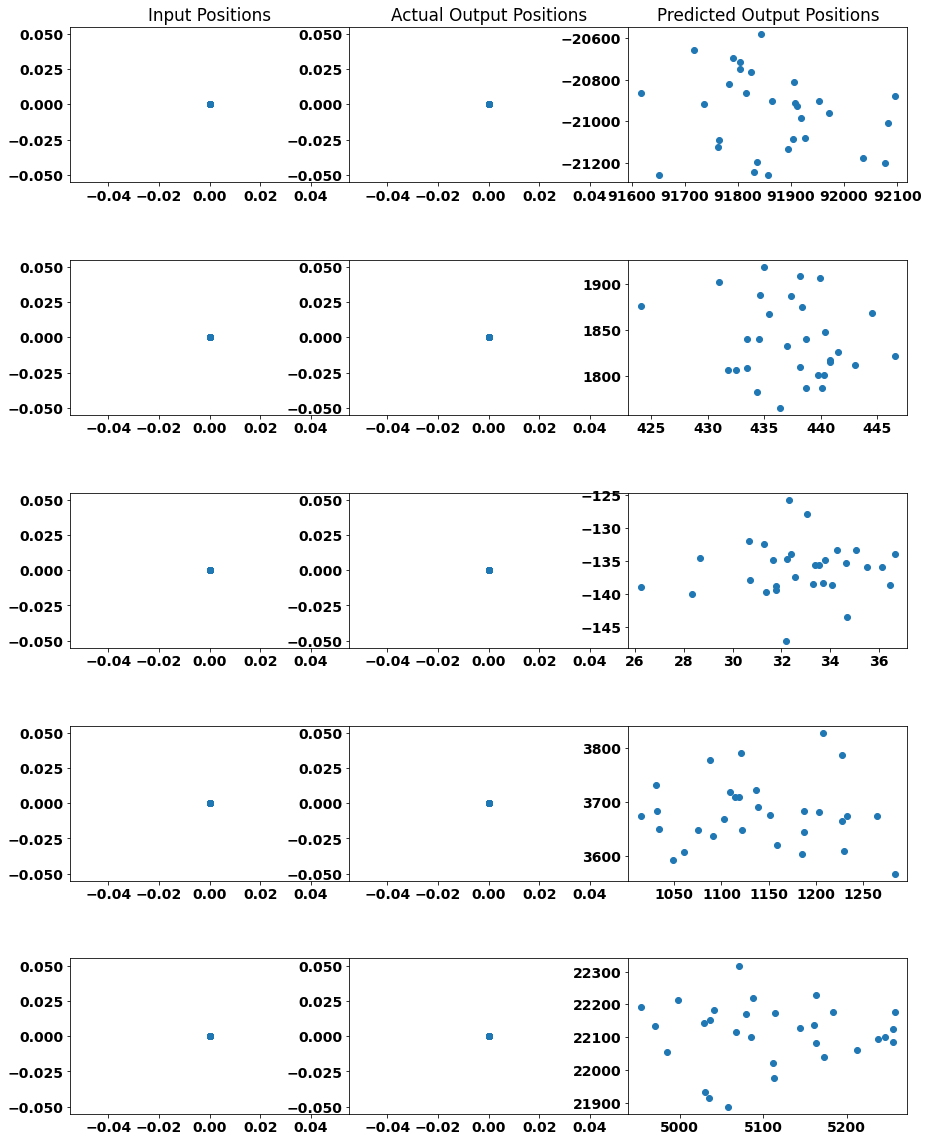

In [7]:
num_epochs=10
ema_weight=0.75
batch_size=128
dropout=0.25

model_str='simple-linear-ema75-epoch10-batchsz128-dropout25-batchnorm'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.simple_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    normalize=True,
    epoch_loss=True,
    save_model_path=model_fp
)

Epoch: 1, Train Loss: 350.3506164550781, Train EMA Loss: 328.1387634277344 Test Loss: 353.66925048828125, Test EMA Loss: 353.4626159667969


Epoch: 2, Train Loss: 245.32757568359375, Train EMA Loss: 231.93650817871094 Test Loss: 242.31057739257812, Test EMA Loss: 242.54588317871094


Epoch: 3, Train Loss: 194.73104858398438, Train EMA Loss: 197.5272674560547 Test Loss: 190.86611938476562, Test EMA Loss: 191.88766479492188


Epoch: 4, Train Loss: 175.1658172607422, Train EMA Loss: 193.98716735839844 Test Loss: 165.5871124267578, Test EMA Loss: 166.05882263183594


Epoch: 5, Train Loss: 152.75611877441406, Train EMA Loss: 147.4599609375 Test Loss: 148.7734375, Test EMA Loss: 148.92578125


Epoch: 6, Train Loss: 144.67779541015625, Train EMA Loss: 166.13223266601562 Test Loss: 135.8142547607422, Test EMA Loss: 135.2223358154297


Epoch: 7, Train Loss: 129.80593872070312, Train EMA Loss: 125.02635955810547 Test Loss: 125.81927490234375, Test EMA Loss: 125.5746078491211


Epoch: 8, Train Loss: 116.71705627441406, Train EMA Loss: 117.97820281982422 Test Loss: 117.63602447509766, Test EMA Loss: 117.27745819091797


Epoch: 9, Train Loss: 117.17204284667969, Train EMA Loss: 121.74919891357422 Test Loss: 110.52637481689453, Test EMA Loss: 110.28286743164062


Epoch: 10, Train Loss: 111.08171844482422, Train EMA Loss: 107.90767669677734 Test Loss: 105.01807403564453, Test EMA Loss: 104.85299682617188


Epoch: 11, Train Loss: 106.57930755615234, Train EMA Loss: 119.82393646240234 Test Loss: 100.42424011230469, Test EMA Loss: 100.09468078613281


Epoch: 12, Train Loss: 98.75691986083984, Train EMA Loss: 101.0692367553711 Test Loss: 95.86402130126953, Test EMA Loss: 96.02495574951172


Epoch: 13, Train Loss: 100.47173309326172, Train EMA Loss: 109.42733001708984 Test Loss: 92.74217224121094, Test EMA Loss: 92.87763214111328


Epoch: 14, Train Loss: 93.85691833496094, Train EMA Loss: 91.72211456298828 Test Loss: 89.43965148925781, Test EMA Loss: 89.09442901611328


Epoch: 15, Train Loss: 91.93682098388672, Train EMA Loss: 92.68051147460938 Test Loss: 86.88815307617188, Test EMA Loss: 87.88768005371094


Epoch: 16, Train Loss: 92.14553833007812, Train EMA Loss: 109.932373046875 Test Loss: 84.16472625732422, Test EMA Loss: 84.60369873046875


Epoch: 17, Train Loss: 87.78255462646484, Train EMA Loss: 87.59249877929688 Test Loss: 81.91357421875, Test EMA Loss: 81.27910614013672


Epoch: 18, Train Loss: 86.0237045288086, Train EMA Loss: 84.5009536743164 Test Loss: 79.79948425292969, Test EMA Loss: 79.56098175048828


Epoch: 19, Train Loss: 86.71817016601562, Train EMA Loss: 89.50396728515625 Test Loss: 77.72848510742188, Test EMA Loss: 77.4660415649414


Epoch: 20, Train Loss: 82.91744995117188, Train EMA Loss: 85.79234313964844 Test Loss: 77.08491516113281, Test EMA Loss: 78.984619140625


Completed training in 1 hours,4 minutes, 56 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      552.532715  552.532715     572.667175  572.667175
1        1.0        1.0      564.896301  601.987000     572.614014  572.454651
2        1.0        2.0      569.851440  584.716675     572.521362  572.243469
3        1.0        3.0      573.669922  585.125305     572.399902  572.035522
4        1.0        4.0      578.060181  591.231079     572.255798  571.823486
...      ...        ...             ...         ...            ...         ...
31715   20.0     1581.0       78.571716   74.063965      76.380722   76.043480
31716   20.0     1582.0       79.639069   82.841141      76.460846   76.701218
31717   20.0     1583.0       78.892517   76.652870      76.666519   77.283531
31718   20.0     1584.0       81.959152   91.159073      76.451683   75.807175
31719   20.0     1585.0       82.917450   85.792343      77.084915   78.984619

[31720 rows x 6 columns]

simple_model(
  (linear): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=4560, out_features=7200, bias=True)
  )
)

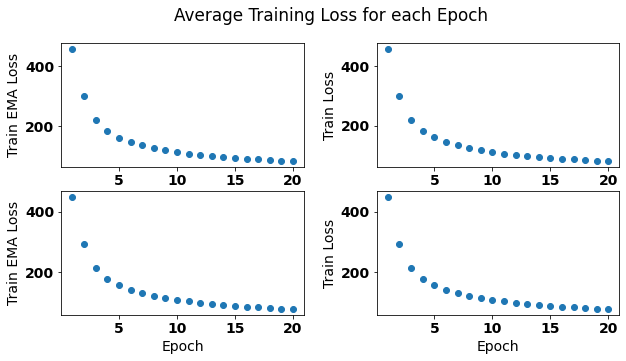

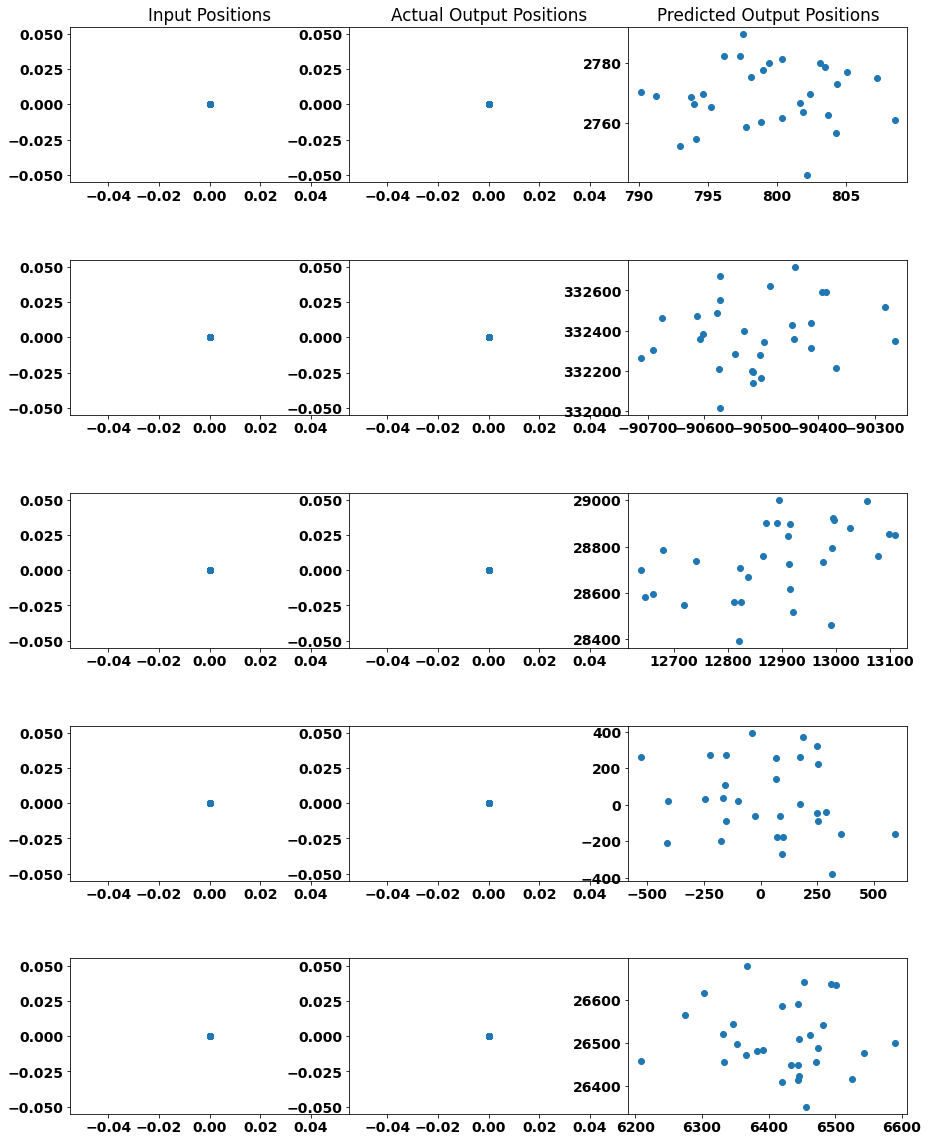

In [25]:
num_epochs=20
ema_weight=0.75
batch_size=128
dropout=0.25

model_str='simple-linear-ema75-epoch20-batchsz128-dropout25-batchnorm'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.simple_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    normalize=True,
    epoch_loss=True,
    save_model_path=model_fp
)

## Multi Layer Linear Model

Epoch: 1, Train Loss: 404.2115783691406, Train EMA Loss: 401.0372009277344 Test Loss: 387.092041015625, Test EMA Loss: 387.0899963378906
Completed training in 0 hours,3 minutes, 25 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      587.519897  587.519897     557.916260  557.916260
1       1.0        1.0      585.768616  580.514709     557.819519  557.529297
2       1.0        2.0      588.709045  597.530212     557.611389  556.987122
3       1.0        3.0      582.135193  562.413574     557.335327  556.507141
4       1.0        4.0      587.802856  604.805786     557.019958  556.073914
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      394.229889  387.531586     387.095184  387.093414
1582    1.0     1582.0      399.599060  415.706543     387.094543  387.092590
1583    1.0     1583.0      397.649475  391.800720     387.093597  387.090698
1584    1.0     1584.0      405.269684  428.130249     387.092743  387.090240
1585    1.0     1585.0      404.211578  401.037201     387.092041  387.089996

[1586 rows x 6 columns]

multilayer_model2(
  (linear): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=4560, out_features=2048, bias=True)
    (2): ReLU()
    (3): Linear(in_features=2048, out_features=4096, bias=True)
    (4): ReLU()
    (5): Linear(in_features=4096, out_features=2048, bias=True)
    (6): Sigmoid()
    (7): Linear(in_features=2048, out_features=7200, bias=True)
  )
)

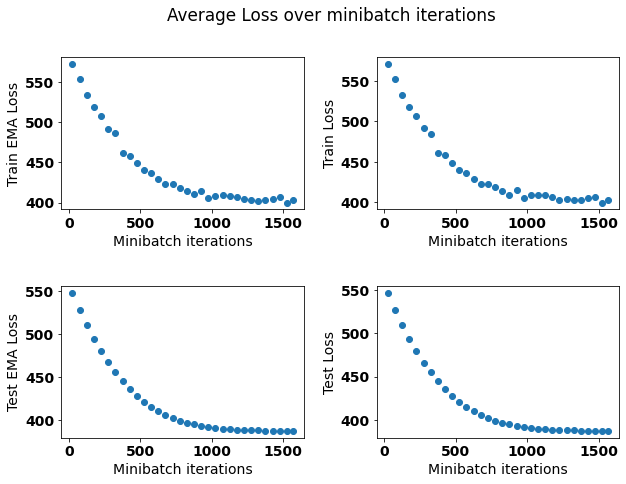

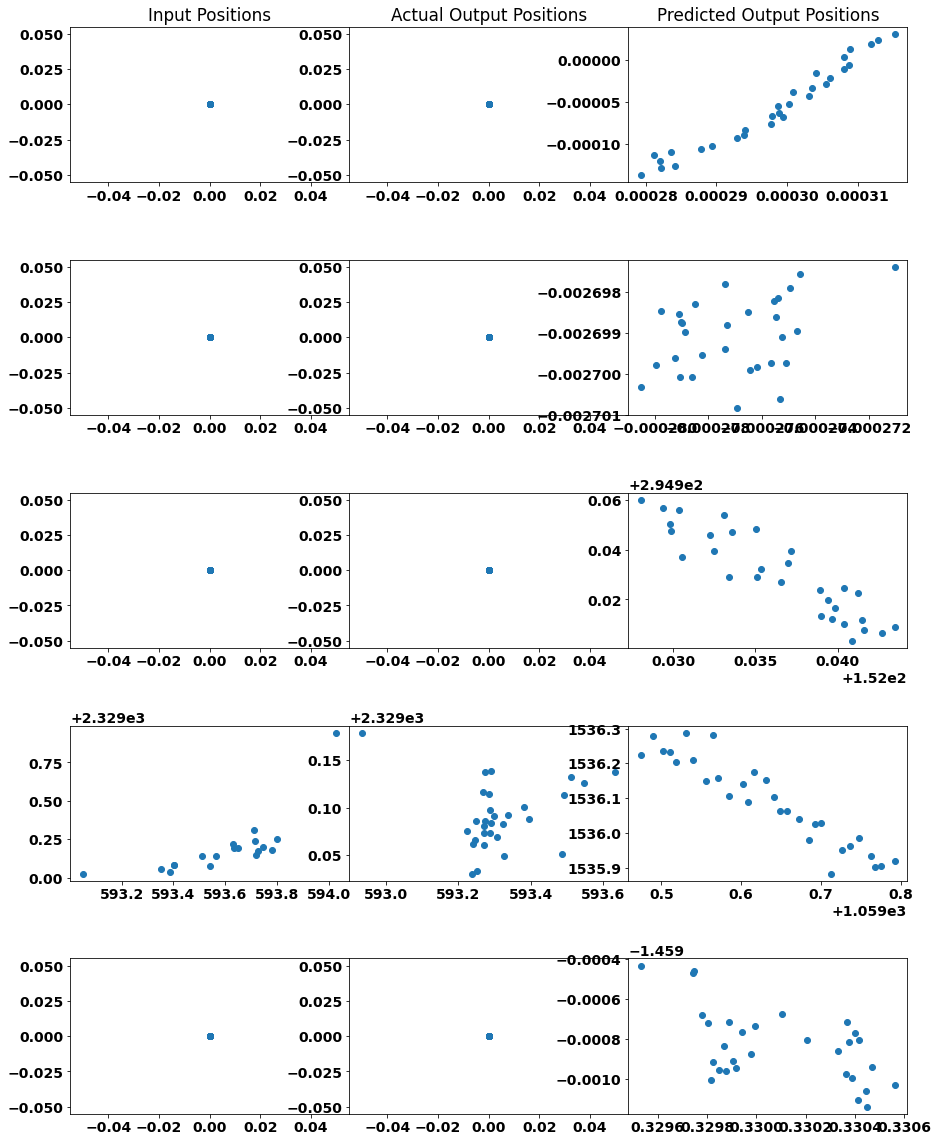

In [31]:
num_epochs=1
ema_weight=0.75
batch_size=128
dropout=0.1

model_str='multilayer-linear-ema75-epoch01-batchsz128-dropout10-batchnorm'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.multilayer_model2,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    normalize=True,
    save_model_path=model_fp
)

Epoch: 1, Train Loss: 77.57215881347656, Train EMA Loss: 79.40190124511719 Test Loss: 81.825439453125, Test EMA Loss: 81.2049331665039
Completed training in 0 hours,3 minutes, 20 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      616.550659  616.550659     577.167480  577.167480
1       1.0        1.0      609.174927  587.047668     577.095764  576.880615
2       1.0        2.0      602.362183  581.924072     576.922119  576.401184
3       1.0        3.0      591.459045  558.749634     576.613708  575.688538
4       1.0        4.0      591.843018  592.994812     576.144714  574.737793
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0       77.927917   75.734512      81.676643   82.779572
1582    1.0     1582.0       78.013107   78.268684      82.011032   83.014175
1583    1.0     1583.0       76.951408   73.766304      82.193665   82.741547
1584    1.0     1584.0       76.962242   76.994751      82.032272   81.548096
1585    1.0     1585.0       77.572159   79.401901      81.825439   81.204933

[1586 rows x 6 columns]

multilayer_model(
  (linear): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=4560, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=7200, bias=True)
  )
)

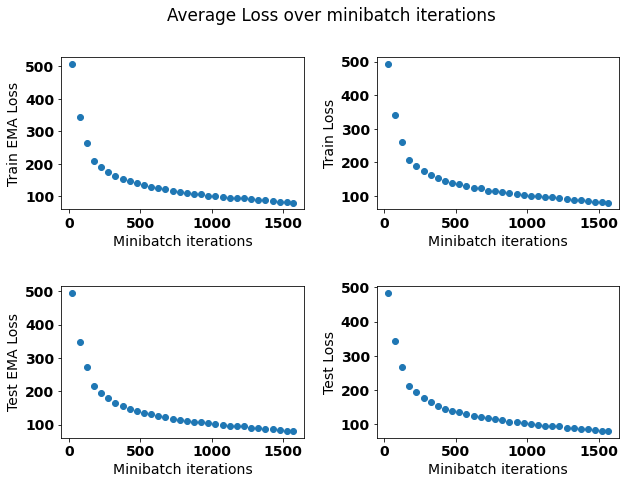

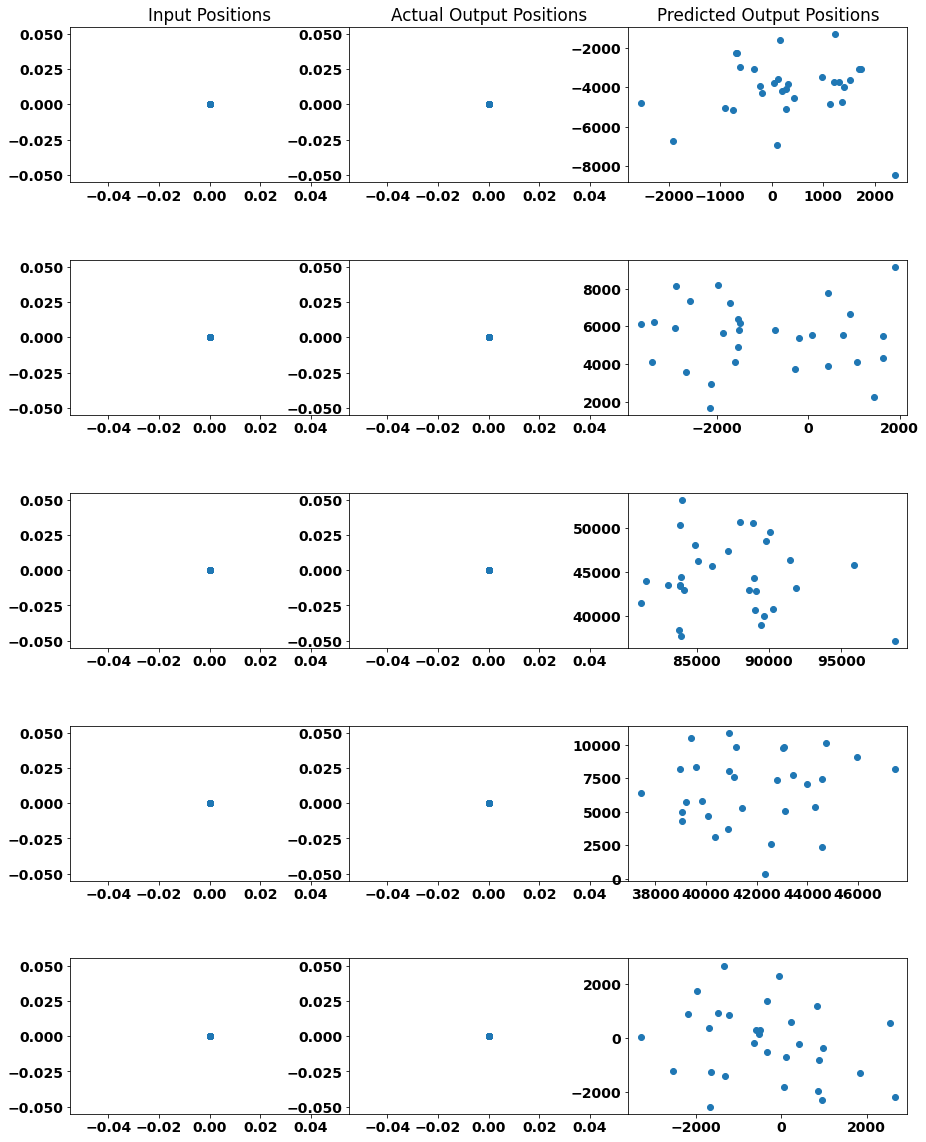

In [33]:
num_epochs=1
ema_weight=0.75
batch_size=128
dropout=0.1

model_str='multilayer-linear1-ema75-epoch01-batchsz128-dropout10-batchnorm'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.multilayer_model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    normalize=True,
    save_model_path=model_fp
)

In [ ]:
num_epochs=10
ema_weight=0.75
batch_size=128
dropout=0.1

model_str='multilayer-linear-ema75-epoch10-batchsz128-dropout10-batchnorm'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.multilayer_model2,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    normalize=True,
    save_model_path=model_fp
)

In [ ]:
num_epochs=20
ema_weight=0.75
batch_size=128
dropout=0.1

model_str='multilayer-linear-ema75-epoch20-batchsz128-dropout10-batchnorm'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.multilayer_model2,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    normalize=True,
    save_model_path=model_fp
)

In [ ]:
num_epochs=1
ema_weight=0.75
batch_size=128
dropout=0.5

model_str='multilayer-linear-ema75-epoch01-batchsz128-dropout50-batchnorm'
loss_data_fp=os.path.join(out_path, model_str+'.csv')
fig_fp=os.path.join(fig_path, model_str+'.pdf')
model_fp=os.path.join(model_path, model_str+'.pth')

run_model.train_evaluate(
    model=linear.multilayer_model2,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=num_epochs,
    batch_size=batch_size,
    train_func=linear.train,
    ema_weight=ema_weight,
    dropout=dropout,
    normalize=True,
    save_model_path=model_fp
)

In [ ]:
models=[linear.simple_model, linear.multilayer_model, linear.multilayer_model2]
batch_szs=[128,64,32,16]
epochs=[1,5,10,20,30]
dropout_list=[0.5,0.75,0.25]

model_dict={}

idx=1

for epoch in epochs:
    for batch_sz in batch_szs:
        for dropout in dropout_list:
            for model in models:
                model_str='model-test-%i'%idx
                
                print('model_name: ', model_str)
                print('\tbatch size: ',batch_sz)
                print('\tepochs: ', epoch)
                print('\tdropout: ', dropout)
                
                model_dict[model_str]={
                    'batch-size': batch_sz,
                    'epochs':epoch,
                    'dropout':dropout
                }                
                
                loss_data_fp=os.path.join(out_path, model_str+'.csv')
                fig_fp=os.path.join(fig_path, model_str+'.pdf')
                model_fp=os.path.join(model_path, model_str+'.pth')
                run_model.train_evaluate(
                    model=model,
                    train_path=train_path,
                    test_path=test_path,
                    loss_data_fp=loss_data_fp,
                    fig_fp=fig_fp,
                    epochs=epoch,
                    batch_size=batch_size,
                    train_func=linear.train,
                    ema_weight=ema_weight,
                    dropout=dropout,
                    normalize=True,
                    save_model_path=model_fp
                )
                
                idx+=1

model_name:  model-test-1
	batch size:  128
	epochs:  1
	dropout:  0.5


Epoch: 1, Train Loss: 370.488037109375, Train EMA Loss: 370.03948974609375 Test Loss: 354.84381103515625, Test EMA Loss: 355.77398681640625
Completed training in 0 hours,3 minutes, 15 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      577.615906  577.615906     581.422180  581.422180
1       1.0        1.0      582.502686  597.163086     581.364258  581.190308
2       1.0        2.0      577.510620  562.534485     581.264893  580.966675
3       1.0        3.0      570.590210  549.828979     581.131409  580.730957
4       1.0        4.0      572.598755  578.624512     580.976685  580.512512
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      367.871765  355.942810     354.430359  354.990295
1582    1.0     1582.0      369.574799  374.683929     354.353119  354.121429
1583    1.0     1583.0      370.890594  374.837982     354.428314  354.653900
1584    1.0     1584.0      370.637543  369.878387     354.533752  354.850098
1585    1.0     1585.0      370.488037  370.039490     354.843811  355.773987

[1586 rows x 6 columns]

model_name:  model-test-2
	batch size:  128
	epochs:  1
	dropout:  0.5


Epoch: 1, Train Loss: 90.74717712402344, Train EMA Loss: 96.90467071533203 Test Loss: 84.21572875976562, Test EMA Loss: 84.07645416259766
Completed training in 0 hours,3 minutes, 15 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      604.951050  604.951050     560.184204  560.184204
1       1.0        1.0      600.578674  587.461487     560.117676  559.917969
2       1.0        2.0      603.023254  610.356934     559.949524  559.445068
3       1.0        3.0      598.281860  584.057678     559.657837  558.782776
4       1.0        4.0      592.301392  574.359863     559.213684  557.881287
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0       91.136124   92.623001      84.761810   82.682854
1582    1.0     1582.0       90.377777   88.102737      84.888763   85.269615
1583    1.0     1583.0       89.375275   86.367752      84.781136   84.458252
1584    1.0     1584.0       88.694687   86.652908      84.262154   82.705208
1585    1.0     1585.0       90.747177   96.904671      84.215729   84.076454

[1586 rows x 6 columns]

model_name:  model-test-3
	batch size:  128
	epochs:  1
	dropout:  0.5


Epoch: 1, Train Loss: 407.542724609375, Train EMA Loss: 438.46331787109375 Test Loss: 419.05950927734375, Test EMA Loss: 419.0690612792969
Completed training in 0 hours,3 minutes, 15 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      599.931519  599.931519     592.413818  592.413818
1       1.0        1.0      595.464905  582.065125     592.317627  592.028931
2       1.0        2.0      583.976562  549.511414     592.108887  591.482605
3       1.0        3.0      579.897217  567.659302     591.825500  590.975281
4       1.0        4.0      582.552063  590.516663     591.501831  590.530640
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      401.755554  389.770721     419.040771  419.056091
1582    1.0     1582.0      396.741791  381.700562     419.045563  419.059906
1583    1.0     1583.0      390.215668  370.637360     419.051208  419.068176
1584    1.0     1584.0      397.235870  418.296478     419.056335  419.071777
1585    1.0     1585.0      407.542725  438.463318     419.059509  419.069061

[1586 rows x 6 columns]

model_name:  model-test-4
	batch size:  128
	epochs:  1
	dropout:  0.75


Epoch: 1, Train Loss: 375.9723205566406, Train EMA Loss: 383.4439392089844 Test Loss: 348.54803466796875, Test EMA Loss: 348.3152160644531
Completed training in 0 hours,3 minutes, 14 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      632.639954  632.639954     536.587769  536.587769
1       1.0        1.0      615.193054  562.852295     536.537415  536.386353
2       1.0        2.0      607.137207  582.969604     536.457764  536.218689
3       1.0        3.0      598.580444  572.910156     536.353760  536.041870
4       1.0        4.0      605.895630  627.841064     536.232727  535.869690
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      368.026520  359.218658     349.137146  348.037598
1582    1.0     1582.0      369.273560  373.014587     348.706238  347.413605
1583    1.0     1583.0      382.245483  421.161194     348.475952  347.785217
1584    1.0     1584.0      373.481750  347.190552     348.625641  349.074677
1585    1.0     1585.0      375.972321  383.443939     348.548035  348.315216

[1586 rows x 6 columns]

model_name:  model-test-5
	batch size:  128
	epochs:  1
	dropout:  0.75


Epoch: 1, Train Loss: 116.36224365234375, Train EMA Loss: 136.7808380126953 Test Loss: 108.21955871582031, Test EMA Loss: 109.8406982421875
Completed training in 0 hours,3 minutes, 19 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      564.750305  564.750305     539.931091  539.931091
1       1.0        1.0      576.028992  609.864990     539.859985  539.646790
2       1.0        2.0      583.195862  604.696472     539.679993  539.139954
3       1.0        3.0      575.729675  553.330994     539.367310  538.429077
4       1.0        4.0      574.586731  571.157898     538.877686  537.408691
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      108.299385  108.353149     108.817902  111.305069
1582    1.0     1582.0      110.475128  117.002357     108.159546  106.184471
1583    1.0     1583.0      110.067841  108.845985     107.578369  105.834839
1584    1.0     1584.0      109.556046  108.020653     107.679184  107.981636
1585    1.0     1585.0      116.362244  136.780838     108.219559  109.840698

[1586 rows x 6 columns]

model_name:  model-test-6
	batch size:  128
	epochs:  1
	dropout:  0.75


Epoch: 1, Train Loss: 382.3305969238281, Train EMA Loss: 340.7174987792969 Test Loss: 377.9179382324219, Test EMA Loss: 377.9136962890625


Completed training in 0 hours,3 minutes, 15 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      580.887512  580.887512     555.589417  555.589417
1       1.0        1.0      578.437500  571.087524     555.496948  555.219543
2       1.0        2.0      577.282593  573.817749     555.295105  554.689514
3       1.0        3.0      573.963806  564.007385     555.018188  554.187378
4       1.0        4.0      566.784180  545.245361     554.700317  553.746826
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      390.425781  389.943909     377.920837  377.922180
1582    1.0     1582.0      389.213593  385.577057     377.920746  377.920532
1583    1.0     1583.0      394.519257  410.436249     377.920166  377.918518
1584    1.0     1584.0      396.201630  401.248810     377.919373  377.916962
1585    1.0     1585.0      382.330597  340.717499     377.917938  377.913696

[1586 rows x 6 columns]

model_name:  model-test-7
	batch size:  128
	epochs:  1
	dropout:  0.25


Epoch: 1, Train Loss: 357.34759521484375, Train EMA Loss: 341.05474853515625 Test Loss: 345.24322509765625, Test EMA Loss: 345.0409240722656
Completed training in 0 hours,3 minutes, 15 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      609.828430  609.828430     572.141174  572.141174
1       1.0        1.0      602.731812  581.441772     572.082275  571.905640
2       1.0        2.0      593.799622  567.002991     571.978271  571.666260
3       1.0        3.0      589.777954  577.712891     571.839050  571.421448
4       1.0        4.0      591.493164  596.638733     571.675598  571.185303
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      361.780212  360.601807     345.495819  345.207794
1582    1.0     1582.0      363.471497  368.545349     345.483643  345.447205
1583    1.0     1583.0      363.277740  362.696442     345.379578  345.067322
1584    1.0     1584.0      362.778564  361.281067     345.310669  345.104004
1585    1.0     1585.0      357.347595  341.054749     345.243225  345.040924

[1586 rows x 6 columns]

model_name:  model-test-8
	batch size:  128
	epochs:  1
	dropout:  0.25


Epoch: 1, Train Loss: 83.22407531738281, Train EMA Loss: 95.72478485107422 Test Loss: 84.80646514892578, Test EMA Loss: 84.75271606445312
Completed training in 0 hours,3 minutes, 16 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      592.107117  592.107117     565.962402  565.962402
1       1.0        1.0      592.128540  592.192749     565.888306  565.665894
2       1.0        2.0      588.148315  576.207520     565.708801  565.170227
3       1.0        3.0      579.928406  555.268738     565.386841  564.420959
4       1.0        4.0      575.460327  562.056274     564.884521  563.377686
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0       78.093575   76.049538      84.128632   82.552475
1582    1.0     1582.0       77.864426   77.176979      84.393837   85.189461
1583    1.0     1583.0       78.248367   79.400177      84.467529   84.688599
1584    1.0     1584.0       79.057167   81.483566      84.824379   85.894920
1585    1.0     1585.0       83.224075   95.724785      84.806465   84.752716

[1586 rows x 6 columns]

model_name:  model-test-9
	batch size:  128
	epochs:  1
	dropout:  0.25


Epoch: 1, Train Loss: 401.7666320800781, Train EMA Loss: 420.912109375 Test Loss: 406.4337463378906, Test EMA Loss: 406.4219970703125
Completed training in 0 hours,3 minutes, 16 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      612.786438  612.786438     593.732361  593.732361
1       1.0        1.0      604.434692  579.379395     593.630859  593.326416
2       1.0        2.0      602.972534  598.585999     593.415771  592.770386
3       1.0        3.0      590.415466  552.744263     593.127563  592.262817
4       1.0        4.0      585.325439  570.055298     592.798035  591.809387
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      392.212860  375.723907     406.446838  406.440369
1582    1.0     1582.0      396.786896  410.509033     406.444183  406.436157
1583    1.0     1583.0      393.742340  384.608643     406.440948  406.431274
1584    1.0     1584.0      395.384796  400.312103     406.437653  406.427734
1585    1.0     1585.0      401.766632  420.912109     406.433746  406.421997

[1586 rows x 6 columns]

model_name:  model-test-10
	batch size:  64
	epochs:  1
	dropout:  0.5


Epoch: 1, Train Loss: 367.2771911621094, Train EMA Loss: 377.863525390625 Test Loss: 371.50555419921875, Test EMA Loss: 370.70428466796875
Completed training in 0 hours,3 minutes, 11 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      584.938599  584.938599     597.600830  597.600830
1       1.0        1.0      594.084351  621.521545     597.549438  597.395142
2       1.0        2.0      591.659241  584.383911     597.459778  597.190857
3       1.0        3.0      586.852783  572.433411     597.340088  596.981018
4       1.0        4.0      585.669434  582.119324     597.200684  596.782410
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      360.933960  348.763031     371.205597  369.524994
1582    1.0     1582.0      361.520905  363.281738     371.635864  372.926697
1583    1.0     1583.0      363.968262  371.310364     371.572083  371.380768
1584    1.0     1584.0      363.748413  363.088806     371.772644  372.374298
1585    1.0     1585.0      367.277191  377.863525     371.505554  370.704285

[1586 rows x 6 columns]

model_name:  model-test-11
	batch size:  64
	epochs:  1
	dropout:  0.5


Epoch: 1, Train Loss: 90.89932250976562, Train EMA Loss: 94.22303771972656 Test Loss: 93.45738983154297, Test EMA Loss: 90.7314682006836
Completed training in 0 hours,3 minutes, 12 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      585.562073  585.562073     610.656372  610.656372
1       1.0        1.0      592.110535  611.755798     610.578369  610.344360
2       1.0        2.0      587.998657  575.663025     610.386658  609.811462
3       1.0        3.0      580.090820  556.367310     610.045959  609.023865
4       1.0        4.0      583.756775  594.754700     609.524780  607.961304
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0       87.678139   87.355927      94.960152   93.295799
1582    1.0     1582.0       89.105637   93.388123      94.873306   94.612755
1583    1.0     1583.0       91.115555   97.145325      94.792145   94.548637
1584    1.0     1584.0       89.791412   85.818977      94.366028   93.087669
1585    1.0     1585.0       90.899323   94.223038      93.457390   90.731468

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-12
	batch size:  64
	epochs:  1
	dropout:  0.5


Epoch: 1, Train Loss: 398.7200927734375, Train EMA Loss: 396.05865478515625 Test Loss: 404.34619140625, Test EMA Loss: 404.3677062988281
Completed training in 0 hours,3 minutes, 13 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      576.030884  576.030884     588.640442  588.640442
1       1.0        1.0      572.347107  561.295776     588.541626  588.245239
2       1.0        2.0      569.074829  559.258179     588.332764  587.706116
3       1.0        3.0      575.468506  594.649414     588.048828  587.197083
4       1.0        4.0      573.579529  567.912537     587.724243  586.750488
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      410.869934  416.817322     404.321991  404.334595
1582    1.0     1582.0      402.852203  378.798981     404.326813  404.341339
1583    1.0     1583.0      397.075806  379.746613     404.332642  404.350128
1584    1.0     1584.0      399.607269  407.201660     404.339050  404.358337
1585    1.0     1585.0      398.720093  396.058655     404.346191  404.367706

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-13
	batch size:  64
	epochs:  1
	dropout:  0.75


Epoch: 1, Train Loss: 370.6118469238281, Train EMA Loss: 370.3424377441406 Test Loss: 370.8740234375, Test EMA Loss: 372.57525634765625
Completed training in 0 hours,3 minutes, 19 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      592.879456  592.879456     568.554199  568.554199
1       1.0        1.0      588.654724  575.980469     568.510132  568.377869
2       1.0        2.0      581.434021  559.771973     568.426575  568.175903
3       1.0        3.0      586.666565  602.364319     568.319336  567.997681
4       1.0        4.0      586.075500  584.302307     568.192505  567.812012
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      365.036041  364.623749     371.116821  368.879028
1582    1.0     1582.0      371.604431  391.309570     370.970215  370.530334
1583    1.0     1583.0      369.049683  361.385468     370.849609  370.487823
1584    1.0     1584.0      370.701660  375.657532     370.306946  368.678894
1585    1.0     1585.0      370.611847  370.342438     370.874023  372.575256

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-14
	batch size:  64
	epochs:  1
	dropout:  0.75


Epoch: 1, Train Loss: 108.03627014160156, Train EMA Loss: 104.83918762207031 Test Loss: 119.89630126953125, Test EMA Loss: 116.948974609375
Completed training in 0 hours,3 minutes, 19 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      563.056824  563.056824     594.545715  594.545715
1       1.0        1.0      557.288086  539.982056     594.467651  594.233337
2       1.0        2.0      561.931213  575.860596     594.279846  593.716370
3       1.0        3.0      558.403687  547.820984     593.962769  593.011475
4       1.0        4.0      556.993835  552.764221     593.439087  591.868042
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      109.083725  109.508545     120.305939  118.004868
1582    1.0     1582.0      109.079079  109.065163     120.029755  119.201202
1583    1.0     1583.0      107.462242  102.611732     120.200836  120.714073
1584    1.0     1584.0      109.101967  114.021149     120.878746  122.912483
1585    1.0     1585.0      108.036270  104.839188     119.896301  116.948975

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-15
	batch size:  64
	epochs:  1
	dropout:  0.75


Epoch: 1, Train Loss: 397.0877380371094, Train EMA Loss: 374.2142333984375 Test Loss: 408.1666259765625, Test EMA Loss: 408.15447998046875
Completed training in 0 hours,3 minutes, 18 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      587.931091  587.931091     595.711121  595.711121
1       1.0        1.0      589.263306  593.259888     595.621582  595.352905
2       1.0        2.0      582.546692  562.396912     595.424316  594.832520
3       1.0        3.0      578.403259  565.972900     595.152954  594.338867
4       1.0        4.0      582.662964  595.442017     594.838135  593.893799
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      409.520691  426.047943     408.181152  408.174347
1582    1.0     1582.0      406.676880  398.145477     408.178223  408.169464
1583    1.0     1583.0      408.761017  415.013397     408.174530  408.163483
1584    1.0     1584.0      404.712250  392.565948     408.170654  408.159119
1585    1.0     1585.0      397.087738  374.214233     408.166626  408.154480

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-16
	batch size:  64
	epochs:  1
	dropout:  0.25


Epoch: 1, Train Loss: 357.4705810546875, Train EMA Loss: 357.80230712890625 Test Loss: 354.5446472167969, Test EMA Loss: 353.931884765625
Completed training in 0 hours,3 minutes, 19 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      587.131409  587.131409     561.081909  561.081909
1       1.0        1.0      583.464111  572.462219     561.027344  560.863586
2       1.0        2.0      573.125427  542.109375     560.929688  560.636658
3       1.0        3.0      578.612305  595.072998     560.804138  560.427429
4       1.0        4.0      585.937500  607.913086     560.654358  560.205017
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      362.252411  366.828522     355.051941  354.827332
1582    1.0     1582.0      361.388275  358.795868     355.082458  355.174011
1583    1.0     1583.0      351.618164  322.307800     354.929626  354.471191
1584    1.0     1584.0      357.360046  374.585663     354.748901  354.206787
1585    1.0     1585.0      357.470581  357.802307     354.544647  353.931885

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-17
	batch size:  64
	epochs:  1
	dropout:  0.25


Epoch: 1, Train Loss: 83.03484344482422, Train EMA Loss: 78.64005279541016 Test Loss: 83.12004089355469, Test EMA Loss: 81.36094665527344
Completed training in 0 hours,3 minutes, 18 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      579.060547  579.060547     601.618835  601.618835
1       1.0        1.0      582.059265  591.055420     601.543518  601.317627
2       1.0        2.0      586.014282  597.879272     601.361877  600.816895
3       1.0        3.0      600.577515  644.267273     601.035156  600.054932
4       1.0        4.0      587.919922  549.947021     600.529541  599.012634
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0       80.342712   78.556358      83.415428   85.918510
1582    1.0     1582.0       82.623238   89.464813      84.167877   86.425232
1583    1.0     1583.0       84.979767   92.049339      84.339928   84.856071
1584    1.0     1584.0       84.499779   83.059814      83.706398   81.805817
1585    1.0     1585.0       83.034843   78.640053      83.120041   81.360947

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-18
	batch size:  64
	epochs:  1
	dropout:  0.25


Epoch: 1, Train Loss: 406.4898376464844, Train EMA Loss: 410.3476257324219 Test Loss: 385.5569152832031, Test EMA Loss: 385.5274353027344
Completed training in 0 hours,3 minutes, 19 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      551.524231  551.524231     568.860413  568.860413
1       1.0        1.0      561.359314  590.864502     568.765137  568.479248
2       1.0        2.0      567.978333  587.835388     568.563538  567.958740
3       1.0        3.0      567.111450  564.510620     568.292236  567.478394
4       1.0        4.0      570.317871  579.937012     567.982971  567.055237
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      400.025391  402.973846     385.597809  385.568237
1582    1.0     1582.0      400.969971  403.803680     385.587402  385.556183
1583    1.0     1583.0      401.983826  405.025330     385.576965  385.545715
1584    1.0     1584.0      405.203888  414.864166     385.566742  385.536041
1585    1.0     1585.0      406.489838  410.347626     385.556915  385.527435

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-19
	batch size:  32
	epochs:  1
	dropout:  0.5


Epoch: 1, Train Loss: 360.6205749511719, Train EMA Loss: 359.5143127441406 Test Loss: 367.0334167480469, Test EMA Loss: 367.9420471191406
Completed training in 0 hours,3 minutes, 17 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      579.530579  579.530579     567.312988  567.312988
1       1.0        1.0      573.921753  557.095093     567.263794  567.116089
2       1.0        2.0      569.454651  556.053345     567.177185  566.917297
3       1.0        3.0      581.405884  617.259521     567.061035  566.712585
4       1.0        4.0      581.014404  579.840027     566.927063  566.525146
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      361.402740  343.753082     367.461090  367.486572
1582    1.0     1582.0      364.137299  372.340912     367.131348  366.142151
1583    1.0     1583.0      356.385132  333.128693     366.869110  366.082428
1584    1.0     1584.0      360.989319  374.801941     366.730530  366.314819
1585    1.0     1585.0      360.620575  359.514313     367.033417  367.942047

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-20
	batch size:  32
	epochs:  1
	dropout:  0.5


Epoch: 1, Train Loss: 88.83038330078125, Train EMA Loss: 89.35138702392578 Test Loss: 88.99673461914062, Test EMA Loss: 90.90739440917969
Completed training in 0 hours,3 minutes, 14 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      605.837219  605.837219     573.307739  573.307739
1       1.0        1.0      611.165039  627.148438     573.238525  573.030945
2       1.0        2.0      607.064331  594.762085     573.062805  572.535583
3       1.0        3.0      598.210632  571.649475     572.750366  571.813110
4       1.0        4.0      593.076477  577.674011     572.270569  570.831238
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0       87.311523   85.481384      89.289886   87.306931
1582    1.0     1582.0       89.122894   94.556992      89.526672   90.237022
1583    1.0     1583.0       88.348953   86.027115      89.027924   87.531685
1584    1.0     1584.0       88.656715   89.579987      88.359848   86.355621
1585    1.0     1585.0       88.830383   89.351387      88.996735   90.907394

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-21
	batch size:  32
	epochs:  1
	dropout:  0.5


Epoch: 1, Train Loss: 410.0745849609375, Train EMA Loss: 429.50146484375 Test Loss: 369.8514404296875, Test EMA Loss: 369.85589599609375
Completed training in 0 hours,3 minutes, 16 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      586.165771  586.165771     552.152832  552.152832
1       1.0        1.0      589.015015  597.562683     552.059570  551.779785
2       1.0        2.0      589.575867  591.258484     551.855225  551.242310
3       1.0        3.0      597.151428  619.878113     551.577759  550.745483
4       1.0        4.0      585.170898  549.229309     551.259521  550.304932
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      405.330811  419.428162     369.849121  369.850403
1582    1.0     1582.0      404.745483  402.989563     369.849579  369.850922
1583    1.0     1583.0      399.264099  382.819916     369.849579  369.849579
1584    1.0     1584.0      403.598938  416.603485     369.849915  369.850952
1585    1.0     1585.0      410.074585  429.501465     369.851440  369.855896

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-22
	batch size:  32
	epochs:  1
	dropout:  0.75


Epoch: 1, Train Loss: 370.98663330078125, Train EMA Loss: 364.1850891113281 Test Loss: 379.72491455078125, Test EMA Loss: 380.5044250488281
Completed training in 0 hours,3 minutes, 14 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      622.022095  622.022095     594.682434  594.682434
1       1.0        1.0      619.946045  613.717957     594.635132  594.493103
2       1.0        2.0      610.064575  580.420288     594.547668  594.285339
3       1.0        3.0      605.441650  591.572815     594.432068  594.085144
4       1.0        4.0      599.514099  581.731384     594.296936  593.891602
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      377.558441  382.794067     379.946869  379.898285
1582    1.0     1582.0      376.612793  373.775940     379.755798  379.182556
1583    1.0     1583.0      374.879089  369.677948     379.475647  378.635284
1584    1.0     1584.0      373.253845  368.378235     379.465088  379.433350
1585    1.0     1585.0      370.986633  364.185089     379.724915  380.504425

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-23
	batch size:  32
	epochs:  1
	dropout:  0.75


Epoch: 1, Train Loss: 106.68798065185547, Train EMA Loss: 109.8484115600586 Test Loss: 104.19906616210938, Test EMA Loss: 101.36339569091797
Completed training in 0 hours,3 minutes, 10 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      535.076965  535.076965     577.533997  577.533997
1       1.0        1.0      540.809082  558.005249     577.469727  577.276917
2       1.0        2.0      559.756042  616.596924     577.310242  576.831726
3       1.0        3.0      566.035339  584.873291     577.022766  576.160400
4       1.0        4.0      561.636719  548.440857     576.565186  575.192444
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      106.779976  102.745094     104.238327  103.220329
1582    1.0     1582.0      106.195732  104.443001     103.682068  102.013321
1583    1.0     1583.0      106.123787  105.907959     104.618065  107.426064
1584    1.0     1584.0      105.634499  104.166618     105.144287  106.722954
1585    1.0     1585.0      106.687981  109.848412     104.199066  101.363396

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-24
	batch size:  32
	epochs:  1
	dropout:  0.75


Epoch: 1, Train Loss: 397.98431396484375, Train EMA Loss: 409.846435546875 Test Loss: 377.5638732910156, Test EMA Loss: 377.5657958984375
Completed training in 0 hours,3 minutes, 12 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      583.761475  583.761475     552.502014  552.502014
1       1.0        1.0      581.797852  575.906860     552.413330  552.147156
2       1.0        2.0      572.000610  542.608948     552.221313  551.645386
3       1.0        3.0      569.933960  563.733948     551.957031  551.164307
4       1.0        4.0      568.768738  565.273071     551.651978  550.736877
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      405.309845  423.568848     377.551056  377.565582
1582    1.0     1582.0      407.614471  414.528351     377.556519  377.572845
1583    1.0     1583.0      402.767212  388.225464     377.561035  377.574554
1584    1.0     1584.0      394.030273  367.819489     377.563232  377.569794
1585    1.0     1585.0      397.984314  409.846436     377.563873  377.565796

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-25
	batch size:  32
	epochs:  1
	dropout:  0.25


Epoch: 1, Train Loss: 365.172119140625, Train EMA Loss: 356.538330078125 Test Loss: 379.8537902832031, Test EMA Loss: 379.2489318847656
Completed training in 0 hours,3 minutes, 9 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      596.408264  596.408264     583.837952  583.837952
1       1.0        1.0      594.315674  588.037842     583.790161  583.646790
2       1.0        2.0      596.724304  603.950195     583.707153  583.458191
3       1.0        3.0      587.138428  558.380798     583.597168  583.267212
4       1.0        4.0      588.738586  593.539124     583.469360  583.085876
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      361.065552  375.657410     380.001923  379.799194
1582    1.0     1582.0      363.692596  371.573730     379.996338  379.979614
1583    1.0     1583.0      367.208710  377.757080     379.958191  379.843719
1584    1.0     1584.0      368.050049  370.574097     380.055420  380.347107
1585    1.0     1585.0      365.172119  356.538330     379.853790  379.248932

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-26
	batch size:  32
	epochs:  1
	dropout:  0.25


Epoch: 1, Train Loss: 82.55680084228516, Train EMA Loss: 89.48038482666016 Test Loss: 81.268798828125, Test EMA Loss: 81.25199890136719
Completed training in 0 hours,3 minutes, 9 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      570.470459  570.470459     573.311829  573.311829
1       1.0        1.0      558.520203  522.669373     573.243835  573.039856
2       1.0        2.0      563.810913  579.682983     573.078796  572.583679
3       1.0        3.0      572.222717  597.458191     572.785889  571.907166
4       1.0        4.0      576.064026  587.587891     572.335144  570.982849
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0       81.503204   80.878387      81.786591   81.787560
1582    1.0     1582.0       81.341881   80.857910      81.634056   81.176445
1583    1.0     1583.0       80.294106   77.150787      81.220978   79.981766
1584    1.0     1584.0       80.248940   80.113441      81.274406   81.434700
1585    1.0     1585.0       82.556801   89.480385      81.268799   81.251999

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-27
	batch size:  32
	epochs:  1
	dropout:  0.25


Epoch: 1, Train Loss: 402.05450439453125, Train EMA Loss: 397.5222473144531 Test Loss: 394.07379150390625, Test EMA Loss: 394.05462646484375
Completed training in 0 hours,3 minutes, 10 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      580.093323  580.093323     563.490234  563.490234
1       1.0        1.0      567.683655  530.454651     563.396973  563.117126
2       1.0        2.0      577.371399  606.434509     563.199402  562.606750
3       1.0        3.0      579.907166  587.514404     562.934021  562.138000
4       1.0        4.0      587.355530  609.700623     562.631287  561.723083
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      395.715576  384.242706     394.101715  394.078003
1582    1.0     1582.0      399.551605  411.059692     394.093903  394.070435
1583    1.0     1583.0      402.031189  409.469971     394.086700  394.065094
1584    1.0     1584.0      403.565247  408.167419     394.080139  394.060425
1585    1.0     1585.0      402.054504  397.522247     394.073792  394.054626

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-28
	batch size:  16
	epochs:  1
	dropout:  0.5


Epoch: 1, Train Loss: 370.5757141113281, Train EMA Loss: 392.2169189453125 Test Loss: 358.76806640625, Test EMA Loss: 357.70147705078125
Completed training in 0 hours,3 minutes, 12 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      595.775818  595.775818     578.859619  578.859619
1       1.0        1.0      595.646362  595.258179     578.803528  578.635254
2       1.0        2.0      596.160889  597.704346     578.710571  578.431641
3       1.0        3.0      586.774048  558.613647     578.585449  578.210083
4       1.0        4.0      583.236694  572.624756     578.435303  577.984924
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      370.212433  386.720306     359.230347  359.073792
1582    1.0     1582.0      373.751892  384.370270     358.874573  357.807251
1583    1.0     1583.0      369.779144  357.860931     359.292450  360.546051
1584    1.0     1584.0      363.361969  344.110504     359.123566  358.616943
1585    1.0     1585.0      370.575714  392.216919     358.768066  357.701477

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-29
	batch size:  16
	epochs:  1
	dropout:  0.5


Epoch: 1, Train Loss: 90.68705749511719, Train EMA Loss: 98.97306060791016 Test Loss: 84.47201538085938, Test EMA Loss: 84.06645202636719
Completed training in 0 hours,3 minutes, 8 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      556.580322  556.580322     574.793396  574.793396
1       1.0        1.0      555.490967  552.222839     574.723450  574.513672
2       1.0        2.0      559.154480  570.144958     574.551636  574.036072
3       1.0        3.0      572.273315  611.629761     574.243408  573.318665
4       1.0        4.0      568.473389  557.073547     573.774414  572.367493
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0       90.231857  102.021820      84.526833   84.078850
1582    1.0     1582.0       89.521629   87.390968      84.477371   84.328995
1583    1.0     1583.0       88.991768   87.402199      84.480301   84.489075
1584    1.0     1584.0       87.925056   84.724915      84.607208   84.987938
1585    1.0     1585.0       90.687057   98.973061      84.472015   84.066452

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-30
	batch size:  16
	epochs:  1
	dropout:  0.5


Epoch: 1, Train Loss: 398.5565185546875, Train EMA Loss: 390.23406982421875 Test Loss: 389.57666015625, Test EMA Loss: 389.57562255859375
Completed training in 0 hours,3 minutes, 12 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      603.988159  603.988159     564.418152  564.418152
1       1.0        1.0      596.032532  572.165588     564.325623  564.048157
2       1.0        2.0      590.386902  573.449890     564.121155  563.507874
3       1.0        3.0      592.663086  599.491577     563.843750  563.011353
4       1.0        4.0      591.147339  586.600220     563.526672  562.575378
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      413.410492  428.214142     389.575562  389.575867
1582    1.0     1582.0      410.712158  402.617188     389.575989  389.577332
1583    1.0     1583.0      414.268341  424.936859     389.576599  389.578430
1584    1.0     1584.0      401.330688  362.517639     389.576965  389.578125
1585    1.0     1585.0      398.556519  390.234070     389.576660  389.575623

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-31
	batch size:  16
	epochs:  1
	dropout:  0.75


Epoch: 1, Train Loss: 372.7999572753906, Train EMA Loss: 374.8893127441406 Test Loss: 394.8417053222656, Test EMA Loss: 393.5682067871094
Completed training in 0 hours,3 minutes, 11 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      556.102539  556.102539     616.998718  616.998718
1       1.0        1.0      553.893494  547.266357     616.951111  616.808350
2       1.0        2.0      552.115845  546.782898     616.865051  616.606873
3       1.0        3.0      556.784058  570.788635     616.749939  616.404602
4       1.0        4.0      561.768066  576.720154     616.617310  616.219360
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      373.626556  366.732819     396.490967  396.625366
1582    1.0     1582.0      371.017273  363.189423     395.912292  394.176208
1583    1.0     1583.0      375.380249  388.469208     395.277588  393.373505
1584    1.0     1584.0      372.103516  362.273254     395.266174  395.231903
1585    1.0     1585.0      372.799957  374.889313     394.841705  393.568207

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-32
	batch size:  16
	epochs:  1
	dropout:  0.75


Epoch: 1, Train Loss: 112.96786499023438, Train EMA Loss: 122.63378143310547 Test Loss: 120.26248168945312, Test EMA Loss: 122.08830261230469
Completed training in 0 hours,3 minutes, 8 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      591.214417  591.214417     615.150879  615.150879
1       1.0        1.0      591.981934  594.284363     615.077515  614.857422
2       1.0        2.0      588.269653  577.132690     614.905945  614.391235
3       1.0        3.0      580.936584  558.937378     614.599976  613.682007
4       1.0        4.0      585.905457  600.811951     614.125488  612.702087
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      109.960365  110.454414     121.584328  121.477257
1582    1.0     1582.0      109.325615  107.421364     120.947914  119.038666
1583    1.0     1583.0      109.544548  110.201363     120.596558  119.542465
1584    1.0     1584.0      109.745895  110.349937     119.653870  116.825813
1585    1.0     1585.0      112.967865  122.633781     120.262482  122.088303

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-33
	batch size:  16
	epochs:  1
	dropout:  0.75


Epoch: 1, Train Loss: 416.48187255859375, Train EMA Loss: 415.1674499511719 Test Loss: 393.53460693359375, Test EMA Loss: 393.5220947265625
Completed training in 0 hours,3 minutes, 14 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      547.368530  547.368530     585.475281  585.475281
1       1.0        1.0      550.028687  558.009216     585.385132  585.114624
2       1.0        2.0      553.875488  565.416016     585.189270  584.601685
3       1.0        3.0      560.245544  579.355713     584.919495  584.110168
4       1.0        4.0      565.418335  580.936829     584.609863  583.680847
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      404.429321  394.216858     393.553772  393.537720
1582    1.0     1582.0      409.295715  423.894928     393.548431  393.532349
1583    1.0     1583.0      411.552185  418.321594     393.543396  393.528290
1584    1.0     1584.0      416.919983  433.023438     393.538788  393.525024
1585    1.0     1585.0      416.481873  415.167450     393.534607  393.522095

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-34
	batch size:  16
	epochs:  1
	dropout:  0.25


Epoch: 1, Train Loss: 352.65411376953125, Train EMA Loss: 353.4256896972656 Test Loss: 347.62200927734375, Test EMA Loss: 346.35369873046875
Completed training in 0 hours,3 minutes, 12 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      562.567871  562.567871     553.173645  553.173645
1       1.0        1.0      573.569946  606.576233     553.126709  552.985840
2       1.0        2.0      571.182129  564.018738     553.044067  552.796204
3       1.0        3.0      569.709534  565.291748     552.935181  552.608643
4       1.0        4.0      563.234131  543.807739     552.805786  552.417542
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      355.495789  342.869934     348.536133  348.052155
1582    1.0     1582.0      351.147705  338.103577     348.155090  347.011932
1583    1.0     1583.0      348.907013  342.184906     348.083740  347.869598
1584    1.0     1584.0      352.396942  362.866730     348.044800  347.928040
1585    1.0     1585.0      352.654114  353.425690     347.622009  346.353699

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-35
	batch size:  16
	epochs:  1
	dropout:  0.25


Epoch: 1, Train Loss: 80.45499420166016, Train EMA Loss: 82.8345947265625 Test Loss: 78.89958953857422, Test EMA Loss: 77.54943084716797
Completed training in 0 hours,3 minutes, 12 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      566.269104  566.269104     594.170776  594.170776
1       1.0        1.0      578.993286  617.165771     594.097473  593.877563
2       1.0        2.0      574.093872  559.395508     593.916138  593.372070
3       1.0        3.0      564.824768  537.017456     593.591248  592.616638
4       1.0        4.0      568.175659  578.228271     593.104370  591.643738
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0       80.605362   83.013138      81.257599   79.007240
1582    1.0     1582.0       79.491188   76.148666      80.575363   78.528648
1583    1.0     1583.0       80.021851   81.613815      79.905586   77.896255
1584    1.0     1584.0       79.661797   78.581642      79.349640   77.681801
1585    1.0     1585.0       80.454994   82.834595      78.899590   77.549431

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-36
	batch size:  16
	epochs:  1
	dropout:  0.25


Epoch: 1, Train Loss: 392.9212646484375, Train EMA Loss: 362.7915344238281 Test Loss: 413.5101013183594, Test EMA Loss: 413.5063171386719
Completed training in 0 hours,3 minutes, 12 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      584.739441  584.739441     575.331909  575.331909
1       1.0        1.0      587.026001  593.885681     575.243347  574.977600
2       1.0        2.0      588.382568  592.452332     575.049927  574.469604
3       1.0        3.0      583.139404  567.409912     574.786621  573.996643
4       1.0        4.0      585.397034  592.169861     574.484985  573.579956
...     ...        ...             ...         ...            ...         ...
1581    1.0     1581.0      403.511749  392.132477     413.512085  413.510345
1582    1.0     1582.0      406.158600  414.099121     413.511597  413.510162
1583    1.0     1583.0      403.187195  394.272888     413.511414  413.510803
1584    1.0     1584.0      402.964508  402.296478     413.511353  413.511261
1585    1.0     1585.0      392.921265  362.791534     413.510101  413.506317

[1586 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-37
	batch size:  128
	epochs:  5
	dropout:  0.5


Epoch: 1, Train Loss: 359.5780334472656, Train EMA Loss: 352.7093811035156 Test Loss: 345.59552001953125, Test EMA Loss: 346.9233093261719


Epoch: 2, Train Loss: 257.3955993652344, Train EMA Loss: 261.9651184082031 Test Loss: 241.61215209960938, Test EMA Loss: 241.53280639648438


Epoch: 3, Train Loss: 199.85887145996094, Train EMA Loss: 213.04161071777344 Test Loss: 196.5518798828125, Test EMA Loss: 197.20285034179688


Epoch: 4, Train Loss: 177.65997314453125, Train EMA Loss: 185.6915740966797 Test Loss: 172.67311096191406, Test EMA Loss: 172.3901824951172


Epoch: 5, Train Loss: 156.9690704345703, Train EMA Loss: 156.43104553222656 Test Loss: 157.3989715576172, Test EMA Loss: 158.9792938232422
Completed training in 0 hours,15 minutes, 54 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      598.863953  598.863953     574.269897  574.269897
1       1.0        1.0      592.004211  571.425110     574.211609  574.036743
2       1.0        2.0      591.739746  590.946167     574.110962  573.809143
3       1.0        3.0      590.378418  586.294373     573.972534  573.557251
4       1.0        4.0      584.366089  566.329102     573.808472  573.316406
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      158.035553  161.581009     157.025726  156.691254
7926    5.0     1582.0      157.082352  154.222763     157.032349  157.052185
7927    5.0     1583.0      157.829025  160.069016     156.942719  156.673843
7928    5.0     1584.0      157.148422  155.106628     156.872192  156.660629
7929    5.0     1585.0      156.969070  156.431046     157.398972  158.979294

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-38
	batch size:  128
	epochs:  5
	dropout:  0.5


Epoch: 1, Train Loss: 91.95062255859375, Train EMA Loss: 98.92941284179688 Test Loss: 89.11404418945312, Test EMA Loss: 88.66175079345703


Epoch: 2, Train Loss: 63.00194549560547, Train EMA Loss: 66.27733612060547 Test Loss: 63.39768981933594, Test EMA Loss: 60.905757904052734


Epoch: 3, Train Loss: 54.105960845947266, Train EMA Loss: 55.74710464477539 Test Loss: 52.124267578125, Test EMA Loss: 51.2215576171875


Epoch: 4, Train Loss: 49.13024139404297, Train EMA Loss: 46.7110595703125 Test Loss: 46.80906677246094, Test EMA Loss: 45.202064514160156


Epoch: 5, Train Loss: 48.96915817260742, Train EMA Loss: 66.17640686035156 Test Loss: 48.10312271118164, Test EMA Loss: 46.2380256652832
Completed training in 0 hours,15 minutes, 57 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      612.222351  612.222351     592.009155  592.009155
1       1.0        1.0      605.147095  583.921326     591.935730  591.715393
2       1.0        2.0      603.577454  598.868469     591.754578  591.211121
3       1.0        3.0      602.844360  600.645142     591.427734  590.447266
4       1.0        4.0      590.147034  552.055054     590.928894  589.432434
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0       43.689869   39.928543      47.697151   49.275021
7926    5.0     1582.0       43.333710   42.265221      49.103565   53.322803
7927    5.0     1583.0       44.528183   48.111607      48.458656   46.523918
7928    5.0     1584.0       43.233406   39.349079      48.724823   49.523308
7929    5.0     1585.0       48.969158   66.176407      48.103123   46.238026

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-39
	batch size:  128
	epochs:  5
	dropout:  0.5


Epoch: 1, Train Loss: 401.28076171875, Train EMA Loss: 399.4799499511719 Test Loss: 417.1402587890625, Test EMA Loss: 417.1299743652344


Epoch: 2, Train Loss: 399.78936767578125, Train EMA Loss: 396.0746765136719 Test Loss: 417.3852233886719, Test EMA Loss: 417.3884582519531


Epoch: 3, Train Loss: 408.5887145996094, Train EMA Loss: 423.4610595703125 Test Loss: 417.3876647949219, Test EMA Loss: 417.3740234375


Epoch: 4, Train Loss: 397.29083251953125, Train EMA Loss: 409.7526550292969 Test Loss: 417.1941223144531, Test EMA Loss: 417.2383728027344


Epoch: 5, Train Loss: 426.08660888671875, Train EMA Loss: 475.5693054199219 Test Loss: 417.5198974609375, Test EMA Loss: 417.49359130859375
Completed training in 0 hours,15 minutes, 56 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      573.335388  573.335388     600.845642  600.845642
1       1.0        1.0      582.739868  610.953308     600.746704  600.450073
2       1.0        2.0      579.981140  571.705017     600.532043  599.888062
3       1.0        3.0      583.270813  593.139954     600.239502  599.361755
4       1.0        4.0      581.694641  576.966003     599.903687  598.896301
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      402.206696  410.759369     417.545227  417.532013
7926    5.0     1582.0      403.803223  408.592834     417.540283  417.525360
7927    5.0     1583.0      406.500366  414.591827     417.534973  417.519104
7928    5.0     1584.0      409.592346  418.868347     417.528625  417.509521
7929    5.0     1585.0      426.086609  475.569305     417.519897  417.493591

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-40
	batch size:  128
	epochs:  5
	dropout:  0.75


Epoch: 1, Train Loss: 371.1632995605469, Train EMA Loss: 378.4832763671875 Test Loss: 374.8255615234375, Test EMA Loss: 375.68255615234375


Epoch: 2, Train Loss: 259.6680908203125, Train EMA Loss: 259.0732421875 Test Loss: 263.06231689453125, Test EMA Loss: 261.23297119140625


Epoch: 3, Train Loss: 209.45523071289062, Train EMA Loss: 212.88584899902344 Test Loss: 212.4021759033203, Test EMA Loss: 212.76519775390625


Epoch: 4, Train Loss: 188.9744415283203, Train EMA Loss: 194.2504119873047 Test Loss: 189.44601440429688, Test EMA Loss: 192.33267211914062


Epoch: 5, Train Loss: 171.97048950195312, Train EMA Loss: 172.92947387695312 Test Loss: 171.8140869140625, Test EMA Loss: 169.7546844482422
Completed training in 0 hours,15 minutes, 55 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      575.041321  575.041321     596.440125  596.440125
1       1.0        1.0      575.043640  575.050476     596.390076  596.239990
2       1.0        2.0      582.127258  603.378235     596.301086  596.034241
3       1.0        3.0      577.780029  564.738220     596.182678  595.827332
4       1.0        4.0      575.806763  569.886902     596.039307  595.609070
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      174.475571  165.232925     172.024963  170.244064
7926    5.0     1582.0      174.071976  172.861206     172.353760  173.340118
7927    5.0     1583.0      172.500137  167.784622     173.105408  175.360367
7928    5.0     1584.0      171.650848  169.102951     172.500549  170.685944
7929    5.0     1585.0      171.970490  172.929474     171.814087  169.754684

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-41
	batch size:  128
	epochs:  5
	dropout:  0.75


Epoch: 1, Train Loss: 110.4257583618164, Train EMA Loss: 109.02987670898438 Test Loss: 109.2181167602539, Test EMA Loss: 109.62117767333984


Epoch: 2, Train Loss: 84.85615539550781, Train EMA Loss: 91.5958023071289 Test Loss: 82.56221008300781, Test EMA Loss: 83.6103515625


Epoch: 3, Train Loss: 76.83873748779297, Train EMA Loss: 78.02886962890625 Test Loss: 74.03075408935547, Test EMA Loss: 73.43504333496094


Epoch: 4, Train Loss: 71.81531524658203, Train EMA Loss: 75.63726043701172 Test Loss: 70.05733489990234, Test EMA Loss: 66.6487045288086


Epoch: 5, Train Loss: 69.14784240722656, Train EMA Loss: 69.70939636230469 Test Loss: 67.58987426757812, Test EMA Loss: 67.18162536621094
Completed training in 0 hours,15 minutes, 50 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      554.946289  554.946289     575.278198  575.278198
1       1.0        1.0      559.062378  571.410645     575.210327  575.006714
2       1.0        2.0      563.361267  576.257996     575.040649  574.531494
3       1.0        3.0      568.752441  584.926086     574.742920  573.849609
4       1.0        4.0      570.956299  577.567993     574.279602  572.889587
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0       69.204025   66.725243      67.255402   64.428940
7926    5.0     1582.0       68.120323   64.869209      67.216614   67.100266
7927    5.0     1583.0       71.668594   82.313416      67.480331   68.271469
7928    5.0     1584.0       68.960655   60.836830      67.725952   68.462822
7929    5.0     1585.0       69.147842   69.709396      67.589874   67.181625

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-42
	batch size:  128
	epochs:  5
	dropout:  0.75


Epoch: 1, Train Loss: 387.4518737792969, Train EMA Loss: 359.9622802734375 Test Loss: 436.10736083984375, Test EMA Loss: 436.116455078125


Epoch: 2, Train Loss: 402.6958312988281, Train EMA Loss: 397.9993591308594 Test Loss: 435.75579833984375, Test EMA Loss: 435.7480163574219


Epoch: 3, Train Loss: 415.0958557128906, Train EMA Loss: 462.2959289550781 Test Loss: 436.05841064453125, Test EMA Loss: 436.0414123535156


Epoch: 4, Train Loss: 390.49835205078125, Train EMA Loss: 373.6612548828125 Test Loss: 435.7958984375, Test EMA Loss: 435.79718017578125


Epoch: 5, Train Loss: 392.0439453125, Train EMA Loss: 385.83038330078125 Test Loss: 436.0315856933594, Test EMA Loss: 436.0445251464844
Completed training in 0 hours,15 minutes, 57 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      569.551270  569.551270     622.621094  622.621094
1       1.0        1.0      573.225037  584.246338     622.529114  622.253174
2       1.0        2.0      574.530823  578.448242     622.326660  621.719360
3       1.0        3.0      583.070557  608.689575     622.050903  621.223694
4       1.0        4.0      581.802612  577.998779     621.730835  620.770508
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      405.051392  405.628632     436.014557  436.037506
7926    5.0     1582.0      405.300171  406.046570     436.019958  436.036072
7927    5.0     1583.0      401.038147  388.252106     436.023438  436.033936
7928    5.0     1584.0      394.115143  373.346069     436.027283  436.038849
7929    5.0     1585.0      392.043945  385.830383     436.031586  436.044525

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-43
	batch size:  128
	epochs:  5
	dropout:  0.25


Epoch: 1, Train Loss: 363.5710754394531, Train EMA Loss: 380.2678527832031 Test Loss: 384.6936950683594, Test EMA Loss: 383.8154296875


Epoch: 2, Train Loss: 249.25645446777344, Train EMA Loss: 242.77923583984375 Test Loss: 267.46661376953125, Test EMA Loss: 268.50408935546875


Epoch: 3, Train Loss: 194.30162048339844, Train EMA Loss: 188.96018981933594 Test Loss: 209.36557006835938, Test EMA Loss: 209.08407592773438


Epoch: 4, Train Loss: 171.74472045898438, Train EMA Loss: 163.08462524414062 Test Loss: 181.7825927734375, Test EMA Loss: 181.88583374023438


Epoch: 5, Train Loss: 151.74374389648438, Train EMA Loss: 155.08583068847656 Test Loss: 163.74505615234375, Test EMA Loss: 163.791748046875
Completed training in 0 hours,15 minutes, 55 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      640.576294  640.576294     611.599792  611.599792
1       1.0        1.0      623.892578  573.841309     611.541931  611.368347
2       1.0        2.0      606.504639  554.340881     611.442322  611.143555
3       1.0        3.0      603.384766  594.025269     611.312500  610.923218
4       1.0        4.0      599.065735  586.108704     611.162231  610.711548
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      151.856308  146.524414     163.345062  162.306015
7926    5.0     1582.0      152.559601  154.669525     163.464630  163.823303
7927    5.0     1583.0      151.661362  148.966660     163.601746  164.013077
7928    5.0     1584.0      150.629715  147.534790     163.729492  164.112747
7929    5.0     1585.0      151.743744  155.085831     163.745056  163.791748

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-44
	batch size:  128
	epochs:  5
	dropout:  0.25


Epoch: 1, Train Loss: 83.36502075195312, Train EMA Loss: 86.95155334472656 Test Loss: 79.6043701171875, Test EMA Loss: 80.3001937866211


Epoch: 2, Train Loss: 61.2994499206543, Train EMA Loss: 77.46905517578125 Test Loss: 47.22092819213867, Test EMA Loss: 44.15498733520508


Epoch: 3, Train Loss: 39.68644714355469, Train EMA Loss: 37.14551544189453 Test Loss: 42.955589294433594, Test EMA Loss: 46.122772216796875


Epoch: 4, Train Loss: 40.103782653808594, Train EMA Loss: 46.674072265625 Test Loss: 33.77204895019531, Test EMA Loss: 31.897663116455078


Epoch: 5, Train Loss: 34.154144287109375, Train EMA Loss: 40.54125213623047 Test Loss: 32.88584899902344, Test EMA Loss: 33.903079986572266
Completed training in 0 hours,15 minutes, 49 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      566.971436  566.971436     596.654968  596.654968
1       1.0        1.0      572.446289  588.870789     596.577881  596.346558
2       1.0        2.0      585.319275  623.938293     596.388794  595.821594
3       1.0        3.0      576.321594  549.328674     596.051392  595.039124
4       1.0        4.0      569.824707  550.333984     595.526978  593.953674
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0       31.966600   29.945852      32.862556   31.373672
7926    5.0     1582.0       31.843693   31.474970      32.597961   31.804171
7927    5.0     1583.0       31.923309   32.162159      33.004299   34.223312
7928    5.0     1584.0       32.025108   32.330509      32.546772   31.174196
7929    5.0     1585.0       34.154144   40.541252      32.885849   33.903080

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-45
	batch size:  128
	epochs:  5
	dropout:  0.25


Epoch: 1, Train Loss: 403.8200378417969, Train EMA Loss: 399.4573974609375 Test Loss: 403.62274169921875, Test EMA Loss: 403.63189697265625


Epoch: 2, Train Loss: 408.537353515625, Train EMA Loss: 423.00164794921875 Test Loss: 403.5379333496094, Test EMA Loss: 403.5423278808594


Epoch: 3, Train Loss: 406.78125, Train EMA Loss: 413.7932434082031 Test Loss: 403.7610778808594, Test EMA Loss: 403.7728576660156


Epoch: 4, Train Loss: 389.434814453125, Train EMA Loss: 358.51318359375 Test Loss: 403.4249572753906, Test EMA Loss: 403.4337158203125


Epoch: 5, Train Loss: 400.930419921875, Train EMA Loss: 408.19708251953125 Test Loss: 403.4423828125, Test EMA Loss: 403.4499206542969
Completed training in 0 hours,16 minutes, 0 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      603.073425  603.073425     574.900513  574.900513
1       1.0        1.0      597.578430  581.093445     574.805420  574.520020
2       1.0        2.0      589.470215  565.145508     574.604370  574.001099
3       1.0        3.0      596.135132  616.129822     574.332886  573.518433
4       1.0        4.0      595.089478  591.952576     574.022339  573.090576
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      413.170044  408.747375     403.437256  403.438995
7926    5.0     1582.0      401.285431  365.631592     403.437408  403.437866
7927    5.0     1583.0      404.018311  412.216949     403.438446  403.441559
7928    5.0     1584.0      398.508240  381.978058     403.439850  403.444122
7929    5.0     1585.0      400.930420  408.197083     403.442383  403.449921

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-46
	batch size:  64
	epochs:  5
	dropout:  0.5


Epoch: 1, Train Loss: 366.5889587402344, Train EMA Loss: 384.260009765625 Test Loss: 365.9903564453125, Test EMA Loss: 364.82427978515625


Epoch: 2, Train Loss: 248.73077392578125, Train EMA Loss: 240.95591735839844 Test Loss: 266.0491943359375, Test EMA Loss: 269.6312255859375


Epoch: 3, Train Loss: 203.36175537109375, Train EMA Loss: 213.50315856933594 Test Loss: 210.4332275390625, Test EMA Loss: 210.53524780273438


Epoch: 4, Train Loss: 175.2332000732422, Train EMA Loss: 167.3943634033203 Test Loss: 183.28604125976562, Test EMA Loss: 183.07894897460938


Epoch: 5, Train Loss: 160.4337158203125, Train EMA Loss: 160.3604736328125 Test Loss: 166.73770141601562, Test EMA Loss: 168.49740600585938
Completed training in 0 hours,15 minutes, 52 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      586.312439  586.312439     560.585388  560.585388
1       1.0        1.0      581.339111  566.419067     560.536499  560.389771
2       1.0        2.0      573.881592  551.509094     560.450073  560.190674
3       1.0        3.0      574.687988  577.107056     560.335876  559.993347
4       1.0        4.0      566.427185  541.644714     560.203979  559.808411
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      159.581223  170.574890     166.862366  166.126740
7926    5.0     1582.0      160.429169  162.972992     166.569260  165.689957
7927    5.0     1583.0      160.680984  161.436432     166.550232  166.493164
7928    5.0     1584.0      160.458130  159.789551     166.151123  164.953827
7929    5.0     1585.0      160.433716  160.360474     166.737701  168.497406

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-47
	batch size:  64
	epochs:  5
	dropout:  0.5


Epoch: 1, Train Loss: 87.975830078125, Train EMA Loss: 84.29425811767578 Test Loss: 90.65003204345703, Test EMA Loss: 89.91512298583984


Epoch: 2, Train Loss: 60.55198669433594, Train EMA Loss: 57.347076416015625 Test Loss: 65.14559936523438, Test EMA Loss: 69.28226470947266


Epoch: 3, Train Loss: 52.23310089111328, Train EMA Loss: 60.462162017822266 Test Loss: 54.17416763305664, Test EMA Loss: 54.113895416259766


Epoch: 4, Train Loss: 48.72648239135742, Train EMA Loss: 50.25079345703125 Test Loss: 49.444175720214844, Test EMA Loss: 50.033607482910156


Epoch: 5, Train Loss: 46.81911087036133, Train EMA Loss: 53.95198059082031 Test Loss: 47.51569366455078, Test EMA Loss: 48.32838439941406
Completed training in 0 hours,15 minutes, 52 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      603.028687  603.028687     576.865723  576.865723
1       1.0        1.0      602.340759  600.276917     576.795776  576.586060
2       1.0        2.0      606.311279  618.222778     576.624390  576.110168
3       1.0        3.0      592.663269  551.719299     576.317383  575.396240
4       1.0        4.0      592.276001  591.114258     575.847534  574.438049
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0       46.147835   45.913967      47.180294   46.740284
7926    5.0     1582.0       45.208553   42.390705      47.373764   47.954178
7927    5.0     1583.0       45.939697   48.133129      46.704136   44.695248
7928    5.0     1584.0       44.441490   39.946869      47.244797   48.866776
7929    5.0     1585.0       46.819111   53.951981      47.515694   48.328384

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-48
	batch size:  64
	epochs:  5
	dropout:  0.5


Epoch: 1, Train Loss: 396.75006103515625, Train EMA Loss: 368.614013671875 Test Loss: 443.7825927734375, Test EMA Loss: 443.7804870605469


Epoch: 2, Train Loss: 396.3352966308594, Train EMA Loss: 403.382568359375 Test Loss: 443.6413879394531, Test EMA Loss: 443.6295166015625


Epoch: 3, Train Loss: 408.3362731933594, Train EMA Loss: 421.9819641113281 Test Loss: 443.6604919433594, Test EMA Loss: 443.6678161621094


Epoch: 4, Train Loss: 418.0009460449219, Train EMA Loss: 448.7577209472656 Test Loss: 443.6373291015625, Test EMA Loss: 443.6266784667969


Epoch: 5, Train Loss: 426.6217956542969, Train EMA Loss: 461.5086364746094 Test Loss: 443.3853454589844, Test EMA Loss: 443.3791809082031
Completed training in 0 hours,16 minutes, 4 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      603.544128  603.544128     626.024231  626.024231
1       1.0        1.0      598.684937  584.107300     625.931274  625.652222
2       1.0        2.0      591.208740  568.780151     625.727173  625.114868
3       1.0        3.0      593.825317  601.675110     625.446045  624.602722
4       1.0        4.0      590.120361  579.005371     625.124268  624.158936
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      413.214294  410.904602     443.388367  443.391479
7926    5.0     1582.0      409.255615  397.379608     443.388947  443.390747
7927    5.0     1583.0      413.014893  424.292755     443.388519  443.387207
7928    5.0     1584.0      414.992859  420.926819     443.387421  443.384186
7929    5.0     1585.0      426.621796  461.508636     443.385345  443.379181

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-49
	batch size:  64
	epochs:  5
	dropout:  0.75


Epoch: 1, Train Loss: 367.00750732421875, Train EMA Loss: 361.6733093261719 Test Loss: 367.54315185546875, Test EMA Loss: 368.280029296875


Epoch: 2, Train Loss: 259.50079345703125, Train EMA Loss: 245.53024291992188 Test Loss: 264.4554748535156, Test EMA Loss: 264.1961364746094


Epoch: 3, Train Loss: 212.01731872558594, Train EMA Loss: 225.2350616455078 Test Loss: 214.24118041992188, Test EMA Loss: 211.86892700195312


Epoch: 4, Train Loss: 185.46951293945312, Train EMA Loss: 188.7739715576172 Test Loss: 187.66065979003906, Test EMA Loss: 184.8649444580078


Epoch: 5, Train Loss: 171.32723999023438, Train EMA Loss: 181.02102661132812 Test Loss: 172.56912231445312, Test EMA Loss: 174.5477294921875


Completed training in 0 hours,15 minutes, 55 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      627.617371  627.617371     565.575562  565.575562
1       1.0        1.0      616.623901  583.643555     565.528503  565.387390
2       1.0        2.0      603.316956  563.396118     565.444763  565.193542
3       1.0        3.0      604.881531  609.575256     565.333191  564.998474
4       1.0        4.0      596.794556  572.533569     565.204590  564.818970
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      169.517075  165.974442     172.232315  172.495590
7926    5.0     1582.0      171.205872  176.272308     171.536011  169.447067
7927    5.0     1583.0      168.884888  161.921951     171.267166  170.460617
7928    5.0     1584.0      168.095963  165.729202     171.909592  173.836853
7929    5.0     1585.0      171.327240  181.021027     172.569122  174.547729

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-50
	batch size:  64
	epochs:  5
	dropout:  0.75


Epoch: 1, Train Loss: 110.0135498046875, Train EMA Loss: 121.01641845703125 Test Loss: 114.56757354736328, Test EMA Loss: 113.80868530273438


Epoch: 2, Train Loss: 82.39545440673828, Train EMA Loss: 78.64315032958984 Test Loss: 89.76758575439453, Test EMA Loss: 89.80072784423828


Epoch: 3, Train Loss: 79.30672454833984, Train EMA Loss: 94.26793670654297 Test Loss: 79.57962799072266, Test EMA Loss: 76.82605743408203


Epoch: 4, Train Loss: 68.503173828125, Train EMA Loss: 78.07643127441406 Test Loss: 75.24537658691406, Test EMA Loss: 78.05879974365234


Epoch: 5, Train Loss: 73.07643127441406, Train EMA Loss: 90.87542724609375 Test Loss: 73.75070190429688, Test EMA Loss: 73.26527404785156
Completed training in 0 hours,15 minutes, 46 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      562.155029  562.155029     587.067139  587.067139
1       1.0        1.0      577.293518  622.709045     586.996460  586.784546
2       1.0        2.0      580.880249  591.640259     586.816772  586.277649
3       1.0        3.0      578.568298  571.632385     586.497498  585.539673
4       1.0        4.0      579.174316  580.992554     585.978394  584.421082
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0       69.924156   73.196068      72.706909   72.388344
7926    5.0     1582.0       68.792450   65.397339      74.811478   81.125168
7927    5.0     1583.0       69.744102   72.599060      74.067413   71.835205
7928    5.0     1584.0       67.143433   59.341442      73.912514   73.447823
7929    5.0     1585.0       73.076431   90.875427      73.750702   73.265274

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-51
	batch size:  64
	epochs:  5
	dropout:  0.75


Epoch: 1, Train Loss: 415.152099609375, Train EMA Loss: 426.1007080078125 Test Loss: 402.41595458984375, Test EMA Loss: 402.41522216796875


Epoch: 2, Train Loss: 392.61053466796875, Train EMA Loss: 370.63299560546875 Test Loss: 401.9844665527344, Test EMA Loss: 401.9739685058594


Epoch: 3, Train Loss: 404.81207275390625, Train EMA Loss: 394.1167297363281 Test Loss: 402.15673828125, Test EMA Loss: 402.1697082519531


Epoch: 4, Train Loss: 404.306884765625, Train EMA Loss: 407.7313537597656 Test Loss: 402.1732482910156, Test EMA Loss: 402.1719665527344


Epoch: 5, Train Loss: 415.9396057128906, Train EMA Loss: 430.0548400878906 Test Loss: 401.81610107421875, Test EMA Loss: 401.7937316894531
Completed training in 0 hours,16 minutes, 3 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      590.387268  590.387268     575.365723  575.365723
1       1.0        1.0      584.915955  568.501953     575.282593  575.033264
2       1.0        2.0      586.323181  590.544983     575.098450  574.546082
3       1.0        3.0      582.812988  572.282593     574.841553  574.070923
4       1.0        4.0      578.864563  567.019226     574.546387  573.660889
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      398.029480  404.781128     401.852661  401.819183
7926    5.0     1582.0      401.194275  410.688751     401.842377  401.811554
7927    5.0     1583.0      400.038330  396.570526     401.832428  401.802643
7928    5.0     1584.0      411.234558  444.823242     401.823547  401.796875
7929    5.0     1585.0      415.939606  430.054840     401.816101  401.793732

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-52
	batch size:  64
	epochs:  5
	dropout:  0.25


Epoch: 1, Train Loss: 354.46942138671875, Train EMA Loss: 340.9601745605469 Test Loss: 326.387939453125, Test EMA Loss: 325.9436340332031


Epoch: 2, Train Loss: 253.78671264648438, Train EMA Loss: 264.3266906738281 Test Loss: 228.84512329101562, Test EMA Loss: 228.22177124023438


Epoch: 3, Train Loss: 195.4498291015625, Train EMA Loss: 195.20838928222656 Test Loss: 184.1940155029297, Test EMA Loss: 184.6484832763672


Epoch: 4, Train Loss: 168.18704223632812, Train EMA Loss: 167.27133178710938 Test Loss: 162.00335693359375, Test EMA Loss: 161.96896362304688


Epoch: 5, Train Loss: 156.5648193359375, Train EMA Loss: 163.28549194335938 Test Loss: 148.2823028564453, Test EMA Loss: 148.33499145507812
Completed training in 0 hours,15 minutes, 55 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      590.673523  590.673523     550.727356  550.727356
1       1.0        1.0      585.789307  571.136780     550.667725  550.488708
2       1.0        2.0      590.484009  604.567993     550.566284  550.261841
3       1.0        3.0      598.992493  624.517944     550.432434  550.030945
4       1.0        4.0      603.707214  617.851257     550.273010  549.794739
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      156.687958  161.832825     148.581955  148.570480
7926    5.0     1582.0      156.516647  156.002716     148.420013  147.934219
7927    5.0     1583.0      153.772003  145.538071     148.277039  147.848114
7928    5.0     1584.0      154.324585  155.982346     148.264740  148.227814
7929    5.0     1585.0      156.564819  163.285492     148.282303  148.334991

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-53
	batch size:  64
	epochs:  5
	dropout:  0.25


Epoch: 1, Train Loss: 81.72715759277344, Train EMA Loss: 85.9384765625 Test Loss: 82.37461853027344, Test EMA Loss: 82.51534271240234


Epoch: 2, Train Loss: 52.64040756225586, Train EMA Loss: 51.2065544128418 Test Loss: 50.16290283203125, Test EMA Loss: 50.30489730834961


Epoch: 3, Train Loss: 41.80927276611328, Train EMA Loss: 32.649723052978516 Test Loss: 42.10239028930664, Test EMA Loss: 40.1619987487793


Epoch: 4, Train Loss: 37.24292755126953, Train EMA Loss: 39.92113494873047 Test Loss: 36.821495056152344, Test EMA Loss: 37.138221740722656


Epoch: 5, Train Loss: 39.27916717529297, Train EMA Loss: 56.486846923828125 Test Loss: 35.37705612182617, Test EMA Loss: 36.34290313720703
Completed training in 0 hours,16 minutes, 1 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      607.085815  607.085815     602.104187  602.104187
1       1.0        1.0      587.857483  530.172424     602.022888  601.779053
2       1.0        2.0      576.160461  541.069397     601.826172  601.236084
3       1.0        3.0      584.196472  608.304504     601.478271  600.434692
4       1.0        4.0      588.228210  600.323425     600.943237  599.338257
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0       34.719448   35.861485      36.062202   35.785152
7926    5.0     1582.0       35.060482   36.083588      36.034203   35.950199
7927    5.0     1583.0       33.822063   30.106817      35.420067   33.577667
7928    5.0     1584.0       33.543274   32.706909      35.055107   33.960228
7929    5.0     1585.0       39.279167   56.486847      35.377056   36.342903

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-54
	batch size:  64
	epochs:  5
	dropout:  0.25


Epoch: 1, Train Loss: 402.495849609375, Train EMA Loss: 378.68408203125 Test Loss: 412.2855224609375, Test EMA Loss: 412.27886962890625


Epoch: 2, Train Loss: 399.9290771484375, Train EMA Loss: 362.05853271484375 Test Loss: 412.12152099609375, Test EMA Loss: 412.13018798828125


Epoch: 3, Train Loss: 396.0226135253906, Train EMA Loss: 369.8279113769531 Test Loss: 412.0369873046875, Test EMA Loss: 412.02362060546875


Epoch: 4, Train Loss: 396.9518127441406, Train EMA Loss: 354.8263854980469 Test Loss: 411.99700927734375, Test EMA Loss: 411.99951171875


Epoch: 5, Train Loss: 412.0420837402344, Train EMA Loss: 436.8723449707031 Test Loss: 412.1191101074219, Test EMA Loss: 412.1259460449219
Completed training in 0 hours,16 minutes, 30 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      584.681885  584.681885     584.575745  584.575745
1       1.0        1.0      580.876526  569.460449     584.479370  584.190186
2       1.0        2.0      584.285339  594.511658     584.277710  583.672668
3       1.0        3.0      580.345093  568.524292     584.006897  583.194458
4       1.0        4.0      596.768372  646.038208     583.697266  582.768433
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      405.255676  399.308197     412.113647  412.114258
7926    5.0     1582.0      408.855316  419.654205     412.113922  412.114716
7927    5.0     1583.0      408.450165  407.234711     412.114899  412.117828
7928    5.0     1584.0      403.765350  389.710968     412.116821  412.122498
7929    5.0     1585.0      412.042084  436.872345     412.119110  412.125946

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-55
	batch size:  32
	epochs:  5
	dropout:  0.5


Epoch: 1, Train Loss: 378.4231872558594, Train EMA Loss: 390.3365478515625 Test Loss: 373.0284423828125, Test EMA Loss: 374.52410888671875


Epoch: 2, Train Loss: 251.9916229248047, Train EMA Loss: 233.65870666503906 Test Loss: 258.3663024902344, Test EMA Loss: 258.16241455078125


Epoch: 3, Train Loss: 202.9512939453125, Train EMA Loss: 211.74964904785156 Test Loss: 205.64068603515625, Test EMA Loss: 205.5703125


Epoch: 4, Train Loss: 176.16326904296875, Train EMA Loss: 176.9204864501953 Test Loss: 179.27536010742188, Test EMA Loss: 179.229736328125


Epoch: 5, Train Loss: 157.1583251953125, Train EMA Loss: 163.98744201660156 Test Loss: 163.53094482421875, Test EMA Loss: 163.9838409423828
Completed training in 0 hours,16 minutes, 9 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      571.322754  571.322754     602.190796  602.190796
1       1.0        1.0      581.258484  611.065613     602.137085  601.975952
2       1.0        2.0      578.994690  572.203430     602.042236  601.757629
3       1.0        3.0      587.377014  612.523865     601.917053  601.541443
4       1.0        4.0      588.806091  593.093201     601.766907  601.316345
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      156.258575  147.294281     163.114151  162.558029
7926    5.0     1582.0      156.712738  158.075211     163.464615  164.515976
7927    5.0     1583.0      156.113586  154.316116     163.630859  164.129547
7928    5.0     1584.0      154.881958  151.187103     163.379974  162.627350
7929    5.0     1585.0      157.158325  163.987442     163.530945  163.983841

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-56
	batch size:  32
	epochs:  5
	dropout:  0.5


Epoch: 1, Train Loss: 90.4198989868164, Train EMA Loss: 83.7811050415039 Test Loss: 87.30750274658203, Test EMA Loss: 88.1816635131836


Epoch: 2, Train Loss: 64.02687072753906, Train EMA Loss: 66.49405670166016 Test Loss: 57.81468200683594, Test EMA Loss: 58.80778503417969


Epoch: 3, Train Loss: 51.33482360839844, Train EMA Loss: 51.106903076171875 Test Loss: 47.78721618652344, Test EMA Loss: 49.21398162841797


Epoch: 4, Train Loss: 48.20830154418945, Train EMA Loss: 46.43711471557617 Test Loss: 45.33389663696289, Test EMA Loss: 41.131832122802734


Epoch: 5, Train Loss: 47.11723709106445, Train EMA Loss: 49.32259750366211 Test Loss: 43.3230094909668, Test EMA Loss: 41.38649368286133
Completed training in 0 hours,15 minutes, 54 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      588.595703  588.595703     576.740723  576.740723
1       1.0        1.0      584.054199  570.429565     576.668091  576.450134
2       1.0        2.0      597.473022  637.729492     576.490173  575.956421
3       1.0        3.0      595.926208  591.285706     576.167358  575.198975
4       1.0        4.0      592.684509  582.959473     575.671753  574.185059
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0       44.853371   46.105804      45.731033   45.961098
7926    5.0     1582.0       45.546532   47.626003      45.564610   45.065334
7927    5.0     1583.0       47.533798   53.495602      44.471184   41.190899
7928    5.0     1584.0       46.382114   42.927067      43.968517   42.460529
7929    5.0     1585.0       47.117237   49.322598      43.323009   41.386494

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-57
	batch size:  32
	epochs:  5
	dropout:  0.5


Epoch: 1, Train Loss: 396.9730529785156, Train EMA Loss: 412.1529235839844 Test Loss: 369.2397766113281, Test EMA Loss: 369.2464294433594


Epoch: 2, Train Loss: 410.8417053222656, Train EMA Loss: 442.8742370605469 Test Loss: 369.47979736328125, Test EMA Loss: 369.4739990234375


Epoch: 3, Train Loss: 400.9425354003906, Train EMA Loss: 393.4727478027344 Test Loss: 369.57818603515625, Test EMA Loss: 369.55242919921875


Epoch: 4, Train Loss: 398.7314453125, Train EMA Loss: 382.8464050292969 Test Loss: 369.2004699707031, Test EMA Loss: 369.2181701660156


Epoch: 5, Train Loss: 402.7537841796875, Train EMA Loss: 396.6015625 Test Loss: 369.5120849609375, Test EMA Loss: 369.5042419433594
Completed training in 0 hours,16 minutes, 3 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      584.565491  584.565491     551.736633  551.736633
1       1.0        1.0      584.896362  585.888855     551.642334  551.359253
2       1.0        2.0      589.142273  601.880066     551.439819  550.832275
3       1.0        3.0      586.095947  576.957092     551.164795  550.339600
4       1.0        4.0      577.823730  553.007019     550.849182  549.902405
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      398.864197  392.253387     369.546204  369.507355
7926    5.0     1582.0      402.288483  412.561401     369.533722  369.496246
7927    5.0     1583.0      401.415863  398.797943     369.523010  369.490875
7928    5.0     1584.0      404.804535  414.970581     369.514679  369.489655
7929    5.0     1585.0      402.753784  396.601562     369.512085  369.504242

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-58
	batch size:  32
	epochs:  5
	dropout:  0.75


Epoch: 1, Train Loss: 359.8658142089844, Train EMA Loss: 338.7765197753906 Test Loss: 351.64349365234375, Test EMA Loss: 351.7460632324219


Epoch: 2, Train Loss: 260.3057861328125, Train EMA Loss: 256.2442932128906 Test Loss: 247.49627685546875, Test EMA Loss: 250.18411254882812


Epoch: 3, Train Loss: 211.1190643310547, Train EMA Loss: 212.8864288330078 Test Loss: 198.81509399414062, Test EMA Loss: 197.75888061523438


Epoch: 4, Train Loss: 185.695068359375, Train EMA Loss: 185.50149536132812 Test Loss: 174.69308471679688, Test EMA Loss: 175.1897430419922


Epoch: 5, Train Loss: 183.07603454589844, Train EMA Loss: 215.76971435546875 Test Loss: 162.54672241210938, Test EMA Loss: 160.831787109375
Completed training in 0 hours,16 minutes, 9 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      567.441711  567.441711     547.066833  547.066833
1       1.0        1.0      574.282227  594.803589     547.019043  546.875671
2       1.0        2.0      577.072083  585.441650     546.934204  546.679810
3       1.0        3.0      574.678345  567.497192     546.826660  546.504150
4       1.0        4.0      576.459106  581.801453     546.704956  546.339783
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      170.223953  167.567307     162.281067  162.619339
7926    5.0     1582.0      169.202255  166.137161     162.576843  163.464172
7927    5.0     1583.0      169.534195  170.530014     162.714813  163.128693
7928    5.0     1584.0      172.178131  180.109955     163.118362  164.329010
7929    5.0     1585.0      183.076035  215.769714     162.546722  160.831787

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-59
	batch size:  32
	epochs:  5
	dropout:  0.75


Epoch: 1, Train Loss: 109.48481750488281, Train EMA Loss: 113.2338638305664 Test Loss: 106.97966766357422, Test EMA Loss: 105.2664566040039


Epoch: 2, Train Loss: 81.01272583007812, Train EMA Loss: 77.34123229980469 Test Loss: 83.43065643310547, Test EMA Loss: 85.08208465576172


Epoch: 3, Train Loss: 78.79106140136719, Train EMA Loss: 95.17571258544922 Test Loss: 71.37615966796875, Test EMA Loss: 66.16850280761719


Epoch: 4, Train Loss: 69.85499572753906, Train EMA Loss: 81.0609130859375 Test Loss: 64.95410919189453, Test EMA Loss: 60.51967239379883


Epoch: 5, Train Loss: 68.074951171875, Train EMA Loss: 70.0967025756836 Test Loss: 65.74842071533203, Test EMA Loss: 66.78207397460938
Completed training in 0 hours,15 minutes, 58 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      562.970947  562.970947     564.460022  564.460022
1       1.0        1.0      569.989746  591.046082     564.391357  564.185425
2       1.0        2.0      582.276428  619.136475     564.225403  563.727478
3       1.0        3.0      575.720825  556.054077     563.926636  563.030151
4       1.0        4.0      579.241455  589.803223     563.458313  562.053284
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0       69.063751   70.754028      64.995636   64.214859
7926    5.0     1582.0       70.058502   73.042755      66.141144   69.577667
7927    5.0     1583.0       69.043228   65.997391      64.208115   58.409012
7928    5.0     1584.0       67.401031   62.474457      65.403870   68.991135
7929    5.0     1585.0       68.074951   70.096703      65.748421   66.782074

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-60
	batch size:  32
	epochs:  5
	dropout:  0.75


Epoch: 1, Train Loss: 392.7164611816406, Train EMA Loss: 382.5872497558594 Test Loss: 410.89947509765625, Test EMA Loss: 410.89337158203125


Epoch: 2, Train Loss: 403.1563415527344, Train EMA Loss: 378.58349609375 Test Loss: 410.6373596191406, Test EMA Loss: 410.6414489746094


Epoch: 3, Train Loss: 391.0497131347656, Train EMA Loss: 398.3168640136719 Test Loss: 410.70050048828125, Test EMA Loss: 410.700927734375


Epoch: 4, Train Loss: 395.42852783203125, Train EMA Loss: 415.81103515625 Test Loss: 410.7700500488281, Test EMA Loss: 410.7878723144531


Epoch: 5, Train Loss: 409.2828369140625, Train EMA Loss: 410.92987060546875 Test Loss: 410.7121887207031, Test EMA Loss: 410.7156677246094


Completed training in 0 hours,16 minutes, 12 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      572.052124  572.052124     594.201416  594.201416
1       1.0        1.0      566.077148  548.152222     594.110474  593.837708
2       1.0        2.0      576.694702  608.547363     593.911133  593.313232
3       1.0        3.0      574.110474  566.357910     593.635803  592.809753
4       1.0        4.0      575.590271  580.029663     593.320129  592.373108
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      405.182129  416.851105     410.707153  410.707184
7926    5.0     1582.0      400.426575  386.159912     410.707977  410.710480
7927    5.0     1583.0      402.819214  409.997131     410.709412  410.713715
7928    5.0     1584.0      408.733795  426.477509     410.710999  410.715881
7929    5.0     1585.0      409.282837  410.929871     410.712189  410.715668

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-61
	batch size:  32
	epochs:  5
	dropout:  0.25


Epoch: 1, Train Loss: 368.2918395996094, Train EMA Loss: 389.0491638183594 Test Loss: 352.0042419433594, Test EMA Loss: 351.4800720214844


Epoch: 2, Train Loss: 252.543212890625, Train EMA Loss: 243.249267578125 Test Loss: 244.957275390625, Test EMA Loss: 244.82342529296875


Epoch: 3, Train Loss: 197.66114807128906, Train EMA Loss: 197.4473114013672 Test Loss: 192.27926635742188, Test EMA Loss: 192.0496826171875


Epoch: 4, Train Loss: 175.69407653808594, Train EMA Loss: 176.5750274658203 Test Loss: 165.779052734375, Test EMA Loss: 165.0976104736328


Epoch: 5, Train Loss: 151.91375732421875, Train EMA Loss: 157.31886291503906 Test Loss: 148.77618408203125, Test EMA Loss: 149.13079833984375
Completed training in 0 hours,16 minutes, 3 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      613.468262  613.468262     565.770874  565.770874
1       1.0        1.0      595.061768  539.842346     565.715271  565.548401
2       1.0        2.0      591.039612  578.973206     565.618713  565.329163
3       1.0        3.0      590.179810  587.600342     565.493408  565.117432
4       1.0        4.0      578.883545  544.994629     565.342224  564.888611
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      149.152222  148.882385     148.738312  149.801498
7926    5.0     1582.0      150.171082  153.227646     148.771317  148.870316
7927    5.0     1583.0      148.998718  145.481628     148.716003  148.550079
7928    5.0     1584.0      150.112061  153.452118     148.657974  148.483887
7929    5.0     1585.0      151.913757  157.318863     148.776184  149.130798

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-62
	batch size:  32
	epochs:  5
	dropout:  0.25


Epoch: 1, Train Loss: 83.78169250488281, Train EMA Loss: 86.84302520751953 Test Loss: 79.02252197265625, Test EMA Loss: 77.82389831542969


Epoch: 2, Train Loss: 49.05060577392578, Train EMA Loss: 53.213775634765625 Test Loss: 45.625244140625, Test EMA Loss: 44.35163497924805


Epoch: 3, Train Loss: 45.690643310546875, Train EMA Loss: 50.15816116333008 Test Loss: 45.70048904418945, Test EMA Loss: 53.2370719909668


Epoch: 4, Train Loss: 42.423675537109375, Train EMA Loss: 52.059959411621094 Test Loss: 37.81343078613281, Test EMA Loss: 38.410316467285156


Epoch: 5, Train Loss: 36.218929290771484, Train EMA Loss: 39.452857971191406 Test Loss: 32.0003662109375, Test EMA Loss: 30.743331909179688
Completed training in 0 hours,15 minutes, 54 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      637.337158  637.337158     566.146545  566.146545
1       1.0        1.0      620.212158  568.837158     566.075012  565.860352
2       1.0        2.0      620.198486  620.157593     565.903503  565.388855
3       1.0        3.0      612.213440  588.258362     565.600342  564.690979
4       1.0        4.0      603.712769  578.210693     565.135986  563.742981
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0       35.325256   33.130936      32.150486   30.081635
7926    5.0     1582.0       34.548599   32.218624      31.888401   31.102139
7927    5.0     1583.0       35.222950   37.246002      32.414124   33.991291
7928    5.0     1584.0       35.140953   34.894962      32.419376   32.435131
7929    5.0     1585.0       36.218929   39.452858      32.000366   30.743332

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-63
	batch size:  32
	epochs:  5
	dropout:  0.25


Epoch: 1, Train Loss: 413.3807373046875, Train EMA Loss: 399.3956298828125 Test Loss: 381.9478454589844, Test EMA Loss: 381.977783203125


Epoch: 2, Train Loss: 406.9954833984375, Train EMA Loss: 422.81170654296875 Test Loss: 381.8268737792969, Test EMA Loss: 381.8294982910156


Epoch: 3, Train Loss: 414.8647766113281, Train EMA Loss: 446.6927490234375 Test Loss: 381.6611633300781, Test EMA Loss: 381.6558532714844


Epoch: 4, Train Loss: 401.388916015625, Train EMA Loss: 386.40667724609375 Test Loss: 382.02325439453125, Test EMA Loss: 382.0608215332031


Epoch: 5, Train Loss: 403.06005859375, Train EMA Loss: 410.11712646484375 Test Loss: 381.7476806640625, Test EMA Loss: 381.75250244140625


Completed training in 0 hours,16 minutes, 8 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      583.674438  583.674438     549.618042  549.618042
1       1.0        1.0      592.714478  619.834595     549.523987  549.241882
2       1.0        2.0      592.275269  590.957703     549.319702  548.706909
3       1.0        3.0      593.856873  598.601624     549.045715  548.223816
4       1.0        4.0      593.425171  592.130188     548.731873  547.790283
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      395.004578  400.868652     381.744812  381.746094
7926    5.0     1582.0      397.343842  404.361664     381.744995  381.745605
7927    5.0     1583.0      396.099823  392.367798     381.745514  381.747070
7928    5.0     1584.0      400.707672  414.531219     381.746094  381.747833
7929    5.0     1585.0      403.060059  410.117126     381.747681  381.752502

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-64
	batch size:  16
	epochs:  5
	dropout:  0.5


Epoch: 1, Train Loss: 371.8326721191406, Train EMA Loss: 385.0107116699219 Test Loss: 361.8708190917969, Test EMA Loss: 361.26953125


Epoch: 2, Train Loss: 249.1814727783203, Train EMA Loss: 244.56927490234375 Test Loss: 253.49966430664062, Test EMA Loss: 253.49990844726562


Epoch: 3, Train Loss: 205.81967163085938, Train EMA Loss: 210.896240234375 Test Loss: 200.54908752441406, Test EMA Loss: 200.9908905029297


Epoch: 4, Train Loss: 177.14137268066406, Train EMA Loss: 195.67515563964844 Test Loss: 173.91439819335938, Test EMA Loss: 174.61056518554688


Epoch: 5, Train Loss: 155.6961212158203, Train EMA Loss: 154.38446044921875 Test Loss: 157.34169006347656, Test EMA Loss: 157.0841064453125
Completed training in 0 hours,16 minutes, 0 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      597.157715  597.157715     577.287842  577.287842
1       1.0        1.0      599.904907  608.146484     577.239380  577.093872
2       1.0        2.0      593.832764  575.616333     577.153442  576.895508
3       1.0        3.0      587.799011  569.697693     577.041016  576.703857
4       1.0        4.0      581.802551  563.813171     576.907349  576.506409
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      159.827042  148.488174     157.135895  157.041870
7926    5.0     1582.0      159.492523  158.488953     156.927994  156.304306
7927    5.0     1583.0      157.090530  149.884567     157.165009  157.876053
7928    5.0     1584.0      156.133347  153.261780     157.427551  158.215149
7929    5.0     1585.0      155.696121  154.384460     157.341690  157.084106

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-65
	batch size:  16
	epochs:  5
	dropout:  0.5


Epoch: 1, Train Loss: 89.38818359375, Train EMA Loss: 86.71275329589844 Test Loss: 86.0240249633789, Test EMA Loss: 84.02816772460938


Epoch: 2, Train Loss: 58.13689422607422, Train EMA Loss: 63.13133239746094 Test Loss: 59.070011138916016, Test EMA Loss: 60.767826080322266


Epoch: 3, Train Loss: 51.699058532714844, Train EMA Loss: 48.54454040527344 Test Loss: 53.96746826171875, Test EMA Loss: 54.964942932128906


Epoch: 4, Train Loss: 49.10161590576172, Train EMA Loss: 53.740474700927734 Test Loss: 50.77105712890625, Test EMA Loss: 53.50857925415039


Epoch: 5, Train Loss: 46.87263488769531, Train EMA Loss: 45.57433319091797 Test Loss: 50.44979476928711, Test EMA Loss: 54.36552429199219
Completed training in 0 hours,16 minutes, 4 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      554.262695  554.262695     546.066956  546.066956
1       1.0        1.0      565.107300  597.640991     545.993774  545.774109
2       1.0        2.0      568.228516  577.592224     545.813721  545.273499
3       1.0        3.0      565.831543  558.640564     545.496521  544.544983
4       1.0        4.0      570.807861  585.736877     545.014587  543.568787
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0       45.079277   44.869698      46.474106   44.681896
7926    5.0     1582.0       48.890995   60.326153      48.725880   55.481197
7927    5.0     1583.0       48.834824   48.666306      49.602200   52.231155
7928    5.0     1584.0       47.305405   42.717144      49.144554   47.771614
7929    5.0     1585.0       46.872635   45.574333      50.449795   54.365524

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-66
	batch size:  16
	epochs:  5
	dropout:  0.5


Epoch: 1, Train Loss: 388.722412109375, Train EMA Loss: 372.57080078125 Test Loss: 384.8115234375, Test EMA Loss: 384.80291748046875


Epoch: 2, Train Loss: 410.64764404296875, Train EMA Loss: 427.1434631347656 Test Loss: 384.93975830078125, Test EMA Loss: 384.94891357421875


Epoch: 3, Train Loss: 395.9317932128906, Train EMA Loss: 378.9801330566406 Test Loss: 384.96435546875, Test EMA Loss: 384.955810546875


Epoch: 4, Train Loss: 410.9673767089844, Train EMA Loss: 427.2855529785156 Test Loss: 384.8654479980469, Test EMA Loss: 384.868408203125


Epoch: 5, Train Loss: 394.73748779296875, Train EMA Loss: 370.20745849609375 Test Loss: 384.8612976074219, Test EMA Loss: 384.8505859375
Completed training in 0 hours,16 minutes, 10 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      620.770996  620.770996     562.045959  562.045959
1       1.0        1.0      611.043579  581.861267     561.952148  561.670776
2       1.0        2.0      608.812622  602.119873     561.752319  561.152771
3       1.0        3.0      594.475952  551.465881     561.481445  560.668762
4       1.0        4.0      596.358459  602.005981     561.169617  560.234070
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      398.036041  416.810455     384.871002  384.866577
7926    5.0     1582.0      404.808380  425.125336     384.868866  384.862427
7927    5.0     1583.0      407.639771  416.133942     384.867065  384.861694
7928    5.0     1584.0      402.914185  388.737427     384.864868  384.858276
7929    5.0     1585.0      394.737488  370.207458     384.861298  384.850586

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-67
	batch size:  16
	epochs:  5
	dropout:  0.75


Epoch: 1, Train Loss: 372.133056640625, Train EMA Loss: 364.6875 Test Loss: 395.8880920410156, Test EMA Loss: 397.8560791015625


Epoch: 2, Train Loss: 256.56036376953125, Train EMA Loss: 254.940185546875 Test Loss: 278.8115234375, Test EMA Loss: 279.32373046875


Epoch: 3, Train Loss: 212.93869018554688, Train EMA Loss: 223.69186401367188 Test Loss: 222.8199462890625, Test EMA Loss: 223.16380310058594


Epoch: 4, Train Loss: 186.55706787109375, Train EMA Loss: 203.53053283691406 Test Loss: 193.95277404785156, Test EMA Loss: 192.56793212890625


Epoch: 5, Train Loss: 174.00070190429688, Train EMA Loss: 167.0598602294922 Test Loss: 178.25973510742188, Test EMA Loss: 180.04696655273438
Completed training in 0 hours,16 minutes, 3 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      596.549438  596.549438     612.981628  612.981628
1       1.0        1.0      610.446228  652.136597     612.931641  612.781738
2       1.0        2.0      593.098145  541.053955     612.849731  612.603882
3       1.0        3.0      594.145264  597.286743     612.730591  612.373169
4       1.0        4.0      587.673401  568.257751     612.599976  612.208069
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      168.389648  168.748566     178.553040  177.213562
7926    5.0     1582.0      174.219803  191.710251     178.203186  177.153610
7927    5.0     1583.0      176.151337  181.945938     178.099030  177.786591
7928    5.0     1584.0      176.314316  176.803299     177.663971  176.358795
7929    5.0     1585.0      174.000702  167.059860     178.259735  180.046967

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-68
	batch size:  16
	epochs:  5
	dropout:  0.75


Epoch: 1, Train Loss: 106.3642578125, Train EMA Loss: 100.42073059082031 Test Loss: 114.40070343017578, Test EMA Loss: 117.98969268798828


Epoch: 2, Train Loss: 83.49506378173828, Train EMA Loss: 90.07312774658203 Test Loss: 85.48550415039062, Test EMA Loss: 85.23243713378906


Epoch: 3, Train Loss: 76.23421478271484, Train EMA Loss: 72.44515228271484 Test Loss: 76.62432098388672, Test EMA Loss: 77.39214324951172


Epoch: 4, Train Loss: 66.95189666748047, Train EMA Loss: 67.80803680419922 Test Loss: 76.98847961425781, Test EMA Loss: 78.92141723632812


Epoch: 5, Train Loss: 67.98248291015625, Train EMA Loss: 69.09173583984375 Test Loss: 70.48008728027344, Test EMA Loss: 70.04110717773438


Completed training in 0 hours,16 minutes, 1 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      574.025818  574.025818     574.478516  574.478516
1       1.0        1.0      572.627747  568.433594     574.414978  574.224304
2       1.0        2.0      571.423157  567.809326     574.263000  573.807190
3       1.0        3.0      577.182922  594.462097     573.985229  573.151917
4       1.0        4.0      585.301453  609.657043     573.566284  572.309387
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0       71.693542   79.314438      68.318207   71.509125
7926    5.0     1582.0       70.726524   67.825470      70.193352   75.818794
7927    5.0     1583.0       68.643318   62.393703      70.702499   72.229942
7928    5.0     1584.0       67.612732   64.520981      70.626411   70.398140
7929    5.0     1585.0       67.982483   69.091736      70.480087   70.041107

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-69
	batch size:  16
	epochs:  5
	dropout:  0.75


Epoch: 1, Train Loss: 397.0807189941406, Train EMA Loss: 401.4507751464844 Test Loss: 415.4245910644531, Test EMA Loss: 415.4198303222656


Epoch: 2, Train Loss: 411.627685546875, Train EMA Loss: 426.671630859375 Test Loss: 414.6040954589844, Test EMA Loss: 414.5892639160156


Epoch: 3, Train Loss: 409.8378601074219, Train EMA Loss: 440.2762756347656 Test Loss: 414.55816650390625, Test EMA Loss: 414.55609130859375


Epoch: 4, Train Loss: 406.52374267578125, Train EMA Loss: 410.49517822265625 Test Loss: 414.1905212402344, Test EMA Loss: 414.1820373535156


Epoch: 5, Train Loss: 415.7139892578125, Train EMA Loss: 411.3963928222656 Test Loss: 413.81378173828125, Test EMA Loss: 413.80133056640625
Completed training in 0 hours,16 minutes, 1 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      570.026062  570.026062     601.628357  601.628357
1       1.0        1.0      581.081055  614.246033     601.536621  601.261353
2       1.0        2.0      583.629700  591.275635     601.335876  600.733643
3       1.0        3.0      587.378662  598.625427     601.060059  600.232605
4       1.0        4.0      587.759521  588.902039     600.743286  599.793091
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      408.954773  414.957275     413.817352  413.828522
7926    5.0     1582.0      405.182770  393.866852     413.814789  413.807159
7927    5.0     1583.0      417.374481  453.949615     413.814941  413.815369
7928    5.0     1584.0      417.153198  416.489380     413.817932  413.826965
7929    5.0     1585.0      415.713989  411.396393     413.813782  413.801331

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-70
	batch size:  16
	epochs:  5
	dropout:  0.25


Epoch: 1, Train Loss: 366.26873779296875, Train EMA Loss: 358.866455078125 Test Loss: 374.5484619140625, Test EMA Loss: 373.8221740722656


Epoch: 2, Train Loss: 249.9967041015625, Train EMA Loss: 237.46250915527344 Test Loss: 264.809326171875, Test EMA Loss: 264.9010314941406


Epoch: 3, Train Loss: 192.30722045898438, Train EMA Loss: 188.51199340820312 Test Loss: 207.5224151611328, Test EMA Loss: 207.3733673095703


Epoch: 4, Train Loss: 172.43276977539062, Train EMA Loss: 172.5983428955078 Test Loss: 178.10833740234375, Test EMA Loss: 178.3655548095703


Epoch: 5, Train Loss: 151.4539337158203, Train EMA Loss: 149.73927307128906 Test Loss: 159.77252197265625, Test EMA Loss: 159.77255249023438
Completed training in 0 hours,16 minutes, 6 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      560.779663  560.779663     596.966309  596.966309
1       1.0        1.0      564.383789  575.196106     596.909302  596.738342
2       1.0        2.0      567.386719  576.395569     596.811218  596.516907
3       1.0        3.0      578.638367  612.393250     596.681519  596.292419
4       1.0        4.0      577.824707  575.383789     596.531128  596.079834
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      152.610733  153.386780     159.528244  158.506119
7926    5.0     1582.0      150.581650  144.494370     159.599915  159.814957
7927    5.0     1583.0      151.382751  153.786087     159.805084  160.420593
7928    5.0     1584.0      152.025482  153.953690     159.772507  159.674774
7929    5.0     1585.0      151.453934  149.739273     159.772522  159.772552

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-71
	batch size:  16
	epochs:  5
	dropout:  0.25


Epoch: 1, Train Loss: 80.16578674316406, Train EMA Loss: 78.73028564453125 Test Loss: 82.59529113769531, Test EMA Loss: 81.45742797851562


Epoch: 2, Train Loss: 51.79750061035156, Train EMA Loss: 64.62063598632812 Test Loss: 47.46360778808594, Test EMA Loss: 47.072364807128906


Epoch: 3, Train Loss: 41.129180908203125, Train EMA Loss: 37.60626220703125 Test Loss: 39.423561096191406, Test EMA Loss: 39.901954650878906


Epoch: 4, Train Loss: 38.43106460571289, Train EMA Loss: 35.67750930786133 Test Loss: 38.41691970825195, Test EMA Loss: 40.91347885131836


Epoch: 5, Train Loss: 34.63343811035156, Train EMA Loss: 30.10999870300293 Test Loss: 33.438018798828125, Test EMA Loss: 34.07007598876953
Completed training in 0 hours,16 minutes, 3 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      571.438538  571.438538     596.901123  596.901123
1       1.0        1.0      574.981567  585.610718     596.827576  596.606873
2       1.0        2.0      581.898376  602.648865     596.647949  596.109070
3       1.0        3.0      582.004761  582.324036     596.322998  595.348022
4       1.0        4.0      579.513794  572.040771     595.815308  594.292358
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0       32.951958   33.218655      33.530064   32.921818
7926    5.0     1582.0       32.557434   31.373859      32.933178   31.142515
7927    5.0     1583.0       32.422344   32.017078      33.293137   34.373020
7928    5.0     1584.0       36.141251   47.297970      33.227333   33.029915
7929    5.0     1585.0       34.633438   30.109999      33.438019   34.070076

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-72
	batch size:  16
	epochs:  5
	dropout:  0.25


Epoch: 1, Train Loss: 407.8027038574219, Train EMA Loss: 438.2624816894531 Test Loss: 400.3559875488281, Test EMA Loss: 400.3614501953125


Epoch: 2, Train Loss: 402.24090576171875, Train EMA Loss: 412.4017028808594 Test Loss: 399.736328125, Test EMA Loss: 399.7470397949219


Epoch: 3, Train Loss: 404.091552734375, Train EMA Loss: 415.502197265625 Test Loss: 399.7983093261719, Test EMA Loss: 399.8367919921875


Epoch: 4, Train Loss: 405.82342529296875, Train EMA Loss: 422.21697998046875 Test Loss: 400.0509033203125, Test EMA Loss: 400.0139465332031


Epoch: 5, Train Loss: 398.17724609375, Train EMA Loss: 386.11181640625 Test Loss: 399.9232177734375, Test EMA Loss: 399.92401123046875
Completed training in 0 hours,16 minutes, 20 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      562.014832  562.014832     580.960876  580.960876
1       1.0        1.0      568.967407  589.825317     580.864746  580.576538
2       1.0        2.0      578.124329  605.595032     580.657959  580.037659
3       1.0        3.0      577.781616  576.753357     580.381592  579.552368
4       1.0        4.0      575.652405  569.264709     580.065002  579.115295
...     ...        ...             ...         ...            ...         ...
7925    5.0     1581.0      401.621887  385.372986     399.922089  399.925629
7926    5.0     1582.0      400.462463  396.984192     399.922363  399.923248
7927    5.0     1583.0      398.595276  392.993591     399.922455  399.922729
7928    5.0     1584.0      402.199036  413.010315     399.922974  399.924500
7929    5.0     1585.0      398.177246  386.111816     399.923218  399.924011

[7930 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-73
	batch size:  128
	epochs:  10
	dropout:  0.5


Epoch: 1, Train Loss: 361.11761474609375, Train EMA Loss: 382.94415283203125 Test Loss: 382.52935791015625, Test EMA Loss: 380.5212097167969


Epoch: 2, Train Loss: 254.33041381835938, Train EMA Loss: 262.5669860839844 Test Loss: 265.58306884765625, Test EMA Loss: 264.66357421875


Epoch: 3, Train Loss: 203.45571899414062, Train EMA Loss: 219.08033752441406 Test Loss: 208.26864624023438, Test EMA Loss: 211.33018493652344


Epoch: 4, Train Loss: 175.62094116210938, Train EMA Loss: 179.09300231933594 Test Loss: 177.66818237304688, Test EMA Loss: 178.36947631835938


Epoch: 5, Train Loss: 161.1833038330078, Train EMA Loss: 158.8922576904297 Test Loss: 160.7514190673828, Test EMA Loss: 161.8839111328125


Epoch: 6, Train Loss: 150.2071075439453, Train EMA Loss: 151.5832061767578 Test Loss: 147.34690856933594, Test EMA Loss: 147.01673889160156


Epoch: 7, Train Loss: 138.85757446289062, Train EMA Loss: 142.2446746826172 Test Loss: 137.96902465820312, Test EMA Loss: 139.11508178710938


Epoch: 8, Train Loss: 131.76771545410156, Train EMA Loss: 131.4658660888672 Test Loss: 130.34576416015625, Test EMA Loss: 129.46824645996094


Epoch: 9, Train Loss: 122.54878234863281, Train EMA Loss: 125.6746826171875 Test Loss: 122.80416107177734, Test EMA Loss: 122.62654876708984


Epoch: 10, Train Loss: 118.807861328125, Train EMA Loss: 127.51775360107422 Test Loss: 119.507080078125, Test EMA Loss: 119.87538146972656


Completed training in 0 hours,33 minutes, 15 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      553.046875  553.046875     602.036255  602.036255
1        1.0        1.0      565.022827  600.950623     601.987976  601.843079
2        1.0        2.0      559.283203  542.064392     601.902100  601.644592
3        1.0        3.0      583.540588  656.312744     601.787292  601.442932
4        1.0        4.0      579.130188  565.898926     601.650269  601.239258
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0      115.812820  108.591141     120.380539  119.938614
15856   10.0     1582.0      116.029358  116.678963     120.431908  120.586021
15857   10.0     1583.0      114.707771  110.743019     119.944511  118.482323
15858   10.0     1584.0      115.904564  119.494926     119.384308  117.703705
15859   10.0     1585.0      118.807861  127.517754     119.507080  119.875381

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-74
	batch size:  128
	epochs:  10
	dropout:  0.5


Epoch: 1, Train Loss: 89.37372589111328, Train EMA Loss: 88.65685272216797 Test Loss: 91.66566467285156, Test EMA Loss: 91.0994873046875


Epoch: 2, Train Loss: 60.62855529785156, Train EMA Loss: 62.90972137451172 Test Loss: 62.17495346069336, Test EMA Loss: 62.77909469604492


Epoch: 3, Train Loss: 52.03338623046875, Train EMA Loss: 54.441375732421875 Test Loss: 55.01544952392578, Test EMA Loss: 53.03617477416992


Epoch: 4, Train Loss: 48.03138732910156, Train EMA Loss: 46.04035186767578 Test Loss: 50.107276916503906, Test EMA Loss: 48.237552642822266


Epoch: 5, Train Loss: 45.158687591552734, Train EMA Loss: 40.11894226074219 Test Loss: 49.27554702758789, Test EMA Loss: 52.47090148925781


Epoch: 6, Train Loss: 43.029937744140625, Train EMA Loss: 40.541175842285156 Test Loss: 47.60638427734375, Test EMA Loss: 51.939552307128906


Epoch: 7, Train Loss: 47.118961334228516, Train EMA Loss: 53.65977478027344 Test Loss: 45.83771514892578, Test EMA Loss: 41.7685546875


Epoch: 8, Train Loss: 42.868961334228516, Train EMA Loss: 41.30387496948242 Test Loss: 44.687686920166016, Test EMA Loss: 46.233760833740234


Epoch: 9, Train Loss: 43.641639709472656, Train EMA Loss: 42.05225372314453 Test Loss: 41.58989715576172, Test EMA Loss: 43.52745819091797


Epoch: 10, Train Loss: 43.26262283325195, Train EMA Loss: 50.166961669921875 Test Loss: 42.78593063354492, Test EMA Loss: 43.55642318725586
Completed training in 0 hours,32 minutes, 26 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      551.330261  551.330261     598.930481  598.930481
1        1.0        1.0      555.664124  568.665771     598.859619  598.647095
2        1.0        2.0      554.404419  550.625366     598.683716  598.156067
3        1.0        3.0      565.227295  597.695862     598.370667  597.431519
4        1.0        4.0      564.627625  562.828552     597.880066  596.408264
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0       41.173668   43.328545      42.701973   41.208763
15856   10.0     1582.0       41.377739   41.989956      42.854851   43.313477
15857   10.0     1583.0       42.063473   44.120670      42.264229   40.492371
15858   10.0     1584.0       40.961178   37.654297      42.529099   43.323715
15859   10.0     1585.0       43.262623   50.166962      42.785931   43.556423

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-75
	batch size:  128
	epochs:  10
	dropout:  0.5


Epoch: 1, Train Loss: 411.3110046386719, Train EMA Loss: 419.9081726074219 Test Loss: 418.067626953125, Test EMA Loss: 418.0581970214844


Epoch: 2, Train Loss: 400.4915771484375, Train EMA Loss: 378.0010986328125 Test Loss: 417.6866455078125, Test EMA Loss: 417.68389892578125


Epoch: 3, Train Loss: 398.49591064453125, Train EMA Loss: 388.03759765625 Test Loss: 417.5295104980469, Test EMA Loss: 417.5261535644531


Epoch: 4, Train Loss: 407.36016845703125, Train EMA Loss: 393.92352294921875 Test Loss: 417.6562194824219, Test EMA Loss: 417.6538391113281


Epoch: 5, Train Loss: 399.45587158203125, Train EMA Loss: 387.81768798828125 Test Loss: 417.5062255859375, Test EMA Loss: 417.51409912109375


Epoch: 6, Train Loss: 393.8192443847656, Train EMA Loss: 390.8716735839844 Test Loss: 417.5960388183594, Test EMA Loss: 417.6039123535156


Epoch: 7, Train Loss: 394.81072998046875, Train EMA Loss: 381.7910461425781 Test Loss: 417.6209411621094, Test EMA Loss: 417.6399230957031


Epoch: 8, Train Loss: 404.0330505371094, Train EMA Loss: 418.5123596191406 Test Loss: 417.68121337890625, Test EMA Loss: 417.67681884765625


Epoch: 9, Train Loss: 410.5467224121094, Train EMA Loss: 405.3631286621094 Test Loss: 417.63848876953125, Test EMA Loss: 417.6430969238281


Epoch: 10, Train Loss: 402.366943359375, Train EMA Loss: 379.05450439453125 Test Loss: 417.58367919921875, Test EMA Loss: 417.58160400390625


Completed training in 0 hours,35 minutes, 25 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      600.161499  600.161499     597.393250  597.393250
1        1.0        1.0      588.446350  553.300903     597.300293  597.021362
2        1.0        2.0      584.046875  570.848389     597.099670  596.497742
3        1.0        3.0      591.719482  614.737183     596.825562  596.003174
4        1.0        4.0      590.371216  586.326538     596.510986  595.567261
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0      404.010773  414.575043     417.585999  417.588623
15856   10.0     1582.0      408.409637  421.606201     417.586212  417.586792
15857   10.0     1583.0      412.206024  423.595184     417.585510  417.583435
15858   10.0     1584.0      410.137756  403.932983     417.584412  417.581055
15859   10.0     1585.0      402.366943  379.054504     417.583679  417.581604

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-76
	batch size:  128
	epochs:  10
	dropout:  0.75


Epoch: 1, Train Loss: 368.59124755859375, Train EMA Loss: 379.02789306640625 Test Loss: 367.645751953125, Test EMA Loss: 365.6214599609375


Epoch: 2, Train Loss: 257.1855163574219, Train EMA Loss: 252.590576171875 Test Loss: 259.2274169921875, Test EMA Loss: 261.49383544921875


Epoch: 3, Train Loss: 208.00845336914062, Train EMA Loss: 215.24998474121094 Test Loss: 207.94921875, Test EMA Loss: 211.504150390625


Epoch: 4, Train Loss: 192.5701446533203, Train EMA Loss: 214.00518798828125 Test Loss: 180.36337280273438, Test EMA Loss: 181.0525360107422


Epoch: 5, Train Loss: 167.39920043945312, Train EMA Loss: 168.82284545898438 Test Loss: 164.1411895751953, Test EMA Loss: 162.87677001953125


Epoch: 6, Train Loss: 159.81951904296875, Train EMA Loss: 162.79873657226562 Test Loss: 154.90834045410156, Test EMA Loss: 154.1104278564453


Epoch: 7, Train Loss: 155.1441192626953, Train EMA Loss: 165.54318237304688 Test Loss: 146.25564575195312, Test EMA Loss: 144.3827362060547


Epoch: 8, Train Loss: 147.50274658203125, Train EMA Loss: 150.20843505859375 Test Loss: 142.23956298828125, Test EMA Loss: 144.2578125


Epoch: 9, Train Loss: 144.3941650390625, Train EMA Loss: 152.32237243652344 Test Loss: 136.53485107421875, Test EMA Loss: 142.00755310058594


Epoch: 10, Train Loss: 141.0961456298828, Train EMA Loss: 146.9676055908203 Test Loss: 131.9229278564453, Test EMA Loss: 128.87452697753906


Completed training in 0 hours,34 minutes, 56 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      570.375183  570.375183     573.740356  573.740356
1        1.0        1.0      573.403015  582.486511     573.694946  573.558716
2        1.0        2.0      587.341553  629.157288     573.612793  573.366272
3        1.0        3.0      588.451294  591.780518     573.509277  573.198792
4        1.0        4.0      589.908264  594.279175     573.379456  572.989990
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0      136.936142  133.879288     132.717606  132.000626
15856   10.0     1582.0      136.872726  136.682510     133.007309  133.876404
15857   10.0     1583.0      136.242615  134.352280     132.845642  132.360687
15858   10.0     1584.0      139.138992  147.828110     132.939072  133.219376
15859   10.0     1585.0      141.096146  146.967606     131.922928  128.874527

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-77
	batch size:  128
	epochs:  10
	dropout:  0.75


Epoch: 1, Train Loss: 107.12513732910156, Train EMA Loss: 115.16503143310547 Test Loss: 112.03713989257812, Test EMA Loss: 112.03465270996094


Epoch: 2, Train Loss: 84.40989685058594, Train EMA Loss: 88.92298889160156 Test Loss: 89.96694946289062, Test EMA Loss: 91.44837951660156


Epoch: 3, Train Loss: 71.62626647949219, Train EMA Loss: 67.83892059326172 Test Loss: 78.01786804199219, Test EMA Loss: 78.11299896240234


Epoch: 4, Train Loss: 70.02839660644531, Train EMA Loss: 63.12244415283203 Test Loss: 74.52584838867188, Test EMA Loss: 70.41836547851562


Epoch: 5, Train Loss: 66.34819030761719, Train EMA Loss: 64.70930480957031 Test Loss: 69.19764709472656, Test EMA Loss: 67.31065368652344


Epoch: 6, Train Loss: 65.31181335449219, Train EMA Loss: 69.55968475341797 Test Loss: 68.5146255493164, Test EMA Loss: 61.255924224853516


Epoch: 7, Train Loss: 67.46795654296875, Train EMA Loss: 72.36461639404297 Test Loss: 67.38383483886719, Test EMA Loss: 64.33647155761719


Epoch: 8, Train Loss: 62.20652389526367, Train EMA Loss: 56.80714416503906 Test Loss: 61.38507843017578, Test EMA Loss: 57.76587677001953


Epoch: 9, Train Loss: 63.22010803222656, Train EMA Loss: 65.99356842041016 Test Loss: 61.98003387451172, Test EMA Loss: 60.039512634277344


Epoch: 10, Train Loss: 57.77159118652344, Train EMA Loss: 55.88416290283203 Test Loss: 60.19124984741211, Test EMA Loss: 57.58600997924805


Completed training in 0 hours,35 minutes, 47 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      595.707642  595.707642     602.280701  602.280701
1        1.0        1.0      584.035400  549.018738     602.207703  601.988831
2        1.0        2.0      589.708496  606.727783     602.035461  601.518860
3        1.0        3.0      589.515686  588.937317     601.729675  600.812317
4        1.0        4.0      590.472656  593.343445     601.280518  599.933044
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0       55.449886   53.600353      62.908340   64.440132
15856   10.0     1582.0       57.093910   62.025978      61.009861   55.314426
15857   10.0     1583.0       56.942940   56.490028      62.468918   66.846092
15858   10.0     1584.0       58.400738   62.774128      61.059662   56.831898
15859   10.0     1585.0       57.771591   55.884163      60.191250   57.586010

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-78
	batch size:  128
	epochs:  10
	dropout:  0.75


Epoch: 1, Train Loss: 407.8376159667969, Train EMA Loss: 386.2784729003906 Test Loss: 405.0496826171875, Test EMA Loss: 405.0700378417969


Epoch: 2, Train Loss: 405.52716064453125, Train EMA Loss: 410.80255126953125 Test Loss: 405.05084228515625, Test EMA Loss: 405.04315185546875


Epoch: 3, Train Loss: 408.39306640625, Train EMA Loss: 417.3476257324219 Test Loss: 404.6887512207031, Test EMA Loss: 404.6915588378906


Epoch: 4, Train Loss: 404.70269775390625, Train EMA Loss: 409.1997375488281 Test Loss: 404.8564758300781, Test EMA Loss: 404.8719177246094


Epoch: 5, Train Loss: 396.8340148925781, Train EMA Loss: 390.9862365722656 Test Loss: 404.76165771484375, Test EMA Loss: 404.7554016113281


Epoch: 6, Train Loss: 398.8961486816406, Train EMA Loss: 400.1336669921875 Test Loss: 405.146484375, Test EMA Loss: 405.14227294921875


Epoch: 7, Train Loss: 398.9369201660156, Train EMA Loss: 374.5797119140625 Test Loss: 405.13323974609375, Test EMA Loss: 405.1806945800781


Epoch: 8, Train Loss: 397.424072265625, Train EMA Loss: 402.97894287109375 Test Loss: 404.9808349609375, Test EMA Loss: 405.01214599609375


Epoch: 9, Train Loss: 406.5390625, Train EMA Loss: 416.3286437988281 Test Loss: 405.1031494140625, Test EMA Loss: 405.12213134765625


Epoch: 10, Train Loss: 399.91168212890625, Train EMA Loss: 403.9267272949219 Test Loss: 404.80316162109375, Test EMA Loss: 404.8154296875


Completed training in 0 hours,36 minutes, 2 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      589.995178  589.995178     587.043823  587.043823
1        1.0        1.0      586.224854  574.913818     586.953674  586.683228
2        1.0        2.0      594.535522  619.467529     586.759277  586.175964
3        1.0        3.0      591.182129  581.121826     586.490356  585.683655
4        1.0        4.0      588.218872  579.329163     586.179382  585.246399
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0      408.037689  424.676056     404.800293  404.795715
15856   10.0     1582.0      405.076538  396.193085     404.798615  404.793549
15857   10.0     1583.0      402.456116  394.594879     404.797394  404.793732
15858   10.0     1584.0      398.573334  386.924927     404.799072  404.804138
15859   10.0     1585.0      399.911682  403.926727     404.803162  404.815430

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-79
	batch size:  128
	epochs:  10
	dropout:  0.25


Epoch: 1, Train Loss: 360.5055847167969, Train EMA Loss: 355.540771484375 Test Loss: 366.63092041015625, Test EMA Loss: 367.0819091796875


Epoch: 2, Train Loss: 256.9331359863281, Train EMA Loss: 278.0672912597656 Test Loss: 257.591552734375, Test EMA Loss: 256.9471740722656


Epoch: 3, Train Loss: 198.30088806152344, Train EMA Loss: 194.8277130126953 Test Loss: 202.23651123046875, Test EMA Loss: 201.8734130859375


Epoch: 4, Train Loss: 169.17764282226562, Train EMA Loss: 171.77304077148438 Test Loss: 173.2281494140625, Test EMA Loss: 173.3253173828125


Epoch: 5, Train Loss: 152.4603271484375, Train EMA Loss: 150.2930145263672 Test Loss: 155.3581085205078, Test EMA Loss: 155.4103240966797


Epoch: 6, Train Loss: 137.165283203125, Train EMA Loss: 138.8814697265625 Test Loss: 141.94573974609375, Test EMA Loss: 141.85726928710938


Epoch: 7, Train Loss: 131.53076171875, Train EMA Loss: 132.1099395751953 Test Loss: 131.19921875, Test EMA Loss: 130.58090209960938


Epoch: 8, Train Loss: 123.28707122802734, Train EMA Loss: 124.34407806396484 Test Loss: 122.61778259277344, Test EMA Loss: 122.43058776855469


Epoch: 9, Train Loss: 112.85779571533203, Train EMA Loss: 112.0079574584961 Test Loss: 115.53111267089844, Test EMA Loss: 115.38643646240234


Epoch: 10, Train Loss: 104.415771484375, Train EMA Loss: 101.4217529296875 Test Loss: 109.39044189453125, Test EMA Loss: 109.31320190429688


Completed training in 0 hours,35 minutes, 32 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      612.453674  612.453674     580.458130  580.458130
1        1.0        1.0      607.741272  593.603943     580.406128  580.250000
2        1.0        2.0      598.836182  572.120972     580.313599  580.036133
3        1.0        3.0      591.211365  568.336853     580.194458  579.836914
4        1.0        4.0      582.037048  554.514099     580.053528  579.630676
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0      109.611839  101.395538     109.209984  109.536041
15856   10.0     1582.0      107.631287  101.689644     109.319809  109.649292
15857   10.0     1583.0      106.310745  102.349129     109.614777  110.499695
15858   10.0     1584.0      105.413780  102.722870     109.416191  108.820427
15859   10.0     1585.0      104.415771  101.421753     109.390442  109.313202

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-80
	batch size:  128
	epochs:  10
	dropout:  0.25


Epoch: 1, Train Loss: 79.81864166259766, Train EMA Loss: 81.1530532836914 Test Loss: 91.976318359375, Test EMA Loss: 93.484130859375


Epoch: 2, Train Loss: 50.40265655517578, Train EMA Loss: 54.68105697631836 Test Loss: 60.516212463378906, Test EMA Loss: 60.90756607055664


Epoch: 3, Train Loss: 40.94891357421875, Train EMA Loss: 43.196067810058594 Test Loss: 49.2918701171875, Test EMA Loss: 49.842430114746094


Epoch: 4, Train Loss: 34.73393249511719, Train EMA Loss: 32.17639923095703 Test Loss: 42.976402282714844, Test EMA Loss: 42.24795913696289


Epoch: 5, Train Loss: 39.27056884765625, Train EMA Loss: 31.736862182617188 Test Loss: 38.23604202270508, Test EMA Loss: 37.128231048583984


Epoch: 6, Train Loss: 30.08319854736328, Train EMA Loss: 29.356088638305664 Test Loss: 35.15473175048828, Test EMA Loss: 34.25261688232422


Epoch: 7, Train Loss: 31.47734832763672, Train EMA Loss: 31.309810638427734 Test Loss: 34.363548278808594, Test EMA Loss: 32.36842727661133


Epoch: 8, Train Loss: 31.11786460876465, Train EMA Loss: 29.138755798339844 Test Loss: 32.57034683227539, Test EMA Loss: 30.57748794555664


Epoch: 9, Train Loss: 36.664100646972656, Train EMA Loss: 51.19095993041992 Test Loss: 32.252323150634766, Test EMA Loss: 34.12236404418945


Epoch: 10, Train Loss: 31.59577751159668, Train EMA Loss: 29.471229553222656 Test Loss: 32.130855560302734, Test EMA Loss: 31.27482795715332
Completed training in 0 hours,35 minutes, 26 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      602.606873  602.606873     619.705078  619.705078
1        1.0        1.0      595.824036  575.475647     619.622375  619.374207
2        1.0        2.0      591.407166  578.156555     619.416748  618.799744
3        1.0        3.0      594.741882  604.746155     619.048340  617.943054
4        1.0        4.0      589.585632  574.117004     618.484253  616.791870
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0       38.159714   33.679840      33.262249   30.376081
15856   10.0     1582.0       36.985794   33.464027      32.750717   31.216131
15857   10.0     1583.0       34.053612   25.257072      32.744774   32.726940
15858   10.0     1584.0       32.303959   27.055004      32.416199   31.430470
15859   10.0     1585.0       31.595778   29.471230      32.130856   31.274828

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-81
	batch size:  128
	epochs:  10
	dropout:  0.25


Epoch: 1, Train Loss: 423.48944091796875, Train EMA Loss: 416.638671875 Test Loss: 413.91119384765625, Test EMA Loss: 413.90179443359375


Epoch: 2, Train Loss: 401.32080078125, Train EMA Loss: 386.4486389160156 Test Loss: 413.61944580078125, Test EMA Loss: 413.63836669921875


Epoch: 3, Train Loss: 402.1614990234375, Train EMA Loss: 391.6529846191406 Test Loss: 413.77581787109375, Test EMA Loss: 413.7615051269531


Epoch: 4, Train Loss: 398.1966552734375, Train EMA Loss: 380.4460144042969 Test Loss: 413.4920349121094, Test EMA Loss: 413.5103454589844


Epoch: 5, Train Loss: 403.92431640625, Train EMA Loss: 414.958740234375 Test Loss: 413.6065979003906, Test EMA Loss: 413.5819091796875


Epoch: 6, Train Loss: 400.60186767578125, Train EMA Loss: 426.3098449707031 Test Loss: 413.65338134765625, Test EMA Loss: 413.6658020019531


Epoch: 7, Train Loss: 406.4735107421875, Train EMA Loss: 398.4809875488281 Test Loss: 413.8375549316406, Test EMA Loss: 413.8807067871094


Epoch: 8, Train Loss: 389.07293701171875, Train EMA Loss: 360.7424621582031 Test Loss: 413.77166748046875, Test EMA Loss: 413.75909423828125


Epoch: 9, Train Loss: 413.412841796875, Train EMA Loss: 444.54412841796875 Test Loss: 413.6693115234375, Test EMA Loss: 413.65020751953125


Epoch: 10, Train Loss: 412.5273132324219, Train EMA Loss: 426.3013916015625 Test Loss: 413.6050720214844, Test EMA Loss: 413.6123046875


Completed training in 0 hours,35 minutes, 19 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      647.168762  647.168762     584.543152  584.543152
1        1.0        1.0      634.614563  596.951843     584.447998  584.162659
2        1.0        2.0      620.247620  577.146667     584.244873  583.635498
3        1.0        3.0      607.733337  570.190430     583.970764  583.148438
4        1.0        4.0      600.483521  578.734070     583.656921  582.715393
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0      411.220947  414.629028     413.601532  413.588531
15856   10.0     1582.0      418.141144  438.901764     413.599701  413.594269
15857   10.0     1583.0      412.688416  396.330231     413.600342  413.602264
15858   10.0     1584.0      407.935944  393.678619     413.602661  413.609619
15859   10.0     1585.0      412.527313  426.301392     413.605072  413.612305

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-82
	batch size:  64
	epochs:  10
	dropout:  0.5


Epoch: 1, Train Loss: 373.73187255859375, Train EMA Loss: 401.9509582519531 Test Loss: 357.35430908203125, Test EMA Loss: 356.797119140625


Epoch: 2, Train Loss: 256.4983825683594, Train EMA Loss: 261.81231689453125 Test Loss: 250.36337280273438, Test EMA Loss: 251.57754516601562


Epoch: 3, Train Loss: 200.26519775390625, Train EMA Loss: 208.7142333984375 Test Loss: 199.06356811523438, Test EMA Loss: 199.052978515625


Epoch: 4, Train Loss: 171.07635498046875, Train EMA Loss: 164.47879028320312 Test Loss: 172.87863159179688, Test EMA Loss: 173.80776977539062


Epoch: 5, Train Loss: 155.04486083984375, Train EMA Loss: 148.99400329589844 Test Loss: 155.9470977783203, Test EMA Loss: 156.3657684326172


Epoch: 6, Train Loss: 148.3896942138672, Train EMA Loss: 155.9832305908203 Test Loss: 143.78358459472656, Test EMA Loss: 142.9418182373047


Epoch: 7, Train Loss: 134.42849731445312, Train EMA Loss: 137.93495178222656 Test Loss: 134.2128448486328, Test EMA Loss: 133.67356872558594


Epoch: 8, Train Loss: 129.2552032470703, Train EMA Loss: 134.8264923095703 Test Loss: 127.15858459472656, Test EMA Loss: 128.19837951660156


Epoch: 9, Train Loss: 128.63938903808594, Train EMA Loss: 133.91078186035156 Test Loss: 121.30238342285156, Test EMA Loss: 121.69855499267578


Epoch: 10, Train Loss: 116.8232650756836, Train EMA Loss: 116.69692993164062 Test Loss: 116.02332305908203, Test EMA Loss: 115.723388671875
Completed training in 0 hours,35 minutes, 30 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      560.990051  560.990051     579.981567  579.981567
1        1.0        1.0      566.795959  584.213684     579.930298  579.776489
2        1.0        2.0      571.086426  583.957764     579.837463  579.559021
3        1.0        3.0      563.513550  540.794922     579.713257  579.340637
4        1.0        4.0      565.953674  573.274048     579.565186  579.120911
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0      118.782791  114.591965     116.417175  117.733780
15856   10.0     1582.0      119.702538  122.461761     116.962769  118.599556
15857   10.0     1583.0      117.965073  112.752678     116.848633  116.506233
15858   10.0     1584.0      116.865372  113.566269     116.123299  113.947304
15859   10.0     1585.0      116.823265  116.696930     116.023323  115.723389

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-83
	batch size:  64
	epochs:  10
	dropout:  0.5


Epoch: 1, Train Loss: 89.5300521850586, Train EMA Loss: 96.46912384033203 Test Loss: 89.43174743652344, Test EMA Loss: 88.62663269042969


Epoch: 2, Train Loss: 63.68695068359375, Train EMA Loss: 73.8186264038086 Test Loss: 59.16876983642578, Test EMA Loss: 59.282108306884766


Epoch: 3, Train Loss: 52.180259704589844, Train EMA Loss: 53.27303695678711 Test Loss: 52.89064407348633, Test EMA Loss: 51.10750198364258


Epoch: 4, Train Loss: 47.149452209472656, Train EMA Loss: 49.64329147338867 Test Loss: 46.2365608215332, Test EMA Loss: 47.58732986450195


Epoch: 5, Train Loss: 46.83909606933594, Train EMA Loss: 49.15534210205078 Test Loss: 46.6190299987793, Test EMA Loss: 45.6467170715332


Epoch: 6, Train Loss: 50.835296630859375, Train EMA Loss: 65.46099853515625 Test Loss: 45.758365631103516, Test EMA Loss: 46.60545349121094


Epoch: 7, Train Loss: 47.35736846923828, Train EMA Loss: 54.15140151977539 Test Loss: 42.69498825073242, Test EMA Loss: 41.41579818725586


Epoch: 8, Train Loss: 44.16937255859375, Train EMA Loss: 47.45924377441406 Test Loss: 42.48366928100586, Test EMA Loss: 42.61237716674805


Epoch: 9, Train Loss: 42.37840270996094, Train EMA Loss: 41.54879379272461 Test Loss: 46.6596794128418, Test EMA Loss: 46.8575325012207


Epoch: 10, Train Loss: 39.990516662597656, Train EMA Loss: 36.58763885498047 Test Loss: 40.48097229003906, Test EMA Loss: 39.693355560302734
Completed training in 0 hours,35 minutes, 32 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      586.573303  586.573303     595.309814  595.309814
1        1.0        1.0      592.978943  612.195862     595.226318  594.975952
2        1.0        2.0      586.519165  567.139893     595.026245  594.426025
3        1.0        3.0      585.646851  583.029907     594.668091  593.593689
4        1.0        4.0      577.129639  551.577942     594.110596  592.437988
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0       41.074066   33.159851      40.743114   39.997971
15856   10.0     1582.0       40.686008   39.521832      41.009525   41.808762
15857   10.0     1583.0       40.226162   38.846619      40.830914   40.295078
15858   10.0     1584.0       41.124809   43.820747      40.743511   40.481308
15859   10.0     1585.0       39.990517   36.587639      40.480972   39.693356

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-84
	batch size:  64
	epochs:  10
	dropout:  0.5


Epoch: 1, Train Loss: 395.2681884765625, Train EMA Loss: 410.6308898925781 Test Loss: 426.3765563964844, Test EMA Loss: 426.373291015625


Epoch: 2, Train Loss: 407.8243408203125, Train EMA Loss: 416.83306884765625 Test Loss: 426.17803955078125, Test EMA Loss: 426.17138671875


Epoch: 3, Train Loss: 397.56805419921875, Train EMA Loss: 395.50494384765625 Test Loss: 426.16802978515625, Test EMA Loss: 426.1580505371094


Epoch: 4, Train Loss: 398.01483154296875, Train EMA Loss: 365.26995849609375 Test Loss: 426.24591064453125, Test EMA Loss: 426.2214050292969


Epoch: 5, Train Loss: 415.7631530761719, Train EMA Loss: 440.9742736816406 Test Loss: 426.1369934082031, Test EMA Loss: 426.1315002441406


Epoch: 6, Train Loss: 416.7833251953125, Train EMA Loss: 408.2887878417969 Test Loss: 426.2280578613281, Test EMA Loss: 426.2154235839844


Epoch: 7, Train Loss: 404.7513732910156, Train EMA Loss: 422.8321533203125 Test Loss: 426.31451416015625, Test EMA Loss: 426.3200988769531


Epoch: 8, Train Loss: 407.2572021484375, Train EMA Loss: 413.389404296875 Test Loss: 426.2301330566406, Test EMA Loss: 426.2442321777344


Epoch: 9, Train Loss: 397.9493713378906, Train EMA Loss: 381.69677734375 Test Loss: 426.3275451660156, Test EMA Loss: 426.3174743652344


Epoch: 10, Train Loss: 404.03131103515625, Train EMA Loss: 426.27484130859375 Test Loss: 426.3470764160156, Test EMA Loss: 426.3633728027344


Completed training in 0 hours,35 minutes, 19 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      606.366150  606.366150     595.345825  595.345825
1        1.0        1.0      604.565796  599.164734     595.250122  594.963074
2        1.0        2.0      603.165894  598.966187     595.045044  594.429810
3        1.0        3.0      593.967163  566.370911     594.767578  593.935120
4        1.0        4.0      584.748657  557.093140     594.451599  593.503601
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0      396.827545  383.197266     426.320831  426.341217
15856   10.0     1582.0      396.879211  397.034149     426.328217  426.350342
15857   10.0     1583.0      398.600800  403.765472     426.335388  426.356873
15858   10.0     1584.0      396.616821  390.664978     426.341644  426.360443
15859   10.0     1585.0      404.031311  426.274841     426.347076  426.363373

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-85
	batch size:  64
	epochs:  10
	dropout:  0.75


Epoch: 1, Train Loss: 363.3043518066406, Train EMA Loss: 337.3651428222656 Test Loss: 365.7979736328125, Test EMA Loss: 363.8398132324219


Epoch: 2, Train Loss: 259.8464050292969, Train EMA Loss: 264.5735778808594 Test Loss: 261.6663818359375, Test EMA Loss: 263.2896728515625


Epoch: 3, Train Loss: 206.3878173828125, Train EMA Loss: 203.93600463867188 Test Loss: 214.09780883789062, Test EMA Loss: 214.35171508789062


Epoch: 4, Train Loss: 189.8016357421875, Train EMA Loss: 197.336181640625 Test Loss: 189.61062622070312, Test EMA Loss: 190.34255981445312


Epoch: 5, Train Loss: 172.54644775390625, Train EMA Loss: 178.08242797851562 Test Loss: 174.7790069580078, Test EMA Loss: 177.29664611816406


Epoch: 6, Train Loss: 160.78912353515625, Train EMA Loss: 154.3087615966797 Test Loss: 163.350830078125, Test EMA Loss: 164.44186401367188


Epoch: 7, Train Loss: 152.9373779296875, Train EMA Loss: 155.28224182128906 Test Loss: 156.26483154296875, Test EMA Loss: 157.00733947753906


Epoch: 8, Train Loss: 148.16307067871094, Train EMA Loss: 156.3481903076172 Test Loss: 148.57659912109375, Test EMA Loss: 149.240478515625


Epoch: 9, Train Loss: 143.80206298828125, Train EMA Loss: 146.00823974609375 Test Loss: 144.36387634277344, Test EMA Loss: 142.69219970703125


Epoch: 10, Train Loss: 138.78024291992188, Train EMA Loss: 142.10690307617188 Test Loss: 141.76052856445312, Test EMA Loss: 142.30245971679688


Completed training in 0 hours,35 minutes, 3 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      606.222046  606.222046     581.478210  581.478210
1        1.0        1.0      598.240356  574.295227     581.426941  581.273254
2        1.0        2.0      590.998413  569.272644     581.339050  581.075378
3        1.0        3.0      588.977722  582.915649     581.219727  580.861755
4        1.0        4.0      586.657532  579.697083     581.082886  580.672485
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0      138.823761  146.643280     141.304062  140.255554
15856   10.0     1582.0      137.939545  135.286911     142.263031  145.139923
15857   10.0     1583.0      136.970062  134.061630     141.926926  140.918610
15858   10.0     1584.0      137.671356  139.775269     141.579895  140.538849
15859   10.0     1585.0      138.780243  142.106903     141.760529  142.302460

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-86
	batch size:  64
	epochs:  10
	dropout:  0.75


Epoch: 1, Train Loss: 110.04283142089844, Train EMA Loss: 106.42852783203125 Test Loss: 108.99412536621094, Test EMA Loss: 107.98616790771484


Epoch: 2, Train Loss: 88.65274810791016, Train EMA Loss: 92.8494644165039 Test Loss: 88.05604553222656, Test EMA Loss: 90.14501953125


Epoch: 3, Train Loss: 71.16112518310547, Train EMA Loss: 69.47190856933594 Test Loss: 75.04916381835938, Test EMA Loss: 70.98477935791016


Epoch: 4, Train Loss: 70.35474395751953, Train EMA Loss: 72.48882293701172 Test Loss: 69.97811126708984, Test EMA Loss: 68.08753204345703


Epoch: 5, Train Loss: 73.33381652832031, Train EMA Loss: 91.24620056152344 Test Loss: 68.04610443115234, Test EMA Loss: 63.97341537475586


Epoch: 6, Train Loss: 61.73798370361328, Train EMA Loss: 53.5108528137207 Test Loss: 69.8563003540039, Test EMA Loss: 71.16638946533203


Epoch: 7, Train Loss: 65.7745361328125, Train EMA Loss: 69.62336730957031 Test Loss: 66.71141052246094, Test EMA Loss: 71.10581970214844


Epoch: 8, Train Loss: 65.02207946777344, Train EMA Loss: 73.51042175292969 Test Loss: 65.9476547241211, Test EMA Loss: 64.9572525024414


Epoch: 9, Train Loss: 60.01758575439453, Train EMA Loss: 58.40264129638672 Test Loss: 60.9881591796875, Test EMA Loss: 58.590667724609375


Epoch: 10, Train Loss: 58.00408935546875, Train EMA Loss: 55.17080307006836 Test Loss: 60.17481994628906, Test EMA Loss: 60.4641227722168
Completed training in 0 hours,34 minutes, 36 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      560.636841  560.636841     573.725586  573.725586
1        1.0        1.0      568.976074  593.993896     573.659546  573.461365
2        1.0        2.0      565.229980  553.991760     573.492676  572.992065
3        1.0        3.0      561.634399  550.847778     573.187622  572.272461
4        1.0        4.0      561.369812  560.576050     572.703796  571.252380
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0       61.132912   57.130825      55.914616   51.412281
15856   10.0     1582.0       61.231766   61.528313      55.924656   55.954769
15857   10.0     1583.0       59.229866   53.224159      58.690533   66.988159
15858   10.0     1584.0       58.948517   58.104465      60.078384   64.241943
15859   10.0     1585.0       58.004089   55.170803      60.174820   60.464123

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-87
	batch size:  64
	epochs:  10
	dropout:  0.75


Epoch: 1, Train Loss: 398.9379577636719, Train EMA Loss: 398.7975769042969 Test Loss: 435.58489990234375, Test EMA Loss: 435.57061767578125


Epoch: 2, Train Loss: 409.76214599609375, Train EMA Loss: 387.5710144042969 Test Loss: 434.756103515625, Test EMA Loss: 434.72760009765625


Epoch: 3, Train Loss: 395.01263427734375, Train EMA Loss: 393.627197265625 Test Loss: 434.732177734375, Test EMA Loss: 434.77032470703125


Epoch: 4, Train Loss: 396.68865966796875, Train EMA Loss: 391.500732421875 Test Loss: 434.7650146484375, Test EMA Loss: 434.7999267578125


Epoch: 5, Train Loss: 388.7887268066406, Train EMA Loss: 385.6496276855469 Test Loss: 434.9491271972656, Test EMA Loss: 434.9978332519531


Epoch: 6, Train Loss: 398.406494140625, Train EMA Loss: 396.7868957519531 Test Loss: 434.7751159667969, Test EMA Loss: 434.7518005371094


Epoch: 7, Train Loss: 386.7911682128906, Train EMA Loss: 381.3228759765625 Test Loss: 434.8357849121094, Test EMA Loss: 434.8468933105469


Epoch: 8, Train Loss: 385.0262756347656, Train EMA Loss: 371.8925476074219 Test Loss: 434.77703857421875, Test EMA Loss: 434.82647705078125


Epoch: 9, Train Loss: 406.75054931640625, Train EMA Loss: 416.4774475097656 Test Loss: 435.0796813964844, Test EMA Loss: 435.0559997558594


Epoch: 10, Train Loss: 407.3775634765625, Train EMA Loss: 447.6782531738281 Test Loss: 434.67327880859375, Test EMA Loss: 434.6640930175781


Completed training in 0 hours,36 minutes, 24 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      571.901306  571.901306     610.373474  610.373474
1        1.0        1.0      570.891724  567.863037     610.282349  610.008972
2        1.0        2.0      579.538696  605.479614     610.083740  609.487976
3        1.0        3.0      576.220703  566.266846     609.812012  608.996826
4        1.0        4.0      577.777649  582.448425     609.499146  608.560547
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0      400.978333  403.568024     434.674774  434.674713
15856   10.0     1582.0      393.520752  371.147919     434.675110  434.676208
15857   10.0     1583.0      389.439453  377.195618     434.676331  434.679993
15858   10.0     1584.0      393.944031  407.457825     434.676361  434.676392
15859   10.0     1585.0      407.377563  447.678253     434.673279  434.664093

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-88
	batch size:  64
	epochs:  10
	dropout:  0.25


Epoch: 1, Train Loss: 366.65625, Train EMA Loss: 369.5328674316406 Test Loss: 357.97906494140625, Test EMA Loss: 357.40399169921875


Epoch: 2, Train Loss: 255.07119750976562, Train EMA Loss: 247.11781311035156 Test Loss: 243.15487670898438, Test EMA Loss: 242.14779663085938


Epoch: 3, Train Loss: 200.5113983154297, Train EMA Loss: 202.8336944580078 Test Loss: 192.5648651123047, Test EMA Loss: 192.25128173828125


Epoch: 4, Train Loss: 167.53065490722656, Train EMA Loss: 162.5907745361328 Test Loss: 168.9566650390625, Test EMA Loss: 169.0327911376953


Epoch: 5, Train Loss: 155.22097778320312, Train EMA Loss: 160.957275390625 Test Loss: 153.0767822265625, Test EMA Loss: 152.9401397705078


Epoch: 6, Train Loss: 141.7608184814453, Train EMA Loss: 153.24290466308594 Test Loss: 140.14749145507812, Test EMA Loss: 138.95321655273438


Epoch: 7, Train Loss: 132.08743286132812, Train EMA Loss: 143.2825927734375 Test Loss: 130.33615112304688, Test EMA Loss: 130.10916137695312


Epoch: 8, Train Loss: 119.67713928222656, Train EMA Loss: 122.8971939086914 Test Loss: 123.3984375, Test EMA Loss: 123.78691101074219


Epoch: 9, Train Loss: 117.60480499267578, Train EMA Loss: 121.581787109375 Test Loss: 115.96697235107422, Test EMA Loss: 115.95284271240234


Epoch: 10, Train Loss: 109.57966613769531, Train EMA Loss: 103.33235168457031 Test Loss: 110.63007354736328, Test EMA Loss: 111.3645248413086


Completed training in 0 hours,35 minutes, 55 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      571.020508  571.020508     598.908203  598.908203
1        1.0        1.0      575.089417  587.296082     598.847046  598.663452
2        1.0        2.0      569.027710  550.842529     598.741394  598.424377
3        1.0        3.0      568.802124  568.125427     598.602783  598.187134
4        1.0        4.0      575.934265  597.330627     598.437073  597.939880
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0      110.675323  106.521706     110.221848  111.011429
15856   10.0     1582.0      110.886543  111.520203     110.218468  110.208351
15857   10.0     1583.0      111.696640  114.126923     110.283089  110.476959
15858   10.0     1584.0      111.662109  111.558525     110.385254  110.691757
15859   10.0     1585.0      109.579666  103.332352     110.630074  111.364525

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-89
	batch size:  64
	epochs:  10
	dropout:  0.25


Epoch: 1, Train Loss: 79.91886901855469, Train EMA Loss: 80.54847717285156 Test Loss: 78.13702392578125, Test EMA Loss: 77.88490295410156


Epoch: 2, Train Loss: 48.07229232788086, Train EMA Loss: 45.66069030761719 Test Loss: 48.631202697753906, Test EMA Loss: 47.35612869262695


Epoch: 3, Train Loss: 43.51402282714844, Train EMA Loss: 54.051300048828125 Test Loss: 39.45023727416992, Test EMA Loss: 40.30203628540039


Epoch: 4, Train Loss: 37.7451286315918, Train EMA Loss: 46.18485641479492 Test Loss: 34.37451934814453, Test EMA Loss: 33.11909866333008


Epoch: 5, Train Loss: 35.600746154785156, Train EMA Loss: 33.299232482910156 Test Loss: 34.27721405029297, Test EMA Loss: 34.305572509765625


Epoch: 6, Train Loss: 35.029666900634766, Train EMA Loss: 37.97806167602539 Test Loss: 34.775787353515625, Test EMA Loss: 35.67042541503906


Epoch: 7, Train Loss: 33.69810104370117, Train EMA Loss: 31.924062728881836 Test Loss: 30.73347282409668, Test EMA Loss: 27.289039611816406


Epoch: 8, Train Loss: 32.89581298828125, Train EMA Loss: 34.19519805908203 Test Loss: 27.962657928466797, Test EMA Loss: 27.09895133972168


Epoch: 9, Train Loss: 38.4255256652832, Train EMA Loss: 48.10966491699219 Test Loss: 29.365623474121094, Test EMA Loss: 29.174901962280273


Epoch: 10, Train Loss: 32.267295837402344, Train EMA Loss: 34.44651412963867 Test Loss: 32.050987243652344, Test EMA Loss: 31.216670989990234


Completed training in 0 hours,39 minutes, 57 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      579.873779  579.873779     584.970032  584.970032
1        1.0        1.0      582.565063  590.638977     584.898193  584.682556
2        1.0        2.0      582.198303  581.097961     584.720337  584.186768
3        1.0        3.0      575.593018  555.777161     584.407410  583.468567
4        1.0        4.0      581.667786  599.892151     583.926880  582.485413
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0       31.792362   40.406475      30.841091   33.626965
15856   10.0     1582.0       33.443104   38.395325      31.276810   32.583965
15857   10.0     1583.0       32.495972   29.654564      32.283863   35.305019
15858   10.0     1584.0       31.540890   28.675646      32.329094   32.464779
15859   10.0     1585.0       32.267296   34.446514      32.050987   31.216671

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-90
	batch size:  64
	epochs:  10
	dropout:  0.25


Epoch: 1, Train Loss: 410.4469909667969, Train EMA Loss: 424.8434143066406 Test Loss: 419.0465393066406, Test EMA Loss: 419.0343017578125


Epoch: 2, Train Loss: 418.48614501953125, Train EMA Loss: 439.1306457519531 Test Loss: 417.9963684082031, Test EMA Loss: 418.0047912597656


Epoch: 3, Train Loss: 390.1195068359375, Train EMA Loss: 364.50604248046875 Test Loss: 418.4503173828125, Test EMA Loss: 418.4373779296875


Epoch: 4, Train Loss: 394.7969665527344, Train EMA Loss: 374.1763610839844 Test Loss: 418.56573486328125, Test EMA Loss: 418.5626525878906


Epoch: 5, Train Loss: 391.236328125, Train EMA Loss: 372.4822082519531 Test Loss: 418.4988098144531, Test EMA Loss: 418.4920349121094


Epoch: 6, Train Loss: 392.5972900390625, Train EMA Loss: 404.98162841796875 Test Loss: 418.40777587890625, Test EMA Loss: 418.3938293457031


Epoch: 7, Train Loss: 411.51788330078125, Train EMA Loss: 450.8978271484375 Test Loss: 418.275146484375, Test EMA Loss: 418.2513122558594


Epoch: 8, Train Loss: 399.98907470703125, Train EMA Loss: 380.8323669433594 Test Loss: 418.148193359375, Test EMA Loss: 418.1639099121094


Epoch: 9, Train Loss: 400.9994201660156, Train EMA Loss: 374.7334289550781 Test Loss: 418.30133056640625, Test EMA Loss: 418.2793884277344


Epoch: 10, Train Loss: 410.19366455078125, Train EMA Loss: 394.15625 Test Loss: 418.2774353027344, Test EMA Loss: 418.2624206542969


Completed training in 0 hours,45 minutes, 19 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      604.938171  604.938171     609.345581  609.345581
1        1.0        1.0      597.274536  574.283630     609.247437  608.953003
2        1.0        2.0      599.128174  604.689087     609.039429  608.415344
3        1.0        3.0      593.299561  575.813843     608.760010  607.921814
4        1.0        4.0      592.562744  590.352417     608.439453  607.477722
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0      415.188477  424.174408     418.298218  418.283447
15856   10.0     1582.0      413.079193  406.751312     418.293060  418.277618
15857   10.0     1583.0      413.241089  413.726807     418.287903  418.272400
15858   10.0     1584.0      415.539490  422.434631     418.282440  418.265961
15859   10.0     1585.0      410.193665  394.156250     418.277435  418.262421

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-91
	batch size:  32
	epochs:  10
	dropout:  0.5


Epoch: 1, Train Loss: 367.31317138671875, Train EMA Loss: 370.16064453125 Test Loss: 368.40673828125, Test EMA Loss: 368.6496276855469


Epoch: 2, Train Loss: 257.9584045410156, Train EMA Loss: 279.0025939941406 Test Loss: 253.85850524902344, Test EMA Loss: 252.95941162109375


Epoch: 3, Train Loss: 196.97927856445312, Train EMA Loss: 185.82826232910156 Test Loss: 203.80426025390625, Test EMA Loss: 203.43612670898438


Epoch: 4, Train Loss: 176.10130310058594, Train EMA Loss: 174.9197998046875 Test Loss: 179.66482543945312, Test EMA Loss: 179.08792114257812


Epoch: 5, Train Loss: 158.88299560546875, Train EMA Loss: 163.77438354492188 Test Loss: 164.8623046875, Test EMA Loss: 164.59347534179688


Epoch: 6, Train Loss: 154.66819763183594, Train EMA Loss: 166.57421875 Test Loss: 153.63587951660156, Test EMA Loss: 153.46812438964844


Epoch: 7, Train Loss: 140.1854248046875, Train EMA Loss: 148.67864990234375 Test Loss: 144.07994079589844, Test EMA Loss: 144.2945556640625


Epoch: 8, Train Loss: 136.39022827148438, Train EMA Loss: 155.40127563476562 Test Loss: 137.78756713867188, Test EMA Loss: 138.15269470214844


Epoch: 9, Train Loss: 122.86740112304688, Train EMA Loss: 124.90690612792969 Test Loss: 133.06597900390625, Test EMA Loss: 133.3368682861328


Epoch: 10, Train Loss: 118.70877838134766, Train EMA Loss: 111.5984115600586 Test Loss: 127.56112670898438, Test EMA Loss: 129.30999755859375


Completed training in 0 hours,43 minutes, 23 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      589.973572  589.973572     612.215271  612.215271
1        1.0        1.0      593.707764  604.910522     612.154907  611.973877
2        1.0        2.0      591.527527  584.986816     612.047729  611.726257
3        1.0        3.0      584.059326  561.654907     611.905762  611.479858
4        1.0        4.0      583.355713  581.244812     611.735474  611.224548
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0      123.813675  118.745659     127.551842  127.887360
15856   10.0     1582.0      121.363884  114.014488     127.114105  125.800919
15857   10.0     1583.0      122.078064  124.220627     127.066902  126.925293
15858   10.0     1584.0      121.078903  118.081413     126.978165  126.711960
15859   10.0     1585.0      118.708778  111.598412     127.561127  129.309998

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-92
	batch size:  32
	epochs:  10
	dropout:  0.5


Epoch: 1, Train Loss: 90.28370666503906, Train EMA Loss: 90.49131774902344 Test Loss: 91.89644622802734, Test EMA Loss: 92.81792449951172


Epoch: 2, Train Loss: 59.90221405029297, Train EMA Loss: 53.65215301513672 Test Loss: 59.03813171386719, Test EMA Loss: 58.201072692871094


Epoch: 3, Train Loss: 50.049896240234375, Train EMA Loss: 59.96344757080078 Test Loss: 51.63792037963867, Test EMA Loss: 52.03462219238281


Epoch: 4, Train Loss: 49.99720001220703, Train EMA Loss: 54.53721237182617 Test Loss: 55.399024963378906, Test EMA Loss: 56.57792663574219


Epoch: 5, Train Loss: 45.3076286315918, Train EMA Loss: 41.38859176635742 Test Loss: 48.24629592895508, Test EMA Loss: 44.740997314453125


Epoch: 6, Train Loss: 46.258567810058594, Train EMA Loss: 51.82728958129883 Test Loss: 44.77495574951172, Test EMA Loss: 50.5545654296875


Epoch: 7, Train Loss: 44.81806945800781, Train EMA Loss: 43.02235794067383 Test Loss: 45.810279846191406, Test EMA Loss: 45.80412673950195


Epoch: 8, Train Loss: 42.75102996826172, Train EMA Loss: 48.63370895385742 Test Loss: 47.82219696044922, Test EMA Loss: 48.43416976928711


Epoch: 9, Train Loss: 44.484256744384766, Train EMA Loss: 43.8936882019043 Test Loss: 51.26487731933594, Test EMA Loss: 51.37131118774414


Epoch: 10, Train Loss: 43.760414123535156, Train EMA Loss: 38.42707061767578 Test Loss: 40.041812896728516, Test EMA Loss: 41.78985595703125


Completed training in 0 hours,41 minutes, 57 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      569.328491  569.328491     556.870483  556.870483
1        1.0        1.0      570.026245  572.119446     556.799805  556.587891
2        1.0        2.0      581.944763  617.700317     556.624756  556.099487
3        1.0        3.0      581.632019  580.693787     556.315796  555.388794
4        1.0        4.0      570.687805  537.855164     555.821960  554.340515
...      ...        ...             ...         ...            ...         ...
15855   10.0     1581.0       43.493996   42.705242      39.677814   37.841373
15856   10.0     1582.0       44.379097   47.034397      38.976601   36.872952
15857   10.0     1583.0       45.464836   48.722038      38.767521   38.140285
15858   10.0     1584.0       45.538200   45.758297      39.459133   41.533966
15859   10.0     1585.0       43.760414   38.427071      40.041813   41.789856

[15860 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/src/utility.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  model-test-93
	batch size:  32
	epochs:  10
	dropout:  0.5


Epoch: 1, Train Loss: 410.4959411621094, Train EMA Loss: 418.1681213378906 Test Loss: 363.53814697265625, Test EMA Loss: 363.54937744140625


Epoch: 2, Train Loss: 419.415283203125, Train EMA Loss: 449.8598937988281 Test Loss: 363.4000244140625, Test EMA Loss: 363.41546630859375


Epoch 3/10:  14%|█▍        | 223/1586 [00:40<04:22,  5.19it/s]

Epoch: 1, Train Loss: 200.91387939453125, Train EMA Loss: 197.0542449951172 Test Loss: 193.91815185546875, Test EMA Loss: 194.08128356933594


Completed training in 0 hours,4 minutes, 18 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0       1.0        0.0      558.168518  558.168518     529.627136  529.627136
1       1.0        1.0      578.098755  637.889404     529.591919  529.486450
2       1.0        2.0      571.362061  551.151978     529.534546  529.362427
3       1.0        3.0      574.546509  584.099976     529.454346  529.213745
4       1.0        4.0      568.702271  551.169556     529.360474  529.078796
...     ...        ...             ...         ...            ...         ...
6337    1.0     6337.0      207.262741  201.521957     193.842651  194.184937
6338    1.0     6338.0      206.720062  205.092010     194.241104  195.436478
6339    1.0     6339.0      202.975220  191.740753     193.998901  193.272263
6340    1.0     6340.0      202.200424  199.876053     193.863770  193.458374
6341    1.0     6341.0      200.913879  197.054245     193.918152  194.081284

[6342 rows x 6 columns]

simple_model(
  (linear): Sequential(
    (0): Dropout(p=0.75, inplace=False)
    (1): Linear(in_features=4560, out_features=7200, bias=True)
  )
)

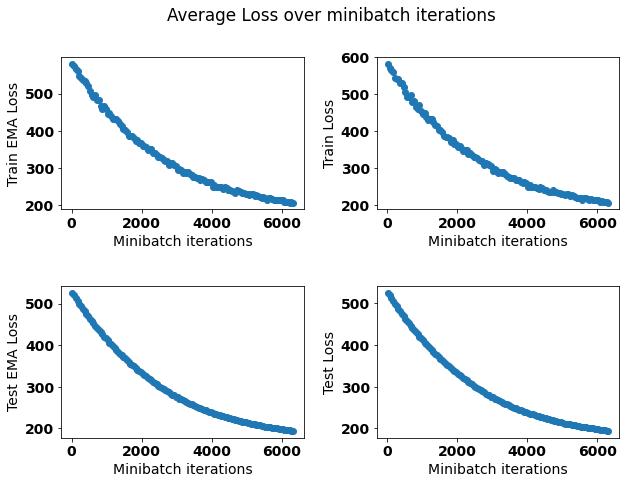

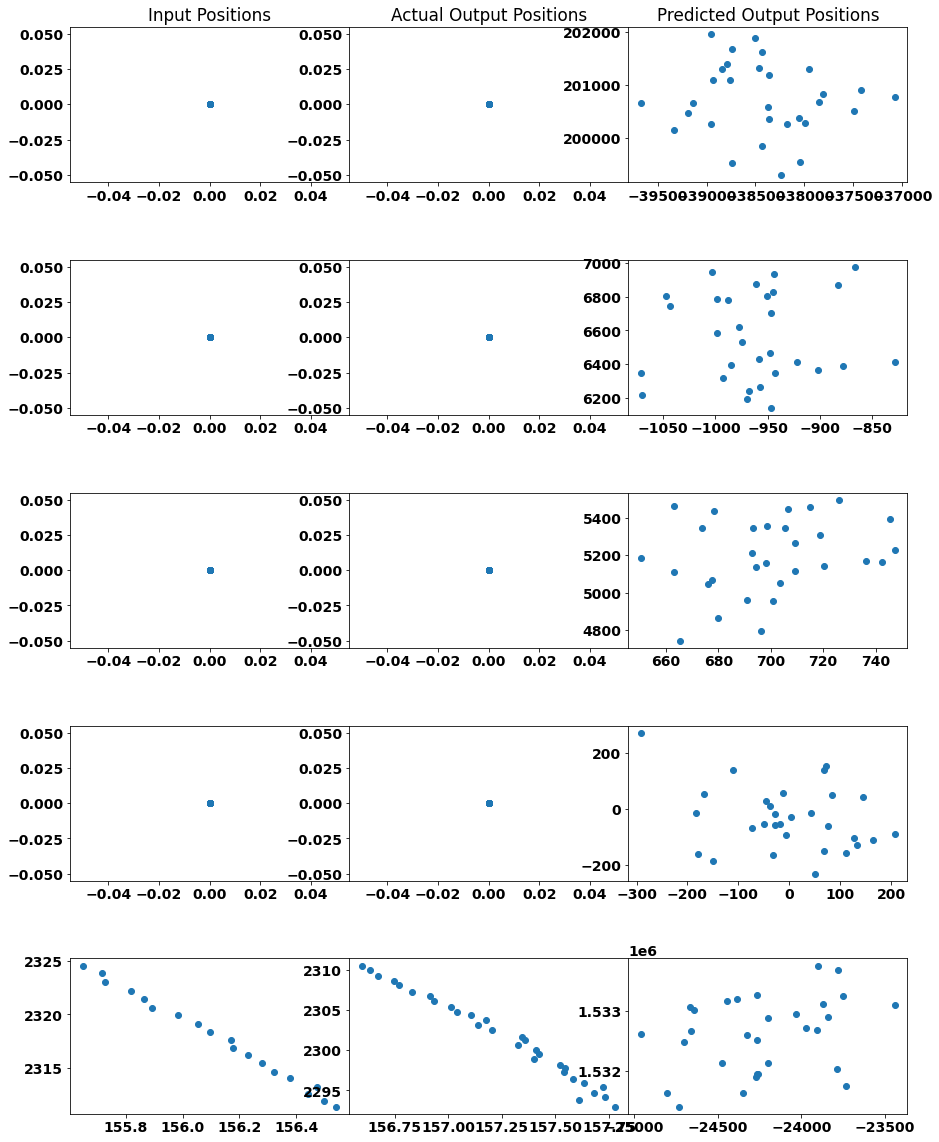

In [9]:
test_fp='../data/trained-models/final-models/test-out.pth'
run_model.train_evaluate(
    model=model,
    train_path=train_path,
    test_path=test_path,
    loss_data_fp=loss_data_fp,
    fig_fp=fig_fp,
    epochs=1,
    batch_size=batch_sz,
    train_func=linear.train,
    ema_weight=0.75,
    dropout=dropout,
    normalize=True,
    save_model_path=test_fp
)

In [ ]:
#continuing testing after this point:

# models=[linear.simple_model, linear.multilayer_model]
# model_names=['simple-linear','multilayer-linear']

models=[linear.simple_model, linear.multilayer_model, linear.multilayer_model2]
model_names=['simple-linear','multilayer-linear','multilayer-linear2']

batch_szs=[128,64,32,16]
epochs=[1,5,10,20]
dropout_list=[0.5,0.75,0.25]


model_dict=dict(zip(models, model_names))

# batch_szs=[128,64,32,16]
# epochs=[10,20]
# dropout_list=[0.5,0.75,0.25]

model_names={}

#epoch 10 starts at model-test-73, so set idx to 73
idx=1

for epoch in epochs:
    for batch_sz in batch_szs:
        for dropout in dropout_list:
            for model in models:
                name='final-'+model_dict[model]+'-dropout%f-batchsz%i-epoch%i'%(dropout,batch_sz,epoch)
                name=name.replace('0.','').replace('0000','')
                
                #skip multilayer-linear2 due to poor performance and loss convergence at 5 epochs
                if model_dict[model]!='multilayer-linear2':                
                    #model stopped with last fully trained model: 
                    #   model-test-92: final-multilayer-linear-dropout0.500000-batchsz32-epoch10
                    if idx>92:
                        print('model_name: ', name)
                        print('\tbatch size: ',batch_sz)
                        print('\tepochs: ', epoch)
                        print('\tdropout: ', dropout)

                        loss_data_fp=os.path.join(out_path, name+'.csv')
                        fig_fp=os.path.join(fig_path, name+'.pdf')
                        model_fp=os.path.join(model_path, name+'.pth')
                        run_model.train_evaluate(
                            model=model,
                            train_path=train_path,
                            test_path=test_path,
                            loss_data_fp=loss_data_fp,
                            fig_fp=fig_fp,
                            epochs=epoch,
                            batch_size=batch_sz,
                            train_func=linear.train,
                            ema_weight=0.75,
                            dropout=dropout,
                            normalize=True,
                            save_model_path=model_fp
                        )
                idx+=1

model_name:  final-simple-linear-dropout75-batchsz32-epoch10
	batch size:  32
	epochs:  10
	dropout:  0.75


Epoch: 1, Train Loss: 215.77590942382812, Train EMA Loss: 239.69508361816406 Test Loss: 205.61968994140625, Test EMA Loss: 205.22813415527344


Epoch: 2, Train Loss: 169.3686065673828, Train EMA Loss: 185.4683837890625 Test Loss: 163.41107177734375, Test EMA Loss: 159.03448486328125


Epoch: 3, Train Loss: 154.79290771484375, Train EMA Loss: 138.16006469726562 Test Loss: 148.56375122070312, Test EMA Loss: 141.93875122070312


Epoch: 4, Train Loss: 158.73731994628906, Train EMA Loss: 172.33526611328125 Test Loss: 142.5064697265625, Test EMA Loss: 141.56643676757812


Epoch: 5, Train Loss: 140.31161499023438, Train EMA Loss: 137.83059692382812 Test Loss: 135.57220458984375, Test EMA Loss: 128.08644104003906


Epoch: 6, Train Loss: 139.89012145996094, Train EMA Loss: 155.186767578125 Test Loss: 135.1588592529297, Test EMA Loss: 131.67523193359375


Epoch: 7, Train Loss: 130.7206573486328, Train EMA Loss: 122.40247344970703 Test Loss: 134.3407440185547, Test EMA Loss: 133.127197265625


Epoch: 8, Train Loss: 133.63523864746094, Train EMA Loss: 118.6956558227539 Test Loss: 134.5564422607422, Test EMA Loss: 127.38960266113281


Epoch: 9, Train Loss: 137.6892852783203, Train EMA Loss: 142.1744384765625 Test Loss: 134.998779296875, Test EMA Loss: 140.96434020996094


Epoch: 10, Train Loss: 139.93743896484375, Train EMA Loss: 137.31381225585938 Test Loss: 132.72979736328125, Test EMA Loss: 130.4866485595703


Completed training in 0 hours,46 minutes, 32 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      523.747009  523.747009     598.639343  598.639343
1        1.0        1.0      559.186646  665.505615     598.594971  598.461975
2        1.0        2.0      571.091370  606.805603     598.517090  598.283569
3        1.0        3.0      589.096252  643.110901     598.416565  598.115051
4        1.0        4.0      591.547241  598.900269     598.303650  597.964783
...      ...        ...             ...         ...            ...         ...
63415   10.0     6337.0      139.547440  144.333221     133.093170  125.555748
63416   10.0     6338.0      137.188171  130.110352     132.197754  129.511475
63417   10.0     6339.0      134.444794  126.214661     132.192520  132.176834
63418   10.0     6340.0      140.811981  159.913574     133.477509  137.332458
63419   10.0     6341.0      139.937439  137.313812     132.729797  130.486649

[63420 rows x 6 columns]

model_name:  final-multilayer-linear-dropout75-batchsz32-epoch10
	batch size:  32
	epochs:  10
	dropout:  0.75


Epoch: 1, Train Loss: 99.13116455078125, Train EMA Loss: 113.7572021484375 Test Loss: 85.73505401611328, Test EMA Loss: 83.02901458740234


Epoch: 2, Train Loss: 75.35401916503906, Train EMA Loss: 78.67188262939453 Test Loss: 72.27951049804688, Test EMA Loss: 83.4578628540039


Epoch: 3, Train Loss: 72.88653564453125, Train EMA Loss: 72.1427001953125 Test Loss: 68.94369506835938, Test EMA Loss: 72.4936752319336


Epoch: 4, Train Loss: 65.45024108886719, Train EMA Loss: 54.054954528808594 Test Loss: 60.777835845947266, Test EMA Loss: 55.56184005737305


Epoch: 5, Train Loss: 59.43024444580078, Train EMA Loss: 49.29141616821289 Test Loss: 56.619136810302734, Test EMA Loss: 57.56367492675781


Epoch: 6, Train Loss: 59.923484802246094, Train EMA Loss: 46.81484603881836 Test Loss: 58.33521270751953, Test EMA Loss: 56.58279037475586


Epoch: 7, Train Loss: 61.5848388671875, Train EMA Loss: 59.20346450805664 Test Loss: 49.63585662841797, Test EMA Loss: 49.39720153808594


Epoch: 8, Train Loss: 59.336238861083984, Train EMA Loss: 53.46207809448242 Test Loss: 53.1026611328125, Test EMA Loss: 57.02486801147461


Epoch: 9, Train Loss: 59.617332458496094, Train EMA Loss: 51.60197067260742 Test Loss: 56.005191802978516, Test EMA Loss: 50.791873931884766


Epoch: 10, Train Loss: 57.20234680175781, Train EMA Loss: 67.01971435546875 Test Loss: 54.31746292114258, Test EMA Loss: 49.23652267456055


Completed training in 0 hours,37 minutes, 39 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      626.412720  626.412720     588.794189  588.794189
1        1.0        1.0      620.039124  600.918396     588.741821  588.584778
2        1.0        2.0      610.934082  583.618774     588.615479  588.236328
3        1.0        3.0      603.877502  582.707825     588.380981  587.677490
4        1.0        4.0      599.444214  586.144165     588.023621  586.951538
...      ...        ...             ...         ...            ...         ...
63415   10.0     6337.0       55.581436   49.058125      53.010471   42.057323
63416   10.0     6338.0       56.465946   59.119480      52.334652   50.307194
63417   10.0     6339.0       54.966705   50.468987      52.907837   54.627399
63418   10.0     6340.0       53.929893   50.819458      56.011108   65.320923
63419   10.0     6341.0       57.202347   67.019714      54.317463   49.236523

[63420 rows x 6 columns]

model_name:  final-simple-linear-dropout25-batchsz32-epoch10
	batch size:  32
	epochs:  10
	dropout:  0.25


Epoch: 1, Train Loss: 180.18618774414062, Train EMA Loss: 168.08511352539062 Test Loss: 202.56002807617188, Test EMA Loss: 202.46282958984375


Epoch: 2, Train Loss: 145.037841796875, Train EMA Loss: 152.1586151123047 Test Loss: 160.77606201171875, Test EMA Loss: 162.79635620117188


Epoch: 3, Train Loss: 116.26898193359375, Train EMA Loss: 113.57523345947266 Test Loss: 141.3683319091797, Test EMA Loss: 143.7090606689453


Epoch: 4, Train Loss: 116.06210327148438, Train EMA Loss: 111.23015594482422 Test Loss: 132.76527404785156, Test EMA Loss: 131.6969451904297


Epoch: 5, Train Loss: 101.75562286376953, Train EMA Loss: 102.49877166748047 Test Loss: 126.8873519897461, Test EMA Loss: 123.2121810913086


Epoch: 6, Train Loss: 104.16283416748047, Train EMA Loss: 90.15100860595703 Test Loss: 122.01654052734375, Test EMA Loss: 117.91676330566406


Epoch: 7, Train Loss: 93.4778823852539, Train EMA Loss: 94.42831420898438 Test Loss: 121.06934356689453, Test EMA Loss: 123.63534545898438


Epoch: 8, Train Loss: 95.53265380859375, Train EMA Loss: 102.22467041015625 Test Loss: 117.70806121826172, Test EMA Loss: 113.13632202148438


Epoch: 9, Train Loss: 86.46273803710938, Train EMA Loss: 95.70723724365234 Test Loss: 116.60581970214844, Test EMA Loss: 113.90219116210938


Epoch: 10, Train Loss: 103.18229675292969, Train EMA Loss: 141.4977264404297 Test Loss: 114.02771759033203, Test EMA Loss: 111.84170532226562


Completed training in 0 hours,42 minutes, 54 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      490.273376  490.273376     630.713135  630.713135
1        1.0        1.0      523.233521  622.114075     630.663208  630.513550
2        1.0        2.0      544.385315  607.840637     630.569519  630.288391
3        1.0        3.0      540.673096  529.536377     630.441406  630.057007
4        1.0        4.0      535.551941  520.188416     630.293030  629.847900
...      ...        ...             ...         ...            ...         ...
63415   10.0     6337.0       96.389114   91.459785     114.346870  116.298615
63416   10.0     6338.0       92.297577   80.022934     113.871101  112.443794
63417   10.0     6339.0       87.142273   71.676369     114.844131  117.763229
63418   10.0     6340.0       90.410492  100.215134     114.756393  114.493149
63419   10.0     6341.0      103.182297  141.497726     114.027718  111.841705

[63420 rows x 6 columns]

model_name:  final-multilayer-linear-dropout25-batchsz32-epoch10
	batch size:  32
	epochs:  10
	dropout:  0.25


Epoch: 1, Train Loss: 54.485374450683594, Train EMA Loss: 48.76573944091797 Test Loss: 60.905479431152344, Test EMA Loss: 62.83469009399414


Epoch: 2, Train Loss: 58.92422866821289, Train EMA Loss: 78.20576477050781 Test Loss: 48.603782653808594, Test EMA Loss: 53.355464935302734


Epoch: 3, Train Loss: 42.54077911376953, Train EMA Loss: 38.75836181640625 Test Loss: 38.874305725097656, Test EMA Loss: 43.82611083984375


Epoch: 4, Train Loss: 48.25012969970703, Train EMA Loss: 76.1541519165039 Test Loss: 37.51340103149414, Test EMA Loss: 36.86537551879883


Epoch: 5, Train Loss: 41.91790771484375, Train EMA Loss: 58.61244583129883 Test Loss: 35.150272369384766, Test EMA Loss: 34.830448150634766


Epoch: 6, Train Loss: 33.276432037353516, Train EMA Loss: 29.964706420898438 Test Loss: 34.08035659790039, Test EMA Loss: 35.74687576293945


Epoch: 7, Train Loss: 32.13903045654297, Train EMA Loss: 24.826921463012695 Test Loss: 31.9921875, Test EMA Loss: 33.290775299072266


Epoch: 8, Train Loss: 34.31459426879883, Train EMA Loss: 29.442516326904297 Test Loss: 41.521175384521484, Test EMA Loss: 43.4879264831543


Epoch: 9, Train Loss: 31.27406120300293, Train EMA Loss: 29.67793083190918 Test Loss: 28.82489585876465, Test EMA Loss: 26.871923446655273


Epoch: 10, Train Loss: 37.56715393066406, Train EMA Loss: 42.98784637451172 Test Loss: 31.75878143310547, Test EMA Loss: 32.80504608154297


Completed training in 0 hours,35 minutes, 33 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      616.250305  616.250305     550.036438  550.036438
1        1.0        1.0      585.706360  494.074524     549.984741  549.829468
2        1.0        2.0      572.417297  532.550110     549.862915  549.497314
3        1.0        3.0      578.761230  597.792969     549.638550  548.965454
4        1.0        4.0      572.926331  555.421631     549.288879  548.239868
...      ...        ...             ...         ...            ...         ...
63415   10.0     6337.0       35.523972   27.125605      28.784821   25.897079
63416   10.0     6338.0       34.826210   32.732918      29.593708   32.020374
63417   10.0     6339.0       36.929939   43.241127      31.275913   36.322529
63418   10.0     6340.0       35.760254   32.251205      31.410027   31.812366
63419   10.0     6341.0       37.567154   42.987846      31.758781   32.805046

[63420 rows x 6 columns]

model_name:  final-simple-linear-dropout50-batchsz16-epoch10
	batch size:  16
	epochs:  10
	dropout:  0.5


Epoch: 1, Train Loss: 167.0518798828125, Train EMA Loss: 149.81332397460938 Test Loss: 165.58126831054688, Test EMA Loss: 163.46603393554688


Epoch: 2, Train Loss: 130.826904296875, Train EMA Loss: 121.34819030761719 Test Loss: 134.7576446533203, Test EMA Loss: 133.92303466796875


Epoch: 3, Train Loss: 125.45442199707031, Train EMA Loss: 145.05271911621094 Test Loss: 121.48078918457031, Test EMA Loss: 122.99154663085938


Epoch: 4, Train Loss: 130.7632598876953, Train EMA Loss: 141.3719482421875 Test Loss: 118.50047302246094, Test EMA Loss: 118.05833435058594


Epoch: 5, Train Loss: 134.8016357421875, Train EMA Loss: 137.84747314453125 Test Loss: 116.0142822265625, Test EMA Loss: 116.02207946777344


Epoch: 6, Train Loss: 108.20550537109375, Train EMA Loss: 113.52006530761719 Test Loss: 112.65169525146484, Test EMA Loss: 109.81866455078125


Epoch: 7, Train Loss: 120.29259490966797, Train EMA Loss: 136.63516235351562 Test Loss: 110.58372497558594, Test EMA Loss: 117.16497802734375


Epoch: 8, Train Loss: 124.26750183105469, Train EMA Loss: 148.8683319091797 Test Loss: 112.99613952636719, Test EMA Loss: 119.26363372802734


Epoch: 9, Train Loss: 122.9577865600586, Train EMA Loss: 94.3941421508789 Test Loss: 108.52490234375, Test EMA Loss: 108.11961364746094


Epoch: 10, Train Loss: 115.87995910644531, Train EMA Loss: 124.44876861572266 Test Loss: 111.65892791748047, Test EMA Loss: 112.84774017333984


Completed training in 0 hours,46 minutes, 19 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema  \
0         1.0        0.0      467.327911  467.327911     593.205872   
1         1.0        1.0      473.813171  493.268860     593.174133   
2         1.0        2.0      526.105347  682.981812     593.118286   
3         1.0        3.0      545.088379  602.037476     593.043762   
4         1.0        4.0      546.828003  552.046997     592.957153   
...       ...        ...             ...         ...            ...   
126835   10.0    12679.0      118.057777  156.523163     109.557480   
126836   10.0    12680.0      114.907501  105.456665     110.390137   
126837   10.0    12681.0      114.042320  111.446770     111.599014   
126838   10.0    12682.0      113.023689  109.967812     111.262657   
126839   10.0    12683.0      115.879959  124.448769     111.658928   

         test_loss  
0       593.205872  
1       593.078857  
2       592.950623  
3       592.820251  
4       592.697388  
...            ...  
126835  108.001480  
126836  112.888115  
126837  115.225655  
126838  110.253578  
126839  112.847740  

[126840 rows x 6 columns]

model_name:  final-multilayer-linear-dropout50-batchsz16-epoch10
	batch size:  16
	epochs:  10
	dropout:  0.5


Epoch: 1, Train Loss: 76.04590606689453, Train EMA Loss: 88.11942291259766 Test Loss: 53.183956146240234, Test EMA Loss: 62.65047073364258


Epoch: 2, Train Loss: 56.379676818847656, Train EMA Loss: 48.120452880859375 Test Loss: 41.33774948120117, Test EMA Loss: 38.52976989746094


Epoch: 3, Train Loss: 55.483394622802734, Train EMA Loss: 60.29429626464844 Test Loss: 41.51715087890625, Test EMA Loss: 39.056671142578125


Epoch: 4, Train Loss: 63.39163589477539, Train EMA Loss: 63.45503234863281 Test Loss: 41.6282958984375, Test EMA Loss: 34.10609817504883


Epoch: 5, Train Loss: 45.30461883544922, Train EMA Loss: 54.75993728637695 Test Loss: 40.71061325073242, Test EMA Loss: 49.17826843261719


Epoch: 6, Train Loss: 47.218994140625, Train EMA Loss: 42.81294250488281 Test Loss: 39.69512939453125, Test EMA Loss: 37.81681442260742


Epoch: 7, Train Loss: 46.10935974121094, Train EMA Loss: 32.591392517089844 Test Loss: 47.28647994995117, Test EMA Loss: 41.19859313964844


Epoch: 8, Train Loss: 42.15119934082031, Train EMA Loss: 40.05269241333008 Test Loss: 34.60934066772461, Test EMA Loss: 35.407684326171875


Epoch: 9, Train Loss: 45.43695831298828, Train EMA Loss: 51.275333404541016 Test Loss: 36.692771911621094, Test EMA Loss: 36.415103912353516


Epoch: 10, Train Loss: 47.00677490234375, Train EMA Loss: 42.59123611450195 Test Loss: 42.668853759765625, Test EMA Loss: 44.498992919921875


Completed training in 0 hours,40 minutes, 34 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema  \
0         1.0        0.0      612.922913  612.922913     536.738037   
1         1.0        1.0      615.196838  622.018616     536.697510   
2         1.0        2.0      627.026611  662.515991     536.590942   
3         1.0        3.0      596.491821  504.887482     536.408752   
4         1.0        4.0      596.630737  597.047363     536.114014   
...       ...        ...             ...         ...            ...   
126835   10.0    12679.0       51.180435   36.296520      39.278397   
126836   10.0    12680.0       47.524155   36.555305      40.835495   
126837   10.0    12681.0       46.777084   44.535877      43.345181   
126838   10.0    12682.0       48.478622   53.583241      42.058807   
126839   10.0    12683.0       47.006775   42.591236      42.668854   

         test_loss  
0       536.738037  
1       536.575928  
2       536.271240  
3       535.862244  
4       535.229797  
...            ...  
126835   35.750202  
126836   45.506794  
126837   50.874241  
126838   38.199684  
126839   44.498993  

[126840 rows x 6 columns]

model_name:  final-simple-linear-dropout75-batchsz16-epoch10
	batch size:  16
	epochs:  10
	dropout:  0.75


Epoch: 1, Train Loss: 181.6186065673828, Train EMA Loss: 168.06874084472656 Test Loss: 201.9916534423828, Test EMA Loss: 220.60777282714844


Epoch: 2, Train Loss: 148.50218200683594, Train EMA Loss: 145.3349609375 Test Loss: 173.99258422851562, Test EMA Loss: 174.40829467773438


Epoch: 3, Train Loss: 161.59803771972656, Train EMA Loss: 189.4050750732422 Test Loss: 177.94863891601562, Test EMA Loss: 192.29417419433594


Epoch: 4, Train Loss: 150.46363830566406, Train EMA Loss: 128.9253692626953 Test Loss: 169.52468872070312, Test EMA Loss: 176.77676391601562


Epoch: 5, Train Loss: 152.32899475097656, Train EMA Loss: 175.83375549316406 Test Loss: 172.3089141845703, Test EMA Loss: 183.25355529785156


Epoch: 6, Train Loss: 126.19557189941406, Train EMA Loss: 110.55612182617188 Test Loss: 170.7537384033203, Test EMA Loss: 181.57318115234375


Epoch: 7, Train Loss: 145.41876220703125, Train EMA Loss: 138.7433624267578 Test Loss: 167.4693145751953, Test EMA Loss: 160.2799072265625


Epoch: 8, Train Loss: 136.31141662597656, Train EMA Loss: 129.91302490234375 Test Loss: 171.08444213867188, Test EMA Loss: 188.6472930908203


Epoch: 9, Train Loss: 146.43344116210938, Train EMA Loss: 159.4520263671875 Test Loss: 170.80422973632812, Test EMA Loss: 176.54275512695312


Epoch: 10, Train Loss: 135.8180389404297, Train EMA Loss: 135.40536499023438 Test Loss: 159.25863647460938, Test EMA Loss: 142.42623901367188


Completed training in 0 hours,47 minutes, 35 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema  \
0         1.0        0.0      506.308350  506.308350     492.219788   
1         1.0        1.0      498.485138  475.015503     492.195984   
2         1.0        2.0      539.588318  662.897766     492.151215   
3         1.0        3.0      535.600830  523.638428     492.097534   
4         1.0        4.0      551.819580  600.475830     492.026154   
...       ...        ...             ...         ...            ...   
126835   10.0    12679.0      139.752258  127.356110     169.222412   
126836   10.0    12680.0      137.885529  132.285355     167.406982   
126837   10.0    12681.0      140.076492  146.649384     163.410614   
126838   10.0    12682.0      135.955597  123.592911     164.869446   
126839   10.0    12683.0      135.818039  135.405365     159.258636   

         test_loss  
0       492.219788  
1       492.124481  
2       492.016937  
3       491.936554  
4       491.812012  
...            ...  
126835  147.962814  
126836  161.960663  
126837  151.421539  
126838  169.245926  
126839  142.426239  

[126840 rows x 6 columns]

model_name:  final-multilayer-linear-dropout75-batchsz16-epoch10
	batch size:  16
	epochs:  10
	dropout:  0.75


Epoch: 1, Train Loss: 96.86368560791016, Train EMA Loss: 94.44669342041016 Test Loss: 77.51824188232422, Test EMA Loss: 76.40383911132812


Epoch: 2, Train Loss: 69.32316589355469, Train EMA Loss: 64.30085754394531 Test Loss: 68.8503189086914, Test EMA Loss: 71.91390228271484


Epoch: 3, Train Loss: 71.3439712524414, Train EMA Loss: 78.08316040039062 Test Loss: 68.15370178222656, Test EMA Loss: 78.56947326660156


Epoch: 4, Train Loss: 81.99940490722656, Train EMA Loss: 85.319091796875 Test Loss: 63.334285736083984, Test EMA Loss: 73.04930114746094


Epoch: 5, Train Loss: 73.16835021972656, Train EMA Loss: 61.59090805053711 Test Loss: 57.095787048339844, Test EMA Loss: 50.05706024169922


Epoch: 6, Train Loss: 56.79739761352539, Train EMA Loss: 41.7159538269043 Test Loss: 54.41826629638672, Test EMA Loss: 49.815040588378906


Epoch: 7, Train Loss: 62.94253158569336, Train EMA Loss: 52.75773620605469 Test Loss: 57.04155731201172, Test EMA Loss: 48.68205261230469


Epoch: 8, Train Loss: 63.25778579711914, Train EMA Loss: 69.04769897460938 Test Loss: 59.95648956298828, Test EMA Loss: 55.65932846069336


Epoch: 9, Train Loss: 66.68611907958984, Train EMA Loss: 78.57012939453125 Test Loss: 58.30979919433594, Test EMA Loss: 64.09988403320312


Epoch: 10, Train Loss: 54.253395080566406, Train EMA Loss: 44.764015197753906 Test Loss: 53.88563537597656, Test EMA Loss: 58.08814239501953


Completed training in 0 hours,40 minutes, 16 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema  \
0         1.0        0.0      693.710938  693.710938     512.430725   
1         1.0        1.0      676.078613  623.181702     512.398682   
2         1.0        2.0      676.383118  677.296692     512.325928   
3         1.0        3.0      667.520874  640.933960     512.190186   
4         1.0        4.0      663.060669  649.680115     511.992065   
...       ...        ...             ...         ...            ...   
126835   10.0    12679.0       58.403076   83.202576      50.089096   
126836   10.0    12680.0       61.501129   70.795280      51.167576   
126837   10.0    12681.0       60.582230   57.825531      51.799927   
126838   10.0    12682.0       57.416519   47.919392      52.484802   
126839   10.0    12683.0       54.253395   44.764015      53.885635   

         test_loss  
0       512.430725  
1       512.302551  
2       512.107605  
3       511.782959  
4       511.397675  
...            ...  
126835   60.705654  
126836   54.403011  
126837   53.696983  
126838   54.539433  
126839   58.088142  

[126840 rows x 6 columns]

model_name:  final-simple-linear-dropout25-batchsz16-epoch10
	batch size:  16
	epochs:  10
	dropout:  0.25


Epoch: 1, Train Loss: 152.93309020996094, Train EMA Loss: 139.87831115722656 Test Loss: 145.92617797851562, Test EMA Loss: 146.87890625


Epoch: 2, Train Loss: 123.3177719116211, Train EMA Loss: 102.73513793945312 Test Loss: 116.88677215576172, Test EMA Loss: 116.56497192382812


Epoch: 3, Train Loss: 106.18699645996094, Train EMA Loss: 113.55750274658203 Test Loss: 105.49500274658203, Test EMA Loss: 107.21539306640625


Epoch: 4, Train Loss: 109.6304931640625, Train EMA Loss: 137.10279846191406 Test Loss: 96.08969116210938, Test EMA Loss: 92.93785858154297


Epoch: 5, Train Loss: 92.69169616699219, Train EMA Loss: 87.98445892333984 Test Loss: 92.79190826416016, Test EMA Loss: 88.40528106689453


Epoch: 6, Train Loss: 108.61491394042969, Train EMA Loss: 134.1898651123047 Test Loss: 90.40633392333984, Test EMA Loss: 89.74585723876953


Epoch: 7, Train Loss: 114.84403991699219, Train EMA Loss: 108.61157989501953 Test Loss: 88.19175720214844, Test EMA Loss: 84.89624786376953


Epoch: 8, Train Loss: 108.81330108642578, Train EMA Loss: 77.47891998291016 Test Loss: 91.02220153808594, Test EMA Loss: 93.32266998291016


Epoch: 9, Train Loss: 94.63392639160156, Train EMA Loss: 78.33648681640625 Test Loss: 86.79814147949219, Test EMA Loss: 85.7110595703125


Epoch: 10, Train Loss: 95.52169799804688, Train EMA Loss: 92.57122802734375 Test Loss: 87.15769958496094, Test EMA Loss: 85.63999938964844


Completed training in 0 hours,46 minutes, 18 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema  \
0         1.0        0.0      601.237366  601.237366     594.676147   
1         1.0        1.0      584.052490  532.497925     594.622681   
2         1.0        2.0      593.141418  620.408264     594.526428   
3         1.0        3.0      591.061462  584.821472     594.401672   
4         1.0        4.0      580.400330  548.416931     594.253052   
...       ...        ...             ...         ...            ...   
126835   10.0    12679.0      104.906631   68.126572      85.835335   
126836   10.0    12680.0      103.220680   98.162819      86.600189   
126837   10.0    12681.0      108.574013  124.634003      87.278465   
126838   10.0    12682.0       96.505188   60.298698      87.663605   
126839   10.0    12683.0       95.521698   92.571228      87.157700   

         test_loss  
0       594.676147  
1       594.462219  
2       594.237671  
3       594.027405  
4       593.807129  
...            ...  
126835   83.796913  
126836   88.894745  
126837   89.313293  
126838   88.819016  
126839   85.639999  

[126840 rows x 6 columns]

model_name:  final-multilayer-linear-dropout25-batchsz16-epoch10
	batch size:  16
	epochs:  10
	dropout:  0.25


Epoch: 1, Train Loss: 52.485748291015625, Train EMA Loss: 46.1418342590332 Test Loss: 45.25215148925781, Test EMA Loss: 50.28299331665039


Epoch: 2, Train Loss: 50.26813888549805, Train EMA Loss: 51.87601089477539 Test Loss: 44.75861358642578, Test EMA Loss: 38.401554107666016


Epoch: 3, Train Loss: 35.205421447753906, Train EMA Loss: 26.09089469909668 Test Loss: 33.3556022644043, Test EMA Loss: 31.533267974853516


Epoch: 4, Train Loss: 48.24843978881836, Train EMA Loss: 30.76877212524414 Test Loss: 43.086971282958984, Test EMA Loss: 50.33412551879883


Epoch: 5, Train Loss: 46.76685333251953, Train EMA Loss: 73.44076538085938 Test Loss: 47.10675811767578, Test EMA Loss: 55.11812210083008


Epoch: 6, Train Loss: 66.04255676269531, Train EMA Loss: 96.09638977050781 Test Loss: 35.711212158203125, Test EMA Loss: 39.983360290527344


Epoch: 7, Train Loss: 42.8857421875, Train EMA Loss: 28.865331649780273 Test Loss: 36.72502899169922, Test EMA Loss: 44.234683990478516


Epoch: 8, Train Loss: 36.83155822753906, Train EMA Loss: 52.34727096557617 Test Loss: 38.891204833984375, Test EMA Loss: 39.74869155883789


Epoch: 9, Train Loss: 45.03174591064453, Train EMA Loss: 45.20183563232422 Test Loss: 38.149112701416016, Test EMA Loss: 42.58833694458008


Epoch: 10, Train Loss: 35.3902587890625, Train EMA Loss: 28.725627899169922 Test Loss: 31.415252685546875, Test EMA Loss: 32.628822326660156


Completed training in 0 hours,40 minutes, 17 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema  \
0         1.0        0.0      649.440491  649.440491     507.343872   
1         1.0        1.0      665.354736  713.097290     507.295349   
2         1.0        2.0      634.721558  542.822083     507.174316   
3         1.0        3.0      615.658447  558.469177     506.970795   
4         1.0        4.0      587.747742  504.015625     506.662079   
...       ...        ...             ...         ...            ...   
126835   10.0    12679.0       34.683537   44.540779      31.723022   
126836   10.0    12680.0       35.104305   36.366604      29.386791   
126837   10.0    12681.0       38.477142   48.595657      31.167269   
126838   10.0    12682.0       37.611801   35.015774      31.010729   
126839   10.0    12683.0       35.390259   28.725628      31.415253   

         test_loss  
0       507.343872  
1       507.149719  
2       506.811279  
3       506.360229  
4       505.735931  
...            ...  
126835   30.713287  
126836   22.378098  
126837   36.508705  
126838   30.541109  
126839   32.628822  

[126840 rows x 6 columns]

model_name:  final-simple-linear-dropout50-batchsz128-epoch20
	batch size:  128
	epochs:  20
	dropout:  0.5


Epoch: 1, Train Loss: 357.30157470703125, Train EMA Loss: 344.5126647949219 Test Loss: 366.90838623046875, Test EMA Loss: 367.5693054199219


Epoch: 2, Train Loss: 248.477294921875, Train EMA Loss: 253.5458984375 Test Loss: 256.634521484375, Test EMA Loss: 255.80441284179688


Epoch: 3, Train Loss: 206.44329833984375, Train EMA Loss: 213.89974975585938 Test Loss: 202.37136840820312, Test EMA Loss: 201.96621704101562


Epoch: 4, Train Loss: 176.17227172851562, Train EMA Loss: 176.63369750976562 Test Loss: 174.2083740234375, Test EMA Loss: 173.39126586914062


Epoch: 5, Train Loss: 156.8746795654297, Train EMA Loss: 159.82057189941406 Test Loss: 157.5911865234375, Test EMA Loss: 157.97756958007812


Epoch: 6, Train Loss: 146.02365112304688, Train EMA Loss: 149.52276611328125 Test Loss: 145.76019287109375, Test EMA Loss: 145.80459594726562


Epoch: 7, Train Loss: 136.74795532226562, Train EMA Loss: 130.38951110839844 Test Loss: 137.12185668945312, Test EMA Loss: 137.86920166015625


Epoch: 8, Train Loss: 134.2802734375, Train EMA Loss: 144.41561889648438 Test Loss: 128.6526641845703, Test EMA Loss: 128.43125915527344


Epoch: 9, Train Loss: 122.16395568847656, Train EMA Loss: 120.14769744873047 Test Loss: 122.55048370361328, Test EMA Loss: 123.28020477294922


Epoch: 10, Train Loss: 123.9971923828125, Train EMA Loss: 129.52125549316406 Test Loss: 116.6141357421875, Test EMA Loss: 116.25592041015625


Epoch: 11, Train Loss: 113.58336639404297, Train EMA Loss: 118.55049896240234 Test Loss: 113.353759765625, Test EMA Loss: 112.05982208251953


Epoch: 12, Train Loss: 113.23214721679688, Train EMA Loss: 123.94011688232422 Test Loss: 109.82161712646484, Test EMA Loss: 110.37960052490234


Epoch: 13, Train Loss: 108.38127899169922, Train EMA Loss: 105.8246841430664 Test Loss: 106.82807922363281, Test EMA Loss: 106.38790893554688


Epoch: 14, Train Loss: 106.06524658203125, Train EMA Loss: 110.29256439208984 Test Loss: 104.99524688720703, Test EMA Loss: 105.3948745727539


Epoch: 15, Train Loss: 106.66183471679688, Train EMA Loss: 106.24060821533203 Test Loss: 100.96360778808594, Test EMA Loss: 97.86658477783203


Epoch: 16, Train Loss: 106.08729553222656, Train EMA Loss: 118.51142120361328 Test Loss: 100.68705749511719, Test EMA Loss: 100.68922424316406


Epoch: 17, Train Loss: 107.85240173339844, Train EMA Loss: 134.5203094482422 Test Loss: 98.61930084228516, Test EMA Loss: 100.70006561279297


Epoch: 18, Train Loss: 109.12519836425781, Train EMA Loss: 136.2095184326172 Test Loss: 96.60748291015625, Test EMA Loss: 96.75830078125


Epoch: 19, Train Loss: 100.30081176757812, Train EMA Loss: 109.61433410644531 Test Loss: 94.72662353515625, Test EMA Loss: 92.82453918457031


Epoch: 20, Train Loss: 98.26397705078125, Train EMA Loss: 102.36803436279297 Test Loss: 94.28250122070312, Test EMA Loss: 93.82953643798828


Completed training in 1 hours,5 minutes, 28 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      602.651184  602.651184     572.472473  572.472473
1        1.0        1.0      610.789307  635.203735     572.420898  572.266235
2        1.0        2.0      621.183105  652.364380     572.335449  572.079163
3        1.0        3.0      605.220337  557.332092     572.218384  571.867065
4        1.0        4.0      593.128906  556.854675     572.085938  571.688538
...      ...        ...             ...         ...            ...         ...
31715   20.0     1581.0       96.407707   93.193947      93.717186   92.040092
31716   20.0     1582.0       97.984695  102.715660      94.286591   95.994820
31717   20.0     1583.0       97.186310   94.791122      93.806084   92.364555
31718   20.0     1584.0       96.895958   96.024895      94.433487   96.315704
31719   20.0     1585.0       98.263977  102.368034      94.282501   93.829536

[31720 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/current/src/utility.py:190: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/current/src/utility.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  final-multilayer-linear-dropout50-batchsz128-epoch20
	batch size:  128
	epochs:  20
	dropout:  0.5


Epoch: 1, Train Loss: 87.739501953125, Train EMA Loss: 84.77311706542969 Test Loss: 88.4379653930664, Test EMA Loss: 89.5787582397461


Epoch: 2, Train Loss: 61.852867126464844, Train EMA Loss: 66.58489990234375 Test Loss: 60.677459716796875, Test EMA Loss: 62.642669677734375


Epoch: 3, Train Loss: 55.30108642578125, Train EMA Loss: 76.5318603515625 Test Loss: 49.646705627441406, Test EMA Loss: 49.63167953491211


Epoch: 4, Train Loss: 51.343353271484375, Train EMA Loss: 60.96855926513672 Test Loss: 45.334693908691406, Test EMA Loss: 44.36158752441406


Epoch: 5, Train Loss: 44.35906219482422, Train EMA Loss: 43.531185150146484 Test Loss: 45.287715911865234, Test EMA Loss: 44.88190841674805


Epoch: 6, Train Loss: 43.47745132446289, Train EMA Loss: 42.66200637817383 Test Loss: 43.037208557128906, Test EMA Loss: 47.050357818603516


Epoch: 7, Train Loss: 41.4532585144043, Train EMA Loss: 39.37166213989258 Test Loss: 47.61302185058594, Test EMA Loss: 47.39875030517578


Epoch: 8, Train Loss: 44.08720397949219, Train EMA Loss: 41.50465393066406 Test Loss: 43.53356170654297, Test EMA Loss: 46.71415328979492


Epoch: 9, Train Loss: 43.65045166015625, Train EMA Loss: 50.72584533691406 Test Loss: 41.551063537597656, Test EMA Loss: 41.11610794067383


Epoch: 10, Train Loss: 46.03559875488281, Train EMA Loss: 64.14237213134766 Test Loss: 40.56597137451172, Test EMA Loss: 38.64855194091797


Epoch: 11, Train Loss: 44.732200622558594, Train EMA Loss: 48.27899932861328 Test Loss: 44.695316314697266, Test EMA Loss: 40.60380935668945


Epoch: 12, Train Loss: 40.57989501953125, Train EMA Loss: 39.359832763671875 Test Loss: 39.225494384765625, Test EMA Loss: 41.23871612548828


Epoch: 13, Train Loss: 45.16352462768555, Train EMA Loss: 51.27789306640625 Test Loss: 46.12821578979492, Test EMA Loss: 49.53132247924805


Epoch: 14, Train Loss: 36.06573486328125, Train EMA Loss: 34.46305465698242 Test Loss: 40.99404525756836, Test EMA Loss: 45.21087646484375


Epoch: 15, Train Loss: 41.66090393066406, Train EMA Loss: 41.6286506652832 Test Loss: 41.408843994140625, Test EMA Loss: 41.463531494140625


Epoch: 16, Train Loss: 46.40692901611328, Train EMA Loss: 70.91349029541016 Test Loss: 38.31730651855469, Test EMA Loss: 37.66434860229492


Epoch: 17, Train Loss: 36.06455993652344, Train EMA Loss: 33.90202331542969 Test Loss: 38.79113006591797, Test EMA Loss: 37.465694427490234


Epoch: 18, Train Loss: 38.08257293701172, Train EMA Loss: 33.14833068847656 Test Loss: 38.05247497558594, Test EMA Loss: 35.57317352294922


Epoch: 19, Train Loss: 41.599029541015625, Train EMA Loss: 51.284324645996094 Test Loss: 42.541175842285156, Test EMA Loss: 45.39195251464844


Epoch: 20, Train Loss: 41.30659484863281, Train EMA Loss: 52.37492370605469 Test Loss: 35.29475402832031, Test EMA Loss: 32.830848693847656


Completed training in 1 hours,6 minutes, 23 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      606.521973  606.521973     580.654907  580.654907
1        1.0        1.0      600.967651  584.304749     580.579895  580.354858
2        1.0        2.0      601.623779  603.592285     580.395813  579.843567
3        1.0        3.0      599.225952  592.032593     580.069946  579.092407
4        1.0        4.0      587.637817  552.873413     579.564941  578.049927
...      ...        ...             ...         ...            ...         ...
31715   20.0     1581.0       37.816559   35.390156      36.459301   32.621651
31716   20.0     1582.0       37.321129   35.834846      35.883545   34.156277
31717   20.0     1583.0       38.149273   40.633701      35.806885   35.576897
31718   20.0     1584.0       37.617149   36.020779      36.116058   37.043571
31719   20.0     1585.0       41.306595   52.374924      35.294754   32.830849

[31720 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/current/src/utility.py:190: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/current/src/utility.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  final-simple-linear-dropout75-batchsz128-epoch20
	batch size:  128
	epochs:  20
	dropout:  0.75


Epoch: 1, Train Loss: 385.25543212890625, Train EMA Loss: 383.83392333984375 Test Loss: 381.2085266113281, Test EMA Loss: 380.9944152832031


Epoch: 2, Train Loss: 257.5716857910156, Train EMA Loss: 252.54478454589844 Test Loss: 272.3480224609375, Test EMA Loss: 273.9862060546875


Epoch: 3, Train Loss: 214.3155517578125, Train EMA Loss: 235.84532165527344 Test Loss: 216.21531677246094, Test EMA Loss: 217.3063201904297


Epoch: 4, Train Loss: 184.38026428222656, Train EMA Loss: 192.03179931640625 Test Loss: 189.92001342773438, Test EMA Loss: 188.12832641601562


Epoch: 5, Train Loss: 177.175537109375, Train EMA Loss: 183.498291015625 Test Loss: 175.88296508789062, Test EMA Loss: 173.79730224609375


Epoch: 6, Train Loss: 160.0483856201172, Train EMA Loss: 156.04222106933594 Test Loss: 164.2984161376953, Test EMA Loss: 162.9540252685547


Epoch: 7, Train Loss: 157.00213623046875, Train EMA Loss: 157.48741149902344 Test Loss: 156.8466339111328, Test EMA Loss: 159.23719787597656


Epoch: 8, Train Loss: 144.85499572753906, Train EMA Loss: 153.2272491455078 Test Loss: 150.49063110351562, Test EMA Loss: 149.38986206054688


Epoch: 9, Train Loss: 150.39678955078125, Train EMA Loss: 166.21083068847656 Test Loss: 144.87249755859375, Test EMA Loss: 144.4619598388672


Epoch: 10, Train Loss: 140.98199462890625, Train EMA Loss: 146.15328979492188 Test Loss: 141.60528564453125, Test EMA Loss: 141.87515258789062


Epoch: 11, Train Loss: 148.1596221923828, Train EMA Loss: 174.6195526123047 Test Loss: 138.24562072753906, Test EMA Loss: 138.07867431640625


Epoch: 12, Train Loss: 138.33489990234375, Train EMA Loss: 149.23817443847656 Test Loss: 136.65167236328125, Test EMA Loss: 136.168212890625


Epoch: 13, Train Loss: 133.55374145507812, Train EMA Loss: 124.25225830078125 Test Loss: 134.89251708984375, Test EMA Loss: 133.66690063476562


Epoch: 14, Train Loss: 130.4149169921875, Train EMA Loss: 126.77400207519531 Test Loss: 134.57473754882812, Test EMA Loss: 133.79861450195312


Epoch: 15, Train Loss: 139.81263732910156, Train EMA Loss: 146.55836486816406 Test Loss: 132.24169921875, Test EMA Loss: 133.29966735839844


Epoch: 16, Train Loss: 128.13768005371094, Train EMA Loss: 123.93827819824219 Test Loss: 128.64881896972656, Test EMA Loss: 126.41424560546875


Epoch: 17, Train Loss: 130.4270782470703, Train EMA Loss: 145.1774444580078 Test Loss: 130.93682861328125, Test EMA Loss: 128.61920166015625


Epoch: 18, Train Loss: 130.9977569580078, Train EMA Loss: 128.41334533691406 Test Loss: 130.51104736328125, Test EMA Loss: 130.2781219482422


Epoch: 19, Train Loss: 126.29953002929688, Train EMA Loss: 130.70982360839844 Test Loss: 127.40940856933594, Test EMA Loss: 126.68060302734375


Epoch: 20, Train Loss: 125.01596069335938, Train EMA Loss: 122.00419616699219 Test Loss: 129.53317260742188, Test EMA Loss: 131.21572875976562


Completed training in 1 hours,5 minutes, 35 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      570.641602  570.641602     594.877197  594.877197
1        1.0        1.0      577.004395  596.092773     594.828186  594.681213
2        1.0        2.0      575.390869  570.550293     594.746582  594.501648
3        1.0        3.0      575.364746  575.286438     594.635620  594.302734
4        1.0        4.0      580.477356  595.815247     594.503052  594.105469
...      ...        ...             ...         ...            ...         ...
31715   20.0     1581.0      127.269691  129.417053     129.811096  132.393066
31716   20.0     1582.0      127.236801  127.138115     130.020691  130.649506
31717   20.0     1583.0      127.057487  126.519562     129.516785  128.005096
31718   20.0     1584.0      126.019882  122.907059     128.972336  127.338989
31719   20.0     1585.0      125.015961  122.004196     129.533173  131.215729

[31720 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/current/src/utility.py:190: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/current/src/utility.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  final-multilayer-linear-dropout75-batchsz128-epoch20
	batch size:  128
	epochs:  20
	dropout:  0.75


Epoch: 1, Train Loss: 109.73880004882812, Train EMA Loss: 110.30528259277344 Test Loss: 115.23680877685547, Test EMA Loss: 116.29507446289062


Epoch: 2, Train Loss: 87.77635192871094, Train EMA Loss: 92.3780288696289 Test Loss: 88.4268569946289, Test EMA Loss: 90.2375717163086


Epoch: 3, Train Loss: 76.97599029541016, Train EMA Loss: 77.85323333740234 Test Loss: 76.86778259277344, Test EMA Loss: 74.87165832519531


Epoch: 4, Train Loss: 71.82068634033203, Train EMA Loss: 71.33168029785156 Test Loss: 75.8580093383789, Test EMA Loss: 71.99679565429688


Epoch: 5, Train Loss: 68.58248901367188, Train EMA Loss: 68.39823913574219 Test Loss: 71.7901611328125, Test EMA Loss: 71.9373779296875


Epoch: 6, Train Loss: 63.2732048034668, Train EMA Loss: 62.98647689819336 Test Loss: 67.91059875488281, Test EMA Loss: 72.13070678710938


Epoch: 7, Train Loss: 62.166297912597656, Train EMA Loss: 64.39704132080078 Test Loss: 65.40375518798828, Test EMA Loss: 69.6889877319336


Epoch: 8, Train Loss: 61.47054672241211, Train EMA Loss: 66.72059631347656 Test Loss: 62.8336181640625, Test EMA Loss: 64.52978515625


Epoch: 9, Train Loss: 59.164337158203125, Train EMA Loss: 60.813350677490234 Test Loss: 63.92512130737305, Test EMA Loss: 63.86897659301758


Epoch: 10, Train Loss: 60.9473876953125, Train EMA Loss: 64.88774871826172 Test Loss: 60.259033203125, Test EMA Loss: 62.092105865478516


Epoch: 11, Train Loss: 56.415706634521484, Train EMA Loss: 49.11170959472656 Test Loss: 59.997642517089844, Test EMA Loss: 56.50191116333008


Epoch: 12, Train Loss: 59.204368591308594, Train EMA Loss: 59.570526123046875 Test Loss: 60.617488861083984, Test EMA Loss: 62.51253890991211


Epoch: 13, Train Loss: 57.721927642822266, Train EMA Loss: 52.32523727416992 Test Loss: 59.33145523071289, Test EMA Loss: 55.89457702636719


Epoch: 14, Train Loss: 63.21356201171875, Train EMA Loss: 83.75952911376953 Test Loss: 61.92853546142578, Test EMA Loss: 69.75114440917969


Epoch: 15, Train Loss: 55.37132263183594, Train EMA Loss: 46.102996826171875 Test Loss: 60.661319732666016, Test EMA Loss: 63.17119216918945


Epoch: 16, Train Loss: 59.48320007324219, Train EMA Loss: 73.3194351196289 Test Loss: 60.385135650634766, Test EMA Loss: 61.15705871582031


Epoch: 17, Train Loss: 54.39268112182617, Train EMA Loss: 52.712738037109375 Test Loss: 60.407413482666016, Test EMA Loss: 59.898616790771484


Epoch: 18, Train Loss: 55.58870315551758, Train EMA Loss: 50.4773063659668 Test Loss: 54.066429138183594, Test EMA Loss: 49.908931732177734


Epoch: 19, Train Loss: 52.7338981628418, Train EMA Loss: 52.14082717895508 Test Loss: 58.154415130615234, Test EMA Loss: 62.3724479675293


Epoch: 20, Train Loss: 48.90350341796875, Train EMA Loss: 49.363319396972656 Test Loss: 56.82440948486328, Test EMA Loss: 55.65739440917969


Completed training in 1 hours,6 minutes, 2 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      571.048828  571.048828     602.711304  602.711304
1        1.0        1.0      568.165833  559.516785     602.635559  602.408325
2        1.0        2.0      567.194702  564.281189     602.452698  601.904053
3        1.0        3.0      570.954102  582.232361     602.120483  601.123657
4        1.0        4.0      574.634827  585.677063     601.612305  600.087891
...      ...        ...             ...         ...            ...         ...
31715   20.0     1581.0       51.123325   51.213169      58.436192   57.597988
31716   20.0     1582.0       51.098335   51.023357      57.645691   55.274185
31717   20.0     1583.0       49.195095   43.485371      56.066868   51.330402
31718   20.0     1584.0       48.750237   47.415665      57.213413   60.653049
31719   20.0     1585.0       48.903503   49.363319      56.824409   55.657394

[31720 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/current/src/utility.py:190: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/current/src/utility.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  final-simple-linear-dropout25-batchsz128-epoch20
	batch size:  128
	epochs:  20
	dropout:  0.25


Epoch: 1, Train Loss: 372.6908874511719, Train EMA Loss: 392.0669860839844 Test Loss: 360.9095153808594, Test EMA Loss: 360.5545959472656


Epoch: 2, Train Loss: 252.32147216796875, Train EMA Loss: 272.7803649902344 Test Loss: 253.56021118164062, Test EMA Loss: 252.9582061767578


Epoch: 3, Train Loss: 202.8907470703125, Train EMA Loss: 205.04429626464844 Test Loss: 201.37759399414062, Test EMA Loss: 201.49119567871094


Epoch: 4, Train Loss: 170.88720703125, Train EMA Loss: 177.0968475341797 Test Loss: 174.35191345214844, Test EMA Loss: 174.7950439453125


Epoch: 5, Train Loss: 155.04605102539062, Train EMA Loss: 158.8017120361328 Test Loss: 157.26589965820312, Test EMA Loss: 157.87130737304688


Epoch: 6, Train Loss: 140.6859130859375, Train EMA Loss: 134.9291534423828 Test Loss: 145.05201721191406, Test EMA Loss: 145.86424255371094


Epoch: 7, Train Loss: 131.71640014648438, Train EMA Loss: 140.08502197265625 Test Loss: 134.5399627685547, Test EMA Loss: 134.210693359375


Epoch: 8, Train Loss: 122.5404052734375, Train EMA Loss: 129.85891723632812 Test Loss: 126.58230590820312, Test EMA Loss: 125.58271789550781


Epoch: 9, Train Loss: 116.1036605834961, Train EMA Loss: 118.21842193603516 Test Loss: 120.10836029052734, Test EMA Loss: 119.41549682617188


Epoch: 10, Train Loss: 107.97686004638672, Train EMA Loss: 109.60929107666016 Test Loss: 114.4100341796875, Test EMA Loss: 114.7027359008789


Epoch: 11, Train Loss: 105.39849853515625, Train EMA Loss: 110.63298034667969 Test Loss: 109.61209869384766, Test EMA Loss: 108.1053695678711


Epoch: 12, Train Loss: 103.31005859375, Train EMA Loss: 106.5811538696289 Test Loss: 105.01427459716797, Test EMA Loss: 103.91149139404297


Epoch: 13, Train Loss: 98.99384307861328, Train EMA Loss: 101.0941390991211 Test Loss: 102.72926330566406, Test EMA Loss: 103.16517639160156


Epoch: 14, Train Loss: 96.67015075683594, Train EMA Loss: 88.43305206298828 Test Loss: 99.14936828613281, Test EMA Loss: 98.9892807006836


Epoch: 15, Train Loss: 93.35794830322266, Train EMA Loss: 100.5228500366211 Test Loss: 96.25955200195312, Test EMA Loss: 95.21665954589844


Epoch: 16, Train Loss: 92.87754821777344, Train EMA Loss: 98.15120697021484 Test Loss: 95.29084777832031, Test EMA Loss: 95.56396484375


Epoch: 17, Train Loss: 90.0411605834961, Train EMA Loss: 100.76480102539062 Test Loss: 92.95575714111328, Test EMA Loss: 92.14649200439453


Epoch: 18, Train Loss: 82.41425323486328, Train EMA Loss: 83.48348236083984 Test Loss: 90.9036636352539, Test EMA Loss: 90.88378143310547


Epoch: 19, Train Loss: 86.81499481201172, Train EMA Loss: 94.20357513427734 Test Loss: 89.20950317382812, Test EMA Loss: 89.11720275878906


Epoch: 20, Train Loss: 83.32081604003906, Train EMA Loss: 95.61911010742188 Test Loss: 87.93569946289062, Test EMA Loss: 89.66621398925781


Completed training in 1 hours,5 minutes, 40 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      592.259949  592.259949     591.238831  591.238831
1        1.0        1.0      597.409912  612.859741     591.179199  591.000183
2        1.0        2.0      598.989380  603.727783     591.074463  590.760193
3        1.0        3.0      594.330383  580.353455     590.938599  590.531128
4        1.0        4.0      589.379639  574.527222     590.779114  590.300659
...      ...        ...             ...         ...            ...         ...
31715   20.0     1581.0       83.104721   79.222649      87.435959   87.444687
31716   20.0     1582.0       82.299538   79.883980      87.451981   87.500053
31717   20.0     1583.0       80.212814   73.952629      87.637955   88.195854
31718   20.0     1584.0       79.221382   76.247086      87.358864   86.521576
31719   20.0     1585.0       83.320816   95.619110      87.935699   89.666214

[31720 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/current/src/utility.py:190: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/current/src/utility.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  final-multilayer-linear-dropout25-batchsz128-epoch20
	batch size:  128
	epochs:  20
	dropout:  0.25


Epoch: 1, Train Loss: 83.79974365234375, Train EMA Loss: 92.06485748291016 Test Loss: 78.36585235595703, Test EMA Loss: 78.59920501708984


Epoch: 2, Train Loss: 45.14227294921875, Train EMA Loss: 44.323551177978516 Test Loss: 43.904083251953125, Test EMA Loss: 46.159339904785156


Epoch: 3, Train Loss: 51.101009368896484, Train EMA Loss: 49.23329544067383 Test Loss: 36.63801193237305, Test EMA Loss: 38.1211051940918


Epoch: 4, Train Loss: 35.63570785522461, Train EMA Loss: 31.901140213012695 Test Loss: 32.31675720214844, Test EMA Loss: 29.614377975463867


Epoch: 5, Train Loss: 37.6358642578125, Train EMA Loss: 34.91796112060547 Test Loss: 28.472389221191406, Test EMA Loss: 29.783010482788086


Epoch: 6, Train Loss: 35.11214828491211, Train EMA Loss: 43.01333236694336 Test Loss: 29.348072052001953, Test EMA Loss: 30.975353240966797


Epoch: 7, Train Loss: 33.70583724975586, Train EMA Loss: 39.20441818237305 Test Loss: 27.287567138671875, Test EMA Loss: 28.091283798217773


Epoch: 8, Train Loss: 32.077964782714844, Train EMA Loss: 39.81142044067383 Test Loss: 26.439403533935547, Test EMA Loss: 26.412006378173828


Epoch: 9, Train Loss: 36.39173126220703, Train EMA Loss: 48.00685119628906 Test Loss: 26.418655395507812, Test EMA Loss: 24.391565322875977


Epoch: 10, Train Loss: 41.41265869140625, Train EMA Loss: 49.681331634521484 Test Loss: 27.112945556640625, Test EMA Loss: 29.129261016845703


Epoch: 11, Train Loss: 31.0214786529541, Train EMA Loss: 31.832448959350586 Test Loss: 25.026342391967773, Test EMA Loss: 25.71544647216797


Epoch: 12, Train Loss: 30.96918487548828, Train EMA Loss: 37.77519989013672 Test Loss: 26.158203125, Test EMA Loss: 27.242650985717773


Epoch: 13, Train Loss: 37.37042236328125, Train EMA Loss: 57.85029220581055 Test Loss: 25.06219482421875, Test EMA Loss: 23.693946838378906


Epoch: 14, Train Loss: 31.90363883972168, Train EMA Loss: 28.2360782623291 Test Loss: 25.264991760253906, Test EMA Loss: 23.32408332824707


Epoch: 15, Train Loss: 33.2779541015625, Train EMA Loss: 53.38116455078125 Test Loss: 25.87485122680664, Test EMA Loss: 28.03126335144043


Epoch: 16, Train Loss: 34.863365173339844, Train EMA Loss: 51.99140930175781 Test Loss: 25.853857040405273, Test EMA Loss: 24.256065368652344


Epoch: 17, Train Loss: 28.824634552001953, Train EMA Loss: 26.461103439331055 Test Loss: 25.903671264648438, Test EMA Loss: 26.338239669799805


Epoch: 18, Train Loss: 25.6298828125, Train EMA Loss: 24.128009796142578 Test Loss: 23.95740509033203, Test EMA Loss: 24.80696678161621


Epoch: 19, Train Loss: 26.77237892150879, Train EMA Loss: 24.130821228027344 Test Loss: 25.622108459472656, Test EMA Loss: 27.505247116088867


Epoch: 20, Train Loss: 31.201000213623047, Train EMA Loss: 32.89474105834961 Test Loss: 24.211505889892578, Test EMA Loss: 25.095571517944336


Completed training in 1 hours,6 minutes, 39 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      556.774048  556.774048     572.469666  572.469666
1        1.0        1.0      565.785156  592.818481     572.395630  572.173462
2        1.0        2.0      574.581421  600.970093     572.214966  571.673096
3        1.0        3.0      578.028992  588.371704     571.892273  570.924255
4        1.0        4.0      582.246155  594.897644     571.402222  569.932129
...      ...        ...             ...         ...            ...         ...
31715   20.0     1581.0       30.911398   25.296453      23.672888   23.150597
31716   20.0     1582.0       29.385904   24.809423      23.475525   22.883434
31717   20.0     1583.0       32.334236   41.179226      23.764626   24.631929
31718   20.0     1584.0       30.636417   25.542965      23.916817   24.373392
31719   20.0     1585.0       31.201000   32.894741      24.211506   25.095572

[31720 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/current/src/utility.py:190: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/current/src/utility.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  final-simple-linear-dropout50-batchsz64-epoch20
	batch size:  64
	epochs:  20
	dropout:  0.5


Epoch: 1, Train Loss: 264.3600158691406, Train EMA Loss: 270.4041748046875 Test Loss: 263.91766357421875, Test EMA Loss: 264.9752197265625


Epoch: 2, Train Loss: 182.3469696044922, Train EMA Loss: 186.0270538330078 Test Loss: 185.09072875976562, Test EMA Loss: 183.9645538330078


Epoch: 3, Train Loss: 152.70362854003906, Train EMA Loss: 153.5403594970703 Test Loss: 156.9017333984375, Test EMA Loss: 155.89205932617188


Epoch: 4, Train Loss: 134.57176208496094, Train EMA Loss: 136.3946075439453 Test Loss: 139.41053771972656, Test EMA Loss: 138.8023681640625


Epoch: 5, Train Loss: 131.1747283935547, Train EMA Loss: 129.96426391601562 Test Loss: 127.87162780761719, Test EMA Loss: 125.32752227783203


Epoch: 6, Train Loss: 124.04248046875, Train EMA Loss: 119.93865966796875 Test Loss: 121.537841796875, Test EMA Loss: 122.48655700683594


Epoch: 7, Train Loss: 116.0587387084961, Train EMA Loss: 123.55816650390625 Test Loss: 116.326904296875, Test EMA Loss: 117.29077911376953


Epoch: 8, Train Loss: 121.09226989746094, Train EMA Loss: 137.2705841064453 Test Loss: 111.70405578613281, Test EMA Loss: 111.52764129638672


Epoch: 9, Train Loss: 111.64584350585938, Train EMA Loss: 127.68872833251953 Test Loss: 108.54096221923828, Test EMA Loss: 106.09984588623047


Epoch: 10, Train Loss: 104.94142150878906, Train EMA Loss: 100.03065490722656 Test Loss: 106.54881286621094, Test EMA Loss: 106.14945983886719


Epoch: 11, Train Loss: 106.69050598144531, Train EMA Loss: 112.34843444824219 Test Loss: 104.64202880859375, Test EMA Loss: 103.7294692993164


Epoch: 12, Train Loss: 105.01853942871094, Train EMA Loss: 93.10255432128906 Test Loss: 102.45369720458984, Test EMA Loss: 104.14173126220703


Epoch: 13, Train Loss: 103.30194854736328, Train EMA Loss: 115.42388153076172 Test Loss: 102.06826782226562, Test EMA Loss: 98.64657592773438


Epoch: 14, Train Loss: 106.07508850097656, Train EMA Loss: 110.81198120117188 Test Loss: 100.9404525756836, Test EMA Loss: 99.80060577392578


Epoch: 15, Train Loss: 102.08224487304688, Train EMA Loss: 109.43523406982422 Test Loss: 99.70973205566406, Test EMA Loss: 103.36053466796875


Epoch: 16, Train Loss: 98.74803924560547, Train EMA Loss: 94.33590698242188 Test Loss: 96.84188079833984, Test EMA Loss: 99.9792251586914


Epoch: 17, Train Loss: 96.27876281738281, Train EMA Loss: 85.64776611328125 Test Loss: 97.06019592285156, Test EMA Loss: 94.12945556640625


Epoch: 18, Train Loss: 94.6833267211914, Train EMA Loss: 97.81232452392578 Test Loss: 95.25, Test EMA Loss: 95.39024353027344


Epoch: 19, Train Loss: 101.45543670654297, Train EMA Loss: 93.65243530273438 Test Loss: 97.49247741699219, Test EMA Loss: 98.14032745361328


Epoch: 20, Train Loss: 96.76777648925781, Train EMA Loss: 90.95396423339844 Test Loss: 96.68492889404297, Test EMA Loss: 95.87073516845703


Completed training in 1 hours,12 minutes, 44 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      573.714294  573.714294     590.982910  590.982910
1        1.0        1.0      578.061157  591.101746     590.933716  590.786133
2        1.0        2.0      586.224182  610.713318     590.842224  590.567688
3        1.0        3.0      595.780212  624.448181     590.723145  590.365845
4        1.0        4.0      589.527771  570.770508     590.583740  590.165649
...      ...        ...             ...         ...            ...         ...
63415   20.0     3166.0       94.400032   84.979759      95.851601   96.950043
63416   20.0     3167.0       98.549347  110.997276      95.521538   94.531342
63417   20.0     3168.0       97.481064   94.276230      96.556107   99.659805
63418   20.0     3169.0       98.705704  102.379654      96.956329   98.156975
63419   20.0     3170.0       96.767776   90.953964      96.684929   95.870735

[63420 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/current/src/utility.py:190: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/current/src/utility.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  final-multilayer-linear-dropout50-batchsz64-epoch20
	batch size:  64
	epochs:  20
	dropout:  0.5


Epoch: 1, Train Loss: 72.36129760742188, Train EMA Loss: 80.52873229980469 Test Loss: 67.48362731933594, Test EMA Loss: 68.46558380126953


Epoch: 2, Train Loss: 62.120140075683594, Train EMA Loss: 68.3089599609375 Test Loss: 50.20097351074219, Test EMA Loss: 48.48792266845703


Epoch: 3, Train Loss: 49.54030990600586, Train EMA Loss: 47.01968002319336 Test Loss: 43.40107727050781, Test EMA Loss: 41.362979888916016


Epoch: 4, Train Loss: 44.7333984375, Train EMA Loss: 41.437232971191406 Test Loss: 43.42818069458008, Test EMA Loss: 45.13063049316406


Epoch: 5, Train Loss: 47.935577392578125, Train EMA Loss: 44.10404586791992 Test Loss: 42.211883544921875, Test EMA Loss: 45.26081848144531


Epoch: 6, Train Loss: 48.97698974609375, Train EMA Loss: 42.017601013183594 Test Loss: 39.96329879760742, Test EMA Loss: 37.64931106567383


Epoch: 7, Train Loss: 44.49352264404297, Train EMA Loss: 42.92729949951172 Test Loss: 41.59532165527344, Test EMA Loss: 41.766693115234375


Epoch: 8, Train Loss: 43.80432891845703, Train EMA Loss: 45.325313568115234 Test Loss: 38.723846435546875, Test EMA Loss: 31.96549415588379


Epoch: 9, Train Loss: 46.9928092956543, Train EMA Loss: 42.578155517578125 Test Loss: 38.935237884521484, Test EMA Loss: 33.94617462158203


Epoch: 10, Train Loss: 42.63570785522461, Train EMA Loss: 39.53779220581055 Test Loss: 39.788028717041016, Test EMA Loss: 45.074798583984375


Epoch: 11, Train Loss: 40.33826446533203, Train EMA Loss: 50.691322326660156 Test Loss: 35.50800323486328, Test EMA Loss: 38.947723388671875


Epoch: 12, Train Loss: 47.30017852783203, Train EMA Loss: 47.860084533691406 Test Loss: 35.97114944458008, Test EMA Loss: 37.021854400634766


Epoch: 13, Train Loss: 37.33448028564453, Train EMA Loss: 33.81240463256836 Test Loss: 35.3188362121582, Test EMA Loss: 33.212642669677734


Epoch: 14, Train Loss: 44.63928985595703, Train EMA Loss: 62.120201110839844 Test Loss: 38.64008712768555, Test EMA Loss: 40.2719841003418


Epoch: 15, Train Loss: 40.31035614013672, Train EMA Loss: 37.95930099487305 Test Loss: 35.24842071533203, Test EMA Loss: 33.171390533447266


Epoch: 16, Train Loss: 35.83470916748047, Train EMA Loss: 41.75981140136719 Test Loss: 35.46213912963867, Test EMA Loss: 40.30842590332031


Epoch: 17, Train Loss: 43.554325103759766, Train EMA Loss: 63.106197357177734 Test Loss: 34.6233024597168, Test EMA Loss: 36.44814682006836


Epoch: 18, Train Loss: 36.91840362548828, Train EMA Loss: 33.6127815246582 Test Loss: 35.455894470214844, Test EMA Loss: 36.068397521972656


Epoch: 19, Train Loss: 36.63248062133789, Train EMA Loss: 36.54350662231445 Test Loss: 34.56371307373047, Test EMA Loss: 34.49031448364258


Epoch: 20, Train Loss: 31.510143280029297, Train EMA Loss: 26.008472442626953 Test Loss: 34.401649475097656, Test EMA Loss: 33.43376159667969


Completed training in 1 hours,15 minutes, 59 seconds


epoch  iteration  train_loss_ema  train_loss  test_loss_ema   test_loss
0        1.0        0.0      602.382263  602.382263     573.081238  573.081238
1        1.0        1.0      591.498047  558.845337     573.015625  572.818909
2        1.0        2.0      597.630737  616.028687     572.853943  572.368896
3        1.0        3.0      604.112671  623.558533     572.562256  571.687195
4        1.0        4.0      586.056519  531.888184     572.105835  570.736450
...      ...        ...             ...         ...            ...         ...
63415   20.0     3166.0       36.217644   51.985771      35.820202   36.697376
63416   20.0     3167.0       35.227402   32.256683      35.969059   36.415630
63417   20.0     3168.0       34.704468   33.135658      34.567753   30.363834
63418   20.0     3169.0       33.344032   29.262722      34.724277   35.193844
63419   20.0     3170.0       31.510143   26.008472      34.401649   33.433762

[63420 rows x 6 columns]

/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/current/src/utility.py:190: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs=plt.subplots(2,2, figsize=(10,7))
/media/apfriend/sabrent/ucsd/classes/cse151b/kaggle/current/src/utility.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(


model_name:  final-simple-linear-dropout75-batchsz64-epoch20
	batch size:  64
	epochs:  20
	dropout:  0.75


Epoch: 1, Train Loss: 273.98065185546875, Train EMA Loss: 290.33056640625 Test Loss: 281.63372802734375, Test EMA Loss: 281.0556640625


Epoch: 2, Train Loss: 199.11143493652344, Train EMA Loss: 194.21070861816406 Test Loss: 204.64503479003906, Test EMA Loss: 205.01661682128906


Epoch: 3, Train Loss: 168.4161376953125, Train EMA Loss: 164.48016357421875 Test Loss: 175.6529083251953, Test EMA Loss: 174.40602111816406


Epoch: 4, Train Loss: 157.09083557128906, Train EMA Loss: 164.5277862548828 Test Loss: 161.95343017578125, Test EMA Loss: 159.78221130371094


Epoch: 5, Train Loss: 150.1529998779297, Train EMA Loss: 153.26683044433594 Test Loss: 156.94461059570312, Test EMA Loss: 157.58615112304688


Epoch 6/20:  60%|██████    | 1903/3171 [02:23<01:36, 13.15it/s]

## Physics Model

RMSE: 27.651175


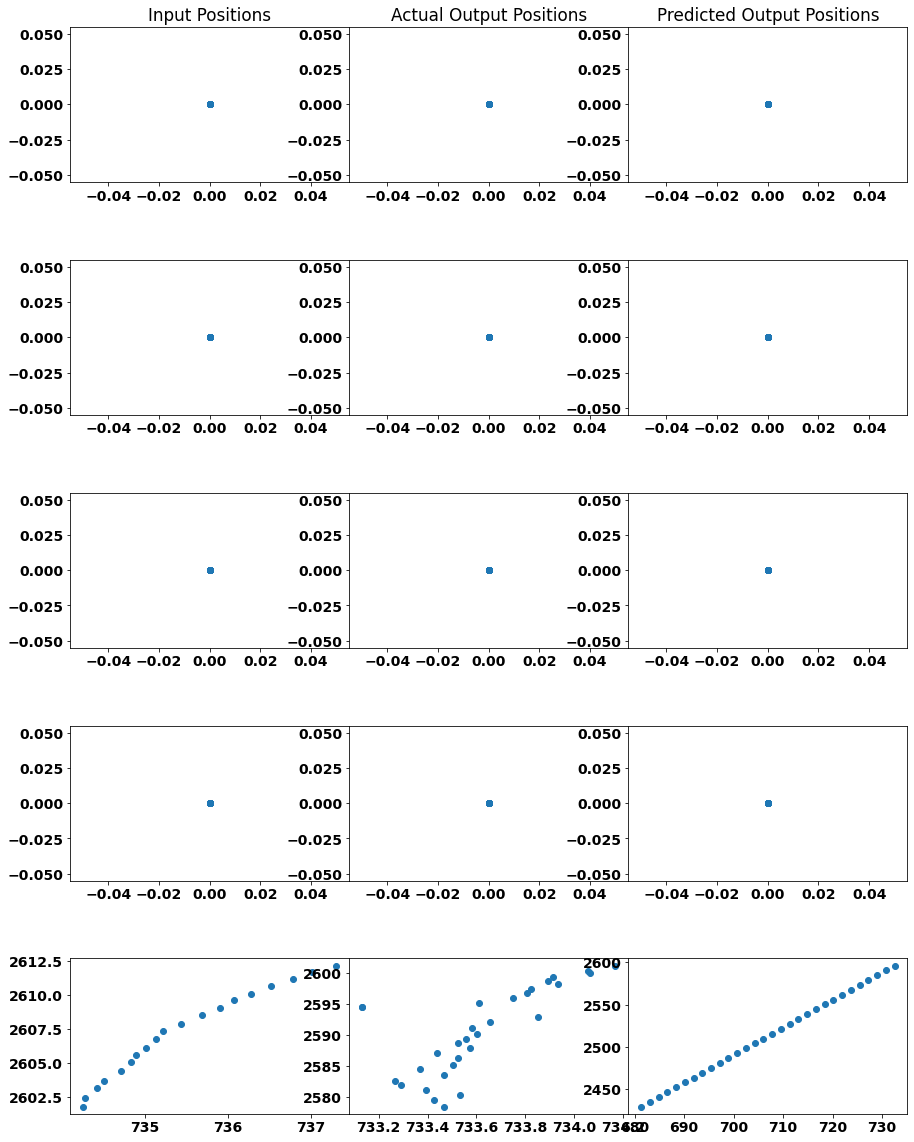

In [23]:
test_inp, test_out=load_data.get_test_data(test_path, 64)
test_inp, test_out=test_inp.to(device), test_out.to(device)
test_pred=physics.avg_velocity_model(test_inp)

pos_idx=torch.tensor([0,1]).to(device)
test_out_pos=torch.index_select(test_out, 3, pos_idx)
print('RMSE: %f'%utility.rmse(test_pred, test_out_pos).detach().cpu().numpy())

utility.visualize_trajectory(test_inp, test_out_pos, test_pred)